In [1]:
// Empty comment just to initialize
// Javalin rendering plugin from SOS Notebook.

2023-09-05 14:55:35:263 +0100 [Thread-0] INFO  log - Logging initialized @907ms to org.eclipse.jetty.util.log.Slf4jLog
2023-09-05 14:55:35:286 +0100 [Thread-0] INFO  Javalin - Starting Javalin ...
2023-09-05 14:55:35:336 +0100 [Thread-0] INFO  Server - jetty-9.4.9.v20180320; built: 2018-03-20T12:21:10Z; git: 1f8159b1e4a42d3f79997021ea1609f2fbac6de5; jvm 1.8.0_121-b15
2023-09-05 14:55:35:357 +0100 [Thread-0] INFO  session - DefaultSessionIdManager workerName=node0
2023-09-05 14:55:35:357 +0100 [Thread-0] INFO  session - No SessionScavenger set, using defaults
2023-09-05 14:55:35:359 +0100 [Thread-0] INFO  session - Scavenging every 660000ms
2023-09-05 14:55:35:363 +0100 [Thread-0] INFO  ContextHandler - Started i.j.e.j.start$httpHandler$1@881a223{/,null,AVAILABLE}
2023-09-05 14:55:35:388 +0100 [Thread-0] INFO  ContextHandler - Started o.e.j.s.ServletContextHandler@4a944036{/,null,AVAILABLE}
2023-09-05 14:55:35:393 +0100 [Thread-0] INFO  AbstractConnector - Started ServerConnector@28fc37

null

In [2]:
// Import of the JAR file for the basic resources of
// the Bouncy Castle Crypto library (version 1.73) for Java.
%classpath add jar ../../../etc/resources/jar/bcprov-jdk18on-173.jar

In [3]:
// Import of the JAR file for the extension resources of
// the Bouncy Castle Crypto library (version 1.73) for Java.
%classpath add jar ../../../etc/resources/jar/bcprov-ext-jdk18on-173.jar

In [4]:
// Import of all the required modules and sub-libraries.

// Import of all the required modules and sub-libraries of
// the Bouncy Castle library, for use of basic cryptography.
import org.bouncycastle.crypto.AsymmetricCipherKeyPair;
import org.bouncycastle.crypto.SecretWithEncapsulation;
import org.bouncycastle.crypto.params.AsymmetricKeyParameter;

// Import of all the required modules and sub-libraries of
// the Bouncy Castle library, regarding the use of
// Key Encapsulation Methods/Mechanisms (KEMs).
import org.bouncycastle.jcajce.SecretKeyWithEncapsulation;
import org.bouncycastle.jcajce.spec.KEMExtractSpec;
import org.bouncycastle.jcajce.spec.KEMGenerateSpec;

// Import of all the required modules and sub-libraries of
// the Bouncy Castle library, regarding the provider of
// (Classical) Post-Quantum Cryptography.
import org.bouncycastle.pqc.jcajce.provider.BouncyCastlePQCProvider;

// Import of all the required modules and sub-libraries of
// the Bouncy Castle library, regarding the CRYSTALS-Dilithium
// Public-Key Digital Signature Scheme's Parameter Specifications.
import org.bouncycastle.pqc.jcajce.spec.DilithiumParameterSpec;

// Import of all the required modules and sub-libraries required of
// the Bouncy Castle library, regarding the CRYSTALS-Dilithium Digital Signature Scheme.
import org.bouncycastle.pqc.crypto.crystals.dilithium.DilithiumParameters;
import org.bouncycastle.pqc.crypto.crystals.dilithium.DilithiumKeyGenerationParameters;
import org.bouncycastle.pqc.crypto.crystals.dilithium.DilithiumKeyPairGenerator;
import org.bouncycastle.pqc.crypto.crystals.dilithium.DilithiumPrivateKeyParameters;
import org.bouncycastle.pqc.crypto.crystals.dilithium.DilithiumPublicKeyParameters;

// Import of all the required modules and sub-libraries
// required of the built-in security module of Java.
import java.security.PrivateKey;
import java.security.PublicKey;
import java.security.SecureRandom;
import java.security.Security;

// Import of all the required modules and sub-libraries
// required of the built-in Non-blocking Input/Output module of Java.
import java.nio.ByteBuffer;
import java.nio.ByteOrder;


// Definition of all the required constant values.

// Definition of the size of a byte
// with the respective number of bits.
final short BYTE_SIZE_IN_BITS = 8;

// Definition of the number of possible
// binary digits (bits) for a hexadecimal character.
final short NUM_POSSIBLE_BITS_IN_HEXADECIMAL_CHAR = 16;



// Definition of all the required classes.

// Definition of the class of the cryptographic engine's parameters for
// the Public-Key (Asymmetric) Digital Signature Scheme CRYSTALS-Dilithium
// (CRYptographic SuiTe for Algebraic LatticeS - Dilithium),
// which is a (Classical) Post-Quantum Digital Signature Scheme
// (supposed to be secure against classical and quantum attacks),
// and based on computational hardness of mathematical problems
// derived from the well-known lattices algebraic structures,
// most specifically, in the LWE (Learning With Errors) Problem.
class DilithiumEngineParams {
    
    // Definition of all the required constant values,
    // regarding the class of the cryptographic engine's
    // parameters for the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    
    // Definition of the maximum degree n of
    // the polynomials used in the matrix A
    // representing the lattice algebraic structure
    // to be adopted for the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public final static int param_n = 256;
    
    // Definition of the numeric modulus q for
    // the polynomials used in the matrix A
    // representing the lattice algebraic structure
    // to be adopted for the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public final static int param_q = 8380417;
    
    // Definition of the numeric inverse of modulus q
    // for the polynomials used in the matrix A
    // representing the lattice algebraic structure
    // to be adopted for the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public final static int param_q_inv = 58728449;
    
    // Definition of the compression factor d to
    // reduce/compress the size (dropped bits) of
    // the asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme.
    public final static int compression_asymmetric_keys_factor_d = 13;
    
    // Definition of the number of bytes
    // to be used as (pseudo) random seed
    // ρ (rho) of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public final static int num_pseudo_random_seed_rho_bytes = 32;
    
    // Definition of the number of
    // bytes to be used for the purpose of
    // the CRH (Colision-Resistant Hashing) of
    // the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme.
    public final static int num_collision_resistant_hashing_bytes = 64;
    
    // Definition of the number of
    // bytes to be used for the purpose of 
    // the (pseudo) random cryptographic key K of
    // the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme.
    public final static int num_pseudo_random_key_k_bytes = 32;
    
    // Definition of the number of bytes
    // to be used for the computation of
    // the final polynomial target result solution tr
    // vector/array of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public final static int num_target_result_solution_tr_bytes = 64;
    
    // Definition of the number of bytes
    // to be used for the computation of
    // the packed polynomial target solution t₀
    // vector/array of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public final static int num_target_solution_t_0_bytes = 416;
    
    // Definition of the number of bytes
    // to be used for the computation of
    // the packed polynomial target solution t₁
    // vector/array of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public final static int num_target_solution_t_1_bytes = 320;


    
    // Definition of all the required variable values,
    // regarding the class of the cryptographic engine's
    // parameters for the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    
    
    // Definition of the security parameters
    // mode used for the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    private final int security_parameters_mode;
    
    
    // Definition of the number of bytes
    // to be used for the computation of
    // the packed hint for a polynomial
    // vector/array of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    private final int num_packed_hint_h_polynomial_vector_bytes;
    
    // Definition of the number of bytes to be used for
    // the computation of the packed polynomial potential
    // signature z vector/array of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    private final int num_packed_polynomial_potential_signature_z_bytes;
    
    // Definition of the number of bytes to be used for
    // the computation of the high-order packed polynomial
    // coefficients w₁ vector/array of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    private final int num_packed_polynomial_w_1_bytes;
    
    // Definition of the number of bytes to be used for
    // the computation of the packed polynomial vector/array
    // considering the secret key range η of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    private final int num_packed_polynomial_secret_key_range_eta_bytes;
    
    
    // Definition of the 1st coordinate k of
    // the number of polynomials (k,l) per vector
    // used in the matrix A representing the lattice
    // algebraic structure, representing as well,
    // the size factor for that same lattice algebraic structure,
    // and thus, being the main security parameter in terms of
    // scaling the security strength of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    private final int param_k;
    
    // Definition of the 2nd coordinate l of
    // the number of polynomials (k,l) per vector
    // used in the matrix A representing the lattice
    // algebraic structure, representing as well,
    // the size factor for that same lattice algebraic structure,
    // and thus, being the main security parameter in terms of
    // scaling the security strength of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    private final int param_l;
    
    // Definition of the secret key range η of
    // the pseudo-random samples to be used as
    // the secret vectors/arrays s₁ and s₂ to
    // compute the initial polynomial target
    // vector/array t for the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    private final int param_eta;
    
    // Definition of the number τ of ± 1's
    // (bits set as 1) in the presented
    // sampled and transmitted challenge c
    // vector/array of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    private final int param_tau;
    
    // Definition of the maximum possible
    // polynomial coefficient β of the mathematical
    // product c⋅sᵢ vector/array, denoted as well
    // by the mathematical product denoted as τ⋅η from
    // the parameters used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    private final int param_beta;

    // Definition of the coefficient range γ₁ of
    // the expanded masking vector/array y computed
    // from the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme.
    private final int param_gamma_1;

    // Definition of the low-order rounding
    // range γ₂ of the high-order packed polynomial
    // coefficients w₁ vector/array computed
    // from the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme.
    private final int param_gamma_2;

    // Definition of the maximum number ω of 1's in the hint h
    // given for the resolution of the challenge c vector/array of
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    private final int param_omega;
    

    // Definition of the size, in terms of bytes, of the asymmetric
    // public key Kₚ to be used by the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme with the strong security for EUF-CMA
    // (Existential UnForgery under Chosen Message Attack) property.
    private final int num_euf_cma_public_key_bytes;

    // Definition of the size, in terms of bytes, of the asymmetric private
    // (secret) key Kₛ to be used by the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme with the strong security for EUF-CMA
    // (Existential UnForgery under Chosen Message Attack) property.
    private final int num_euf_cma_secret_key_bytes;
    
    // Definition of the size, in terms of bytes,
    // of the cryptographic digital signature
    // package vector/array σ (sigma), comprising
    // the (pseudo) random seed ρ (rho),
    // the polynomial potential signature z,
    // and the respective presented sampled
    // and transmitted challenge c vector/arrays,
    // used by the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme with the strong security for
    // EUF-CMA (Existential UnForgery under Chosen Message Attack) property.
    private final int num_euf_cma_cryptographic_signature_package_sigma_bytes;
    
    
    // Constructors of the class of the cryptographic engine's
    // parameters for the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme.
    
    // Constructor of the class of the cryptographic engine's
    // parameters for the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme, and the initialization of
    // the initial required parameters.
    //    Parameters:
    //    @param security_parameters_mode: The security parameters mode
    //                                     used for the CRYSTALS-Dilithium
    //                                     Public-Key Digital Signature Scheme.
    public DilithiumEngineParams( int security_parameters_mode ) {
    
        // Setting of the security parameters mode
        // used for the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme.
        this.security_parameters_mode = security_parameters_mode;
        
        // Setting a switch-case code block for all the possible values
        // for the security parameters mode used for the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme.
        switch( this.security_parameters_mode ) {
            
            // If the security parameters mode used for the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme, is set as 2.
            case 2:
            
                // Setting of the 1st coordinate k of
                // the number of polynomials (k,l) per vector
                // used in the matrix A representing the lattice
                // algebraic structure, representing as well,
                // the size factor for that same lattice algebraic structure,
                // and thus, being the main security parameter in terms of
                // scaling the security strength of the CRYSTALS-Dilithium
                // Public-Key Digital Signature Scheme.
                this.param_k = 4;
                
                // Setting of the 2nd coordinate l of
                // the number of polynomials (k,l) per vector
                // used in the matrix A representing the lattice
                // algebraic structure, representing as well,
                // the size factor for that same lattice algebraic structure,
                // and thus, being the main security parameter in terms of
                // scaling the security strength of the CRYSTALS-Dilithium
                // Public-Key Digital Signature Scheme.
                this.param_l = 4;
                
                // Setting of the secret key range η of
                // the pseudo-random samples to be used as
                // the secret vectors/arrays s₁ and s₂ to
                // compute the initial polynomial target
                // vector/array t for the CRYSTALS-Dilithium
                // Public-Key Digital Signature Scheme.
                this.param_eta = 2;
                
                // Setting of the number τ of ± 1's
                // (bits set as 1) in the presented
                // sampled and transmitted challenge c
                // vector/array of the CRYSTALS-Dilithium
                // Public-Key Digital Signature Scheme.
                this.param_tau = 39;
                
                // Setting of the maximum possible
                // polynomial coefficient β of the mathematical
                // product c⋅sᵢ vector/array, denoted as well
                // by the mathematical product denoted as τ⋅η from
                // the parameters used by the CRYSTALS-Dilithium
                // Public-Key Digital Signature Scheme.
                this.param_beta = ( this.param_eta * this.param_tau );
                
                // Setting of the coefficient range γ₁ of
                // the expanded masking vector/array y computed
                // from the CRYSTALS-Dilithium Public-Key
                // Digital Signature Scheme (as 2¹⁷ or 1 << 17).
                this.param_gamma_1 = ( 1 << 17 );

                // Setting of the low-order rounding
                // range γ₂ of the high-order packed polynomial
                // coefficients w₁ vector/array computed
                // from the CRYSTALS-Dilithium Public-Key
                // Digital Signature Scheme (as [ (q - 1) / 88 ]).
                this.param_gamma_2 = ( ( this.param_q - 1 ) / 88 );
                
                // Setting of the maximum number ω of 1's in the hint h
                // given for the resolution of the challenge c vector/array of
                // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
                this.param_omega = 80;
                
                // Setting of the number of bytes to be used for
                // the computation of the packed polynomial potential
                // signature z vector/array of the CRYSTALS-Dilithium
                // Public-Key Digital Signature Scheme.
                this.num_packed_polynomial_potential_signature_z_bytes = 576;
                
                // Setting of the number of bytes to be used for
                // the computation of the high-order packed polynomial
                // coefficients w₁ vector/array of the CRYSTALS-Dilithium
                // Public-Key Digital Signature Scheme.
                this.num_packed_polynomial_w_1_bytes = 192;
            
                // Setting of the number of bytes to be used for
                // the computation of the packed polynomial vector/array
                // considering the secret key range η of the CRYSTALS-Dilithium
                // Public-Key Digital Signature Scheme.
                this.num_packed_polynomial_secret_key_range_eta_bytes = 96;
                
                // Breaking of the case code block.
                break;

            // If the security parameters mode used for the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme, is set as 3.
            case 3:
            
                // Setting of the 1st coordinate k of
                // the number of polynomials (k,l) per vector
                // used in the matrix A representing the lattice
                // algebraic structure, representing as well,
                // the size factor for that same lattice algebraic structure,
                // and thus, being the main security parameter in terms of
                // scaling the security strength of the CRYSTALS-Dilithium
                // Public-Key Digital Signature Scheme.
                this.param_k = 6;
                
                // Setting of the 2nd coordinate l of
                // the number of polynomials (k,l) per vector
                // used in the matrix A representing the lattice
                // algebraic structure, representing as well,
                // the size factor for that same lattice algebraic structure,
                // and thus, being the main security parameter in terms of
                // scaling the security strength of the CRYSTALS-Dilithium
                // Public-Key Digital Signature Scheme.
                this.param_l = 5;
                
                // Setting of the secret key range η of
                // the pseudo-random samples to be used as
                // the secret vectors/arrays s₁ and s₂ to
                // compute the initial polynomial target
                // vector/array t for the CRYSTALS-Dilithium
                // Public-Key Digital Signature Scheme.
                this.param_eta = 4;
                
                // Setting of the number τ of ± 1's
                // (bits set as 1) in the presented
                // sampled and transmitted challenge c
                // vector/array of the CRYSTALS-Dilithium
                // Public-Key Digital Signature Scheme.
                this.param_tau = 49;
                
                // Setting of the maximum possible
                // polynomial coefficient β of the mathematical
                // product c⋅sᵢ vector/array, denoted as well
                // by the mathematical product denoted as τ⋅η from
                // the parameters used by the CRYSTALS-Dilithium
                // Public-Key Digital Signature Scheme.
                this.param_beta = ( this.param_eta * this.param_tau );
                
                // Setting of the coefficient range γ₁ of
                // the expanded masking vector/array y computed
                // from the CRYSTALS-Dilithium Public-Key
                // Digital Signature Scheme (as 2¹⁹ or 1 << 19).
                this.param_gamma_1 = ( 1 << 19 );

                // Setting of the low-order rounding
                // range γ₂ of the high-order packed polynomial
                // coefficients w₁ vector/array computed
                // from the CRYSTALS-Dilithium Public-Key
                // Digital Signature Scheme (as [ (q - 1) / 32 ]).
                this.param_gamma_2 = ( ( this.param_q - 1 ) / 32 );
                
                // Setting of the maximum number ω of 1's in the hint h
                // given for the resolution of the challenge c vector/array of
                // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
                this.param_omega = 55;
                
                // Setting of the number of bytes to be used for
                // the computation of the packed polynomial potential
                // signature z vector/array of the CRYSTALS-Dilithium
                // Public-Key Digital Signature Scheme.
                this.num_packed_polynomial_potential_signature_z_bytes = 640;
                
                // Setting of the number of bytes to be used for
                // the computation of the high-order packed polynomial
                // coefficients w₁ vector/array of the CRYSTALS-Dilithium
                // Public-Key Digital Signature Scheme.
                this.num_packed_polynomial_w_1_bytes = 128;
            
                // Setting of the number of bytes to be used for
                // the computation of the packed polynomial vector/array
                // considering the secret key range η of the CRYSTALS-Dilithium
                // Public-Key Digital Signature Scheme.
                this.num_packed_polynomial_secret_key_range_eta_bytes = 128;
                
                // Breaking of the case code block.
                break;

            // If the security parameters mode used for the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme, is set as 5.
            case 5:
            
                // Setting of the 1st coordinate k of
                // the number of polynomials (k,l) per vector
                // used in the matrix A representing the lattice
                // algebraic structure, representing as well,
                // the size factor for that same lattice algebraic structure,
                // and thus, being the main security parameter in terms of
                // scaling the security strength of the CRYSTALS-Dilithium
                // Public-Key Digital Signature Scheme.
                this.param_k = 8;
                
                // Setting of the 2nd coordinate l of
                // the number of polynomials (k,l) per vector
                // used in the matrix A representing the lattice
                // algebraic structure, representing as well,
                // the size factor for that same lattice algebraic structure,
                // and thus, being the main security parameter in terms of
                // scaling the security strength of the CRYSTALS-Dilithium
                // Public-Key Digital Signature Scheme.
                this.param_l = 7;
                
                // Setting of the secret key range η of
                // the pseudo-random samples to be used as
                // the secret vectors/arrays s₁ and s₂ to
                // compute the initial polynomial target
                // vector/array t for the CRYSTALS-Dilithium
                // Public-Key Digital Signature Scheme.
                this.param_eta = 2;
                
                // Setting of the number τ of ± 1's
                // (bits set as 1) in the presented
                // sampled and transmitted challenge c
                // vector/array of the CRYSTALS-Dilithium
                // Public-Key Digital Signature Scheme.
                this.param_tau = 60;
                
                // Setting of the maximum possible
                // polynomial coefficient β of the mathematical
                // product c⋅sᵢ vector/array, denoted as well
                // by the mathematical product denoted as τ⋅η from
                // the parameters used by the CRYSTALS-Dilithium
                // Public-Key Digital Signature Scheme.
                this.param_beta = ( this.param_eta * this.param_tau );
                
                // Setting of the coefficient range γ₁ of
                // the expanded masking vector/array y computed
                // from the CRYSTALS-Dilithium Public-Key
                // Digital Signature Scheme (as 2¹⁹ or 1 << 19).
                this.param_gamma_1 = ( 1 << 19 );

                // Setting of the low-order rounding
                // range γ₂ of the high-order packed polynomial
                // coefficients w₁ vector/array computed
                // from the CRYSTALS-Dilithium Public-Key
                // Digital Signature Scheme (as [ (q - 1) / 32 ]).
                this.param_gamma_2 = ( ( this.param_q - 1 ) / 32 );
                
                // Setting of the maximum number ω of 1's in the hint h
                // given for the resolution of the challenge c vector/array of
                // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
                this.param_omega = 75;
                
                // Setting of the number of bytes to be used for
                // the computation of the packed polynomial potential
                // signature z vector/array of the CRYSTALS-Dilithium
                // Public-Key Digital Signature Scheme.
                this.num_packed_polynomial_potential_signature_z_bytes = 640;
                
                // Setting of the number of bytes to be used for
                // the computation of the high-order packed polynomial
                // coefficients w₁ vector/array of the CRYSTALS-Dilithium
                // Public-Key Digital Signature Scheme.
                this.num_packed_polynomial_w_1_bytes = 128;
            
                // Setting of the number of bytes to be used for
                // the computation of the packed polynomial vector/array
                // considering the secret key range η of the CRYSTALS-Dilithium
                // Public-Key Digital Signature Scheme.
                this.num_packed_polynomial_secret_key_range_eta_bytes = 96;
                
                // Breaking of the case code block.
                break;
                        
            // If the security parameters mode used for the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme, has an invalid value.
            default:
                
                // Throwing of an IllegalArgumentException, regarding
                // an invalid value for the security parameters mode used
                // for the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
                throw new IllegalArgumentException("Error: Mode #" + this.security_parameters_mode + " " +
                                                   "is not supported for CRYSTALS-Dilithium (Asymmetric) " +
                                                   "Public-Key Digital Signature Scheme!");
        
        }
            
        // Setting of the number of bytes
        // to be used for the computation of
        // the packed hint for a polynomial
        // vector/array of the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme.
        this.num_packed_hint_h_polynomial_vector_bytes = 
                ( this.param_omega + this.param_k );

        // Setting of the size, in terms of bytes, of the asymmetric
        // public key Kₚ to be used by the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme with the strong security for EUF-CMA
        // (Existential UnForgery under Chosen Message Attack) property.
        this.num_euf_cma_public_key_bytes = 
                (   this.num_pseudo_random_seed_rho_bytes +
                  ( this.param_k * this.num_target_solution_t_1_bytes ) );

        // Setting of the size, in terms of bytes, of the asymmetric private
        // (secret) key Kₛ to be used by the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme with the strong security for EUF-CMA
        // (Existential UnForgery under Chosen Message Attack) property.
        this.num_euf_cma_secret_key_bytes =
                ( ( 3 * this.num_pseudo_random_seed_rho_bytes ) +
                  ( this.param_l * this.num_packed_polynomial_secret_key_range_eta_bytes ) +
                  ( this.param_k * this.num_packed_polynomial_secret_key_range_eta_bytes ) +
                  ( this.param_k * this.num_target_solution_t_0_bytes ) );

        // Setting of the size, in terms of bytes,
        // of the cryptographic digital signature
        // package vector/array σ (sigma), comprising
        // the (pseudo) random seed ρ (rho),
        // the polynomial potential signature z,
        // and the respective presented sampled
        // and transmitted challenge c vector/arrays,
        // used by the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme with the strong security for
        // EUF-CMA (Existential UnForgery under Chosen Message Attack) property.
        this.num_euf_cma_cryptographic_signature_package_sigma_bytes =
                (   this.num_pseudo_random_seed_rho_bytes +
                  ( this.param_l * this.num_packed_polynomial_potential_signature_z_bytes ) +
                    this.num_packed_hint_h_polynomial_vector_bytes );
        
    }
    
    
    // Methods of the class of the cryptographic engine's
    // parameters for the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme.

    // Method to obtain the maximum degree n of
    // the polynomials used in the matrix A
    // representing the lattice algebraic structure
    // to be adopted for the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public int get_param_n() {
    
        // Return of the maximum degree n of
        // the polynomials used in the matrix A
        // representing the lattice algebraic structure
        // to be adopted for the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme.
        return this.param_n;
        
    }

    // Method to obtain the numeric modulus q for
    // the polynomials used in the matrix A
    // representing the lattice algebraic structure
    // to be adopted for the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public int get_param_q() {
    
        // Return of the numeric modulus q for
        // the polynomials used in the matrix A
        // representing the lattice algebraic structure
        // to be adopted for the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme.
        return this.param_q;
    
    }

    // Method to obtain the numeric inverse of modulus q
    // for the polynomials used in the matrix A
    // representing the lattice algebraic structure
    // to be adopted for the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public int get_param_q_inv() {
    
        // Return of the numeric inverse of modulus q
        // for the polynomials used in the matrix A
        // representing the lattice algebraic structure
        // to be adopted for the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme.
        return this.param_q_inv;
    
    }

    // Method to obtain the compression factor d to
    // reduce/compress the size (dropped bits) of
    // the asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme.
    public int get_compression_asymmetric_keys_factor_d() {
    
        // Return of the compression factor d to
        // reduce/compress the size (dropped bits) of
        // the asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme.
        return this.compression_asymmetric_keys_factor_d;
    
    }

    // Method to obtain the number of bytes
    // to be used as (pseudo) random seed
    // ρ (rho) of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public int get_num_pseudo_random_seed_rho_bytes() {
    
        // Return of the number of bytes
        // to be used as (pseudo) random seed
        // ρ (rho) of the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme.
        return this.num_pseudo_random_seed_rho_bytes;
    
    }

    // Method to obtain the number of bits
    // to be used as (pseudo) random seed
    // ρ (rho) of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public int get_num_pseudo_random_seed_rho_bits() {
    
        // Return of the number of bits
        // to be used as (pseudo) random seed
        // ρ (rho) of the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme.
        return ( this.get_num_pseudo_random_seed_rho_bytes() *
                 BYTE_SIZE_IN_BITS );
    
    }

    // Method to obtain the number of
    // bytes to be used for the purpose of
    // the CRH (Colision-Resistant Hashing) of
    // the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme.
    public int get_num_collision_resistant_hashing_bytes() {
    
        // Return of the number of
        // bytes to be used for the purpose of
        // the CRH (Colision-Resistant Hashing) of
        // the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme.
        return this.num_collision_resistant_hashing_bytes;
    
    }

    // Method to obtain the number of
    // bits to be used for the purpose of
    // the CRH (Colision-Resistant Hashing) of
    // the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme.
    public int get_num_collision_resistant_hashing_bits() {
    
        // Return of the number of
        // bits to be used for the purpose of
        // the CRH (Colision-Resistant Hashing) of
        // the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme.
        return ( this.get_num_collision_resistant_hashing_bytes() *
                 BYTE_SIZE_IN_BITS );
    
    }
    
    // Method to obtain the number of
    // bytes to be used for the purpose of 
    // the (pseudo) random cryptographic key K of
    // the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme.
    public int get_num_pseudo_random_key_k_bytes() {
    
        // Return of the number of
        // bytes to be used for the purpose of 
        // the (pseudo) random cryptographic key K of
        // the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme.
        return this.num_pseudo_random_key_k_bytes;
    
    }
    
    // Method to obtain the number of
    // bytes to be used for the purpose of 
    // the (pseudo) random cryptographic key K of
    // the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme.
    public int get_num_pseudo_random_key_k_bits() {
    
        // Return of the number of
        // bytes to be used for the purpose of 
        // the (pseudo) random cryptographic key K of
        // the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme.
        return ( this.get_num_pseudo_random_key_k_bytes() *
                 BYTE_SIZE_IN_BITS );
    
    }
    
    // Method to obtain the number of bytes
    // to be used for the computation of the final
    // polynomial target result solution tr
    // vector/array of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public int get_num_target_result_solution_tr_bytes() {
    
        // Return of the number of bytes
        // to be used for the computation of
        // the final polynomial target result tr
        // vector/array of the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme.
        return this.num_target_result_solution_tr_bytes;
    
    }
    
    // Method to obtain the number of bits
    // to be used for the computation of the final
    // polynomial target result solution tr
    // vector/array of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public int get_num_target_result_solution_tr_bits() {
    
        // Return of the number of bits
        // to be used for the computation of the final
        // polynomial target result solution tr
        // vector/array of the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme.
        return ( this.get_num_target_result_solution_tr_bytes() *
                 BYTE_SIZE_IN_BITS );
    
    }
    
    // Method to obtain the number of bytes
    // to be used for the computation of
    // the packed polynomial target solution t₀
    // vector/array of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public int get_num_target_solution_t_0_bytes() {
    
        // Return of the number of bytes
        // to be used for the computation of
        // the packed polynomial target solution t₀
        // vector/array of the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme.
        return this.num_target_solution_t_0_bytes;
    
    }
    
    // Method to obtain the number of bits
    // to be used for the computation of
    // the packed polynomial target solution t₀
    // vector/array of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public int get_num_target_solution_t_0_bits() {
    
        // Return of the number of bits
        // to be used for the computation of
        // the packed polynomial target solution t₀
        // vector/array of the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme.
        return ( this.get_num_target_solution_t_0_bytes() *
                 BYTE_SIZE_IN_BITS );
    
    }
    
    // Method to obtain the number of bytes
    // to be used for the computation of
    // the packed polynomial target solution t₁
    // vector/array of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public int get_num_target_solution_t_1_bytes() {
    
        // Return of the number of bytes
        // to be used for the computation of
        // the packed polynomial target solution t₁
        // vector/array of the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme.
        return this.num_target_solution_t_1_bytes;
    
    }
    
    // Method to obtain the number of bits
    // to be used for the computation of
    // the packed polynomial target solution t₁
    // vector/array of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public int get_num_target_solution_t_1_bits() {
    
        // Return of the number of bits
        // to be used for the computation of
        // the packed polynomial target solution t₁
        // vector/array of the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme.
        return ( this.get_num_target_solution_t_1_bytes() *
                 BYTE_SIZE_IN_BITS );
    
    }
    
    // Method to obtain the security parameters
    // mode used for the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public int get_security_parameters_mode() {
    
        // Return of the security parameters
        // mode used for the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme.
        return this.security_parameters_mode;
        
    }

    // Method to obtain the number of bytes
    // to be used for the computation of
    // the packed hint h for a polynomial
    // vector/array of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public int get_num_packed_hint_h_polynomial_vector_bytes() {
        
        // Return of the number of bytes
        // to be used for the computation of
        // the packed hint h for a polynomial
        // vector/array of the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme.
        return this.num_packed_hint_h_polynomial_vector_bytes;

    }

    // Method to obtain the number of bits
    // to be used for the computation of
    // the packed hint h for a polynomial
    // vector/array of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public int get_num_packed_hint_h_polynomial_vector_bits() {
        
        // Return of the number of bits
        // to be used for the computation of
        // the packed hint h for a polynomial
        // vector/array of the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme.
        return ( this.get_num_packed_hint_h_polynomial_vector_bytes() *
                 BYTE_SIZE_IN_BITS );
        
    }

    // Method to obtain the number of bytes to be used for
    // the computation of the packed polynomial potential
    // signature z vector/array of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public int get_num_packed_polynomial_potential_signature_z_bytes() {
        
        // Return of the number of bytes to be used for
        // the computation of the packed polynomial potential
        // signature z vector/array of the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme.
        return this.num_packed_polynomial_potential_signature_z_bytes;
    
    }

    // Method to obtain the number of bits to be used for
    // the computation of the packed polynomial potential
    // signature z vector/array of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public int get_num_packed_polynomial_potential_signature_z_bits() {
        
        // Return of the number of bits to be used for
        // the computation of the packed polynomial potential
        // signature z vector/array of the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme.
        return ( this.get_num_packed_polynomial_potential_signature_z_bytes() *
                 BYTE_SIZE_IN_BITS );
        
    }

    // Method to obtain the number of bytes to be used for
    // the computation of the high-order packed polynomial
    // coefficients w₁ vector/array of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public int get_num_packed_polynomial_w_1_bytes() {
        
        // Return of the number of bytes to be used for
        // the computation of the high-order packed polynomial
        // coefficients w₁ vector/array of the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme.
        return this.num_packed_polynomial_w_1_bytes;
    
    }

    // Method to obtain the number of bits to be used for
    // the computation of the high-order packed polynomial
    // coefficients w₁ vector/array of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public int get_num_packed_polynomial_w_1_bits() {
        
        // Return of the number of bits to be used for
        // the computation of the high-order packed polynomial
        // coefficients w₁ vector/array of the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme.
        return ( this.get_num_packed_polynomial_w_1_bytes() *
                 BYTE_SIZE_IN_BITS );
        
    }

    // Method to obtain the number of bytes to be used
    // for the computation of the packed polynomial
    // vector/array considering the secret key range η of
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    public int get_num_packed_polynomial_secret_key_range_eta_bytes() {
        
        // Return of the number of bytes to be used
        // for the computation of the packed polynomial
        // vector/array considering the secret key range η of
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        return this.num_packed_polynomial_secret_key_range_eta_bytes;
    
    }

    // Method to obtain the number of bits to be used
    // for the computation of the packed polynomial
    // vector/array considering the secret key range η of
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    public int get_num_packed_polynomial_secret_key_range_eta_bits() {
        
        // Return of the number of bits to be used
        // for the computation of the packed polynomial
        // vector/array considering the secret key range η of
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        return ( this.get_num_packed_polynomial_secret_key_range_eta_bytes() *
                 BYTE_SIZE_IN_BITS );
        
    }
    
    // Method to obtain the 1st coordinate k
    // for the input number k of polynomials (k,l)
    // per vector used in the matrix A representing
    // the lattice algebraic structure, representing as well,
    // the size factor for that same lattice algebraic structure,
    // and thus, being the main security parameter in terms of
    // scaling the security strength of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public int get_param_k() {
    
        // Return of the 1st coordinate k for
        // the input number k of polynomials (k,l)
        // per vector used in the matrix A representing
        // the lattice algebraic structure, representing as well,
        // the size factor for that same lattice algebraic structure,
        // and thus, being the main security parameter in terms of
        // scaling the security strength of the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme.
        return this.param_k;
    
    }
    
    // Method to obtain the 2nd coordinate l
    // for the output number l of polynomials (k,l)
    // per vector used in the matrix A representing
    // the lattice algebraic structure, representing as well,
    // the size factor for that same lattice algebraic structure,
    // and thus, being the main security parameter in terms of
    // scaling the security strength of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public int get_param_l() {
    
        // Return of the 2nd coordinate l for
        // the output number l of polynomials (k,l)
        // per vector used in the matrix A representing
        // the lattice algebraic structure, representing as well,
        // the size factor for that same lattice algebraic structure,
        // and thus, being the main security parameter in terms of
        // scaling the security strength of the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme.
        return this.param_l;
    
    }
    
    // Method to obtain the secret key range η of
    // the pseudo-random samples to be used as
    // the secret vectors/arrays s₁ and s₂ to
    // compute the initial polynomial target
    // vector/array t for the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public int get_param_eta() {
    
        // Return of the secret key range η of
        // the pseudo-random samples to be used as
        // the secret vectors/arrays s₁ and s₂ to
        // compute the initial polynomial target
        // vector/array t for the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme.
        return this.param_eta;
        
    }

    // Method to obtain the number τ of ± 1's
    // (bits set as 1) in the presented
    // sampled and transmitted challenge c
    // vector/array of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public int get_param_tau() {
    
        // Return of the number τ of ± 1's
        // (bits set as 1) in the presented
        // sampled and transmitted challenge c
        // vector/array of the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme.
        return this.param_tau;
        
    }
    
    // Method to obtain the maximum possible
    // polynomial coefficient β of the mathematical
    // product c⋅sᵢ vector/array, denoted as well
    // by the mathematical product denoted as τ⋅η from
    // the parameters used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public int get_param_beta() {
    
        // Return of the maximum possible
        // polynomial coefficient β of the mathematical
        // product c⋅sᵢ vector/array, denoted as well
        // by the mathematical product denoted as τ⋅η from
        // the parameters used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme.
        return this.param_beta;
        
    }
    
    // Method to obtain the coefficient range γ₁ of
    // the expanded masking vector/array y computed
    // from the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme.
    public int get_param_gamma_1() {
    
        // Return of the coefficient range γ₁ of
        // the expanded masking vector/array y computed
        // from the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme.
        return this.param_gamma_1;
        
    }
    
    // Method to obtain the low-order rounding
    // range γ₂ of the high-order packed polynomial
    // coefficients w₁ vector/array computed
    // from the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme.
    public int get_param_gamma_2() {
    
        // Return of the low-order rounding
        // range γ₂ of the high-order packed polynomial
        // coefficients w₁ vector/array computed
        // from the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme.
        return this.param_gamma_2;
        
    }
    
    // Method to obtain the maximum number ω of 1's in the hint h
    // given for the resolution of the challenge c vector/array of
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    public int get_param_omega() {
    
        // Return of the maximum number ω of 1's in the hint h
        // given for the resolution of the challenge c vector/array of
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        return this.param_omega;
    
    }
    
    // Method to obtain the size, in terms of bytes, of the asymmetric
    // public key Kₚ to be used by the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme with the strong security for EUF-CMA
    // (Existential UnForgery under Chosen Message Attack) property.
    public int get_num_euf_cma_public_key_bytes() {
    
        // Return of the size, in terms of bytes, of the asymmetric
        // public key Kₚ to be used by the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme with the strong security for EUF-CMA
        // (Existential UnForgery under Chosen Message Attack) property.
        return this.num_euf_cma_public_key_bytes;
    
    }
    
    // Method to obtain the size, in terms of bits, of the asymmetric
    // public key Kₚ to be used by the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme with the strong security for EUF-CMA
    // (Existential UnForgery under Chosen Message Attack) property.
    public int get_num_euf_cma_public_key_bits() {
    
        // Return of the size, in terms of bytes, of the asymmetric
        // public key Kₚ to be used by the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme with the strong security for EUF-CMA
        // (Existential UnForgery under Chosen Message Attack) property.
        return ( this.get_num_euf_cma_public_key_bytes() *
                 BYTE_SIZE_IN_BITS );
    
    }
    
    // Method to obtain the size, in terms of bytes, of the asymmetric private
    // (secret) key Kₛ to be used by the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme with the strong security for EUF-CMA
    // (Existential UnForgery under Chosen Message Attack) property.
    public int get_num_euf_cma_secret_key_bytes() {
    
        // Return of the size, in terms of bytes, of the asymmetric private
        // (secret) key Kₛ to be used by the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme with the strong security for EUF-CMA
        // (Existential UnForgery under Chosen Message Attack) property.
        return this.num_euf_cma_secret_key_bytes;
    
    }
    
    // Method to obtain the size, in terms of bytes, of the asymmetric private
    // (secret) key Kₛ to be used by the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme with the strong security for EUF-CMA
    // (Existential UnForgery under Chosen Message Attack) property.
    public int get_num_euf_cma_secret_key_bits() {
    
        // Return of the size, in terms of bits,
        // of the asymmetric private key Kₛ to be
        // used by the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme with the strong security
        // under CMA (Chosen Message Attack) property.
        return ( this.get_num_euf_cma_secret_key_bytes() *
                 BYTE_SIZE_IN_BITS );
    
    }
    
    // Method to obtain the size, in terms of bytes,
    // of the cryptographic digital signature
    // package vector/array σ (sigma), comprising
    // the (pseudo) random seed ρ (rho),
    // the polynomial potential signature z,
    // and the respective presented sampled
    // and transmitted challenge c vector/arrays,
    // used by the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme with the strong security for
    // EUF-CMA (Existential UnForgery under Chosen Message Attack) property.
    public int get_num_euf_cma_cryptographic_signature_package_sigma_bytes() {
    
        // Return of the size, in terms of bytes,
        // of the cryptographic digital signature
        // package vector/array σ (sigma), comprising
        // the (pseudo) random seed ρ (rho),
        // the polynomial potential signature z,
        // and the respective presented sampled
        // and transmitted challenge c vector/arrays,
        // used by the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme with the strong security for
        // EUF-CMA (Existential UnForgery under Chosen Message Attack) property.
        return this.num_euf_cma_cryptographic_signature_package_sigma_bytes;
    
    }
    
    // Method to obtain the size, in terms of bits,
    // of the cryptographic digital signature
    // package vector/array σ (sigma), comprising
    // the (pseudo) random seed ρ (rho),
    // the polynomial potential signature z,
    // and the respective presented sampled
    // and transmitted challenge c vector/arrays,
    // used by the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme with the strong security for
    // EUF-CMA (Existential UnForgery under Chosen Message Attack) property.
    public int get_num_euf_cma_cryptographic_signature_package_sigma_bits() {
    
        // Return of the size, in terms of bits,
        // of the cryptographic digital signature
        // package vector/array σ (sigma), comprising
        // the (pseudo) random seed ρ (rho),
        // the polynomial potential signature z,
        // and the respective presented sampled
        // and transmitted challenge c vector/arrays,
        // used by the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme with the strong security for
        // EUF-CMA (Existential UnForgery under Chosen Message Attack) property.
        return ( this.get_num_euf_cma_cryptographic_signature_package_sigma_bytes() *
                 BYTE_SIZE_IN_BITS );
    
    }

}


// Definition of class of Public-Key Digital Signature Scheme
// CRYSTALS-Dilithium (CRYptographic SuiTe for Algebraic LatticeS - Dilithium),
// which is a (Classical) Post-Quantum Digital Signature Scheme
// (supposed to be secure against classical and quantum attacks),
// and based on computational hardness of mathematical problems
// derived from the well-known lattices algebraic structures,
// most specifically, in the LWE (Learning With Errors) Problem.
class CrystalsDilithiumDigitalSignatureScheme {

    // Definition of all the required constant values,
    // regarding the class of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    
    // Setting of the string array with the names of
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme's
    // Security Parameters Modes for the key pair generation
    // (consisting on private and public keys), as well as
    // the respective Signing and Verifying Mechanisms.
    public final String[]
        security_parameters_modes_names = {
    
        // 1) Security Parameters Mode 2 Set with a factor of (k,l) = (4,4)
        //    the size of the lattice algebraic structure, which provides
        //    a (post-quantum) security strength of 85 bits.
        "Dilithium2",
        
        // 2) Security Parameters Mode Set 3 with a factor of (k,l) = (6,5)
        //    for the size of the lattice algebraic structure, which provides
        //    a (post-quantum) security strength of 96 bits.
        "Dilithium3",
        
        // 3) Security Parameters Mode Set 5 with a factor of (k,l) = (8,7)
        //    for the size of the lattice algebraic structure, which provides
        //    a (post-quantum) security strength of 128 bits.
        "Dilithium5"
    
    };
    
    // Setting of the string array with the names and
    // definitions of the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme's Security Parameters Modes for
    // the key pair generation (consisting on private and public keys),
    // as well as the respective Signing and Verifying Mechanisms.
    public final String[] 
        security_parameters_modes_names_and_descriptions = {
    
        // 1) Security Parameters Set Mode 2 with a factor of (k,l) = (4,4)
        //    for the size of the lattice algebraic structure, which provides
        //    a (post-quantum) security strength of 85 bits.
        //    NOTE: The Dilithium2 has a NIST (Classical) Post-Quantum
        //          Security Level of 2 (≈ collision search on SHA-256).
        "=> Dilithium2: Security Parameters Set with a factor of (k,l) = (4,4)\n   " +
        "               for the size of the lattice algebraic structure, which provides\n   " +
        "               a (post-quantum) security strength of 85 bits.\n\n   " +
        "               NOTE: The Dilithium2 Digital Signature Scheme has a NIST (Classical)\n   " +
        "                     Post-Quantum Security Level of 2 (≈ collision search on SHA-256).",
        
        // 2) Security Parameters Set Mode 3 with a factor of (k,l) = (6,5)
        //    for the size of the lattice algebraic structure, which provides
        //    a (post-quantum) security strength of 96 bits.
        //    NOTE: The Dilithium3 has a NIST (Classical) Post-Quantum
        //          Security Level of 3 (≈ exhaustive search on AES-192).
        "=> Dilithium3: Security Parameters Set with a factor of (k,l) = (6,5)\n   " +
        "               for the size of the lattice algebraic structure, which provides\n   " +
        "               a (post-quantum) security strength of 96 bits.\n\n   " +
        "               NOTE: The Dilithium3 Digital Signature Scheme has a NIST (Classical)\n   " +
        "                     Post-Quantum Security Level of 3 (≈ exhaustive search on AES-192).",
        
        // 3) Security Parameters Set Mode 5 with a factor of (k,l) = (8,7)
        //    for the size of the lattice algebraic structure, which provides
        //    a (post-quantum) security strength of 128 bits.
        //    NOTE: The Dilithium5 has a NIST (Classical) Post-Quantum
        //          Security Level of 5 (≈ exhaustive search on AES-256).
        "=> Dilithium5: Security Parameters Set Mode 5 with a factor of (k,l) = (8,7)\n   " +
        "               for the size of the lattice algebraic structure, which provides\n   " +
        "               a (post-quantum) security strength of 128 bits.\n\n   " +
        "               NOTE: The Dilithium5 Digital Signature Scheme has a NIST (Classical)\n   " +
        "                     Post-Quantum Security Level of 5 (≈ exhaustive search on AES-256)."
        
    };
    
    
    // Setting of the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme's Security Parameters Modes for
    // the key pair generation (consisting on private and public keys),
    // as well as the respective Signing and Verifying Mechanisms.
    public final DilithiumParameterSpec[] 
        security_parameters_modes_specifications = {
        
        // 1) Security Parameters Set Mode 2 with a factor of (k,l) = (4,4)
        //    the size of the lattice algebraic structure, which provides
        //    a (post-quantum) security strength of 85 bits.
        DilithiumParameterSpec.dilithium2,
        
        // 2) Security Parameters Set Mode 3 with a factor of (k,l) = (6,5)
        //    the size of the lattice algebraic structure, which provides
        //    a (post-quantum) security strength of 96 bits.
        DilithiumParameterSpec.dilithium3,
        
        // 3) Security Parameters Set Mode 5 with a factor of (k,l) = (8,7)
        //    the size of the lattice algebraic structure, which provides
        //    a (post-quantum) security strength of 128 bits.
        DilithiumParameterSpec.dilithium5
        
    };
    
    // Setting of the array of the parameters modes
    // regarding the input number k of polynomials and
    // the output number l of polynomials per vector used in
    // the matrix A representing the lattice algebraic structure,
    // representing as well, the size factor (k,l) for that
    // same lattice algebraic structure, and thus, being the main
    // security parameter in terms of scaling the security strength of
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    public final int[] engine_mode_parameters = {
        
        // 1) Parameter Mode 2 to build the 'Dilithium2' Security Parameter Set
        //    as the parameter choice for the general parameters to be used by
        //    the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        2,
        
        // 2) Parameters Mode 3 to build the 'Dilithium3' Security Parameter Set
        //    as the parameter choice for the general parameters to be used by
        //    used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        3,
        
        // 3) Parameters Mode 5 to build the 'Dilithium5' Security Parameter Set
        //    as the parameter choice for the general parameters to be used by
        //    the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        5
        
    };
    
    
    // Definition of all the required variable values,
    // regarding the class of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    
    // Definition of the parameter mode choice index
    // for the generation of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    private short parameter_mode_choice_index;
    
    // Definition of the general parameters
    // to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    private DilithiumParameters parameters;
    
    // Definition of the cryptographic engine's
    // parameters to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    private DilithiumEngineParams engine_parameters;
    
    // Definition of the Java's Secure Random to
    // act as Pseudo-Random Generator (PRG) for
    // the generation of the instance of the Key Pair to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    private SecureRandom secure_pseudo_random_generator_key_pair_generation;
    
    // Definition of the key generation parameters
    // to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    private DilithiumKeyGenerationParameters key_generation_parameters;

    // Definition of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    private AsymmetricCipherKeyPair asymmetric_key_pair;
    
    
    // Constructor of the class of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme, and the initialization of
    // the initial required parameters.
    //    Parameters:
    //    @param parameter_mode_choice_index: The parameter choice index for
    //                                        the generation of the pair of
    //                                        asymmetric keys to be used.
    public CrystalsDilithiumDigitalSignatureScheme( short parameter_mode_choice_index ) {
        
        // Addition of the (Classical) Post-Quantum Cryptography
        // provider of the Bouncy Castle library for Java.
        this.add_classical_post_quantum_cryptography_bouncy_castle_provider();
        
        // Initialization of the parameter choice index for
        // the generation of the pair of asymmetric keys to be used.
        this.parameter_mode_choice_index = parameter_mode_choice_index;
        
        // Initialization of the general parameters to be
        // used by the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme, as a null object.
        this.parameters = null;
        
        // Initialization of the cryptographic engine's
        // parameters to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme, as a null object.
        this.engine_parameters = null;
        
        // Initialization of the Java's Secure Random
        // to act as Pseudo-Random Generator (PRG) for
        // the generation of the instance of the Key Pair
        // to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme.
        this.secure_pseudo_random_generator_key_pair_generation = 
            new SecureRandom();
        
        // Initialization of the key generation parameters to be
        // used by the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme, as a null object.
        this.key_generation_parameters = null;
        
        // Initialization of the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium Public-Key
        // Digital Signature, as a null object.
        this.asymmetric_key_pair = null;
        
    }
    
    
    // Methods of the class of the Public-Key
    // (Asymmetric) Digital Signature Scheme CRYSTALS-Dilithium
    // (CRYptographic SuiTe for Algebraic LatticeS - Dilithium).
    
    // Method to add the (Classical) Post-Quantum Cryptography
    // provider of the Bouncy Castle library for Java,
    // to the built-in security module of Java.
    public void add_classical_post_quantum_cryptography_bouncy_castle_provider() {
        
        // If the built-in security module of Java does not find or
        // not have the (Classical) Post-Quantum Cryptography
        // provider of the Bouncy Castle library for Java,
        // denoted as BCPQC (Bouncy Castle - Post-Quantum Cryptography).
        if( Security.getProvider( "BCPQC" ) == null ) {
         
            // Addition of the (Classical) Post-Quantum Cryptography
            // provider of the Bouncy Castle library for Java,
            // to the built-in security module of Java.
            Security.addProvider( new BouncyCastlePQCProvider() );
        
        }
        
    }
    
    
    // Method to obtain the parameter mode choice index defined for
    // the generation of the pair of asymmetric keys to be used.
    public short get_parameter_mode_choice_index() {
        
        // Return of the parameter mode choice index defined for
        // the generation of the pair of asymmetric keys to be used.
        return this.parameter_mode_choice_index;
        
    }
    
    
    // Method to obtain the string with the name of
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme's
    // Security Parameters Modes defined for the key pair generation
    // (consisting on private and public keys), as well as
    // the respective Signing and Verifying Mechanisms.
    public String get_security_parameters_name() {
        
        // Return of the string with the name of
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme's
        // Security Parameters Modes defined for the key pair generation
        // (consisting on private and public keys), as well as
        // the respective Signing and Verifying Mechanisms.
        return security_parameters_modes_names[ this.parameter_mode_choice_index ];
        
    }
    
    
    // Method to obtain the string with the name and
    // description of the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme's Security Parameters Modes defined for
    // the key pair generation (consisting on private and public keys),
    // as well as the respective Signing and Verifying Mechanisms.
    public String get_security_parameters_mode_name_and_description() {
        
        // Return of the string with the name and
        // description of the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme's Security Parameters Modes defined for
        // the key pair generation (consisting on private and public keys),
        // as well as the respective Signing and Verifying Mechanisms.
        return security_parameters_modes_names_and_descriptions[ this.parameter_mode_choice_index ];
        
    }
       
        
    // Method to obtain the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme's Security Parameters Modes Specifications.
    public DilithiumParameterSpec get_security_parameters_specifications() {
        
        // Return of the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme's Security Parameters Specifications.
        return security_parameters_modes_specifications[ this.parameter_mode_choice_index ];
        
    }
    
    
    // Method to obtain the parameter value regarding
    // the number of polynomials k per vector used in
    // the matrix A representing the lattice algebraic
    // structure, representing as well, the size factor
    // for that same lattice algebraic structure, and thus,
    // being the main security parameter in terms of scaling
    // the security strength of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public int get_engine_mode_parameter() {
        
        // Return of the parameter value regarding
        // the number of polynomials k per vector used in
        // the matrix A representing the lattice algebraic
        // structure, representing as well, the size factor
        // for that same lattice algebraic structure, and thus,
        // being the main security parameter in terms of scaling
        // the security strength of the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme.
        return engine_mode_parameters[ this.parameter_mode_choice_index ];
        
    }
    
    
    // Method to initialize the general parameters
    // to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public void initialize_parameters() {
        
        // If the parameter choice index for
        // the general parameters to be used by
        // the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme, corresponds to
        // the 'Dilithium2' Security Parameter Mode Set.
        if( this.parameter_mode_choice_index == 0 ) {
            
            // Setting the 'Dilithium2' Security Parameter Set as
            // the parameter choice for the general parameters
            // to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            this.parameters = DilithiumParameters.dilithium2;
            
        }
        // If the parameter choice index for
        // the general parameters to be used by
        // the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme, corresponds to
        // the 'Dilithium3' Security Parameter Mode Set.
        else if( this.parameter_mode_choice_index == 1 ) {
            
            // Setting the 'Dilithium3' Security Parameter Set as
            // the parameter choice for the general parameters
            // to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            this.parameters = DilithiumParameters.dilithium3;
            
        }
        // If the parameter choice index for
        // the general parameters to be used by
        // the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme, corresponds to
        // the 'Dilithium5' Security Parameter Mode Set.
        else if( this.parameter_mode_choice_index == 2 ) {
            
            // Setting the 'Dilithium5' Security Parameter Set as
            // the parameter choice for the general parameters
            // to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            this.parameters = DilithiumParameters.dilithium5;
            
        }
        
    }
    
    
    // Method to obtain the general parameters to be
    // used by the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme.
    public DilithiumParameters get_parameters() {
        
        // Return of the general parameters to be
        // used by the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme.
        return this.parameters;
        
    }
    
    
    // Method to initialize the cryptographic engine's
    // parameters to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public void initialize_engine_parameters() {
        
        // Retrieval of the parameters required
        // to build the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme's cryptographic engine.
        int dilithium_engine_mode_parameter = this.get_engine_mode_parameter();

        // Initialization of the cryptographic engine's
        // parameters to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme.
        this.engine_parameters = 
            new DilithiumEngineParams( dilithium_engine_mode_parameter );
        
    }
        
    
    // Method to obtain the cryptographic engine's
    // parameters to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public DilithiumEngineParams get_engine_parameters() {
        
        // Return of the cryptographic engine's
        // parameters to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme.
        return this.engine_parameters;
        
    }
    
    // Method to obtain the Java's Secure Random to act as
    // Pseudo-Random Generator (PRG) for the key pair generation to
    // be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    public SecureRandom get_secure_pseudo_random_generator_key_pair_generation() {
            
        // Return of the Java's Secure Random to act as
        // Pseudo-Random Generator (PRG) for the key pair generation to
        // be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        return this.secure_pseudo_random_generator_key_pair_generation;
    
    }
    
    
    // Method to initialize the key generation parameters to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    public void initialize_key_generation_parameters() {
        
        // If the the general parameters to be
        // used by the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme, are not null.
        if( this.get_parameters() != null ) {
        
            // Initialization of the key generation parameters
            // to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            this.key_generation_parameters = 
                new DilithiumKeyGenerationParameters
                    ( this.secure_pseudo_random_generator_key_pair_generation,
                      this.parameters );
        
        }
        
    }
    
    
    // Method to obtain the key generation parameters to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    public DilithiumKeyGenerationParameters get_key_generation_parameters() {
        
        // Return of the key generation parameters
        // to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme.
        return this.key_generation_parameters;
        
    }
    
    
    // Method to initialize the generation of
    // the pair of asymmetric keys to be used
    // by the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme. 
    public void initialize_asymmetric_key_pair_generation() {
       
        // Creation of the generator of the pair of
        // asymmetric keys to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme. 
        DilithiumKeyPairGenerator crystals_dilithium_key_pair_generator = 
            new DilithiumKeyPairGenerator();

        // Initialization of the generator of the pair of
        // asymmetric keys to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme, using
        // the Security Parameters set defined before.
        crystals_dilithium_key_pair_generator
            .init( this.key_generation_parameters );

        // Generation of the pair of asymmetric keys
        // to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme. 
        this.asymmetric_key_pair = 
            crystals_dilithium_key_pair_generator.generateKeyPair();
            
    }
    
    
    // Method to obtain the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme.
    public AsymmetricCipherKeyPair get_asymmetric_key_pair() {
        
        // Return of the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme.
        return this.asymmetric_key_pair;
        
    }
    
    
    // Method to obtain the public key from
    // the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme.
    public AsymmetricKeyParameter get_public_key() {
        
        // If the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is not defined by a null object.
        if( this.get_asymmetric_key_pair() != null ) {
            
            // Return of the public key from
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key
            // Digital Signature Scheme.
            return this.get_asymmetric_key_pair().getPublic();
            
        }
        // If the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is defined by a null object.
        else {
           
            // Return of an invalid public key from
            // the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme,
            // as a null object.
            return null;
            
        }
        
    }
    
    
    // Method to obtain the public key
    // parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public DilithiumPublicKeyParameters get_public_key_parameters() {
        
        // If the public key from the pair of
        // asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme,
        // is not defined by a null object.
        if( this.get_public_key() != null ) {
            
            // Return of the public key parameters of
            // the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            return ( ( DilithiumPublicKeyParameters ) this.get_public_key() );
            
        }
        // If the public key from the pair of
        // asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme,
        // is defined by a null object.
        else {
           
            // Return of invalid public key parameters of
            // the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium Public-Key
            // Digital Signature Scheme, as a null object.
            return null;
            
        }
        
    }
    
    
    // Method to obtain the (pseudo) random seed ρ (rho)
    // in bytes, from which will be expanded the matrix A,
    // encoding the lattice algebraic structure, as well
    // as other cryptographic parameters, representing
    // a lattice-based problem in the form of a LWE
    // (Learning With Errors), retrieved from the public key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    public byte[] get_pseudo_random_seed_rho_from_public_key_parameters() {
    
        // If the public key parameters of
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is not defined by a null object.
        if( this.get_public_key_parameters() != null ) {
            
            // Return of the (pseudo) random seed ρ (rho) in bytes,
            // from which will be expanded the matrix A,
            // encoding the lattice algebraic structure,
            // as well as other cryptographic parameters,
            // representing a lattice-based problem in
            // the form of a LWE (Learning With Errors),
            // retrieved from the public key parameters of
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key
            // Digital Signature Scheme.
            return this.get_public_key_parameters().getRho();
        
        }
        // If the public key parameters of
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is defined by a null object.
        else {
           
            // Return of an invalid (pseudo) random
            // seed ρ (rho) in bytes, from which will
            // be expanded the matrix A, encoding
            // the lattice algebraic structure,
            // as well as other cryptographic parameters,
            // representing a lattice-based problem in
            // the form of a LWE (Learning With Errors),
            // retrieved from the public key parameters of
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key
            // Digital Signature Scheme,
            // as a null object.
            return null;
            
        }
    
    }
    
    
    // Method to obtain the size,
    // in terms of bytes, of the (pseudo) random
    // seed ρ (rho), from which will be expanded the matrix A,
    // encoding the lattice algebraic structure, as well
    // as other cryptographic parameters, representing
    // a lattice-based problem in the form of a LWE
    // (Learning With Errors), retrieved from the public key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    public int get_pseudo_random_seed_rho_size_bytes_from_public_key_parameters() {
    
        // If the (pseudo) random seed ρ (rho) in bytes,
        // from which will be expanded the matrix A,
        // encoding the lattice algebraic structure,
        // as well as other cryptographic parameters,
        // representing a lattice-based problem in the form of
        // a LWE (Learning With Errors), retrieved from the public key
        // parameters of the pair of asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
        // is not defined by a null object.
        if( this.get_pseudo_random_seed_rho_from_public_key_parameters() != null ) {
            
            // Return of the size, in terms of bytes,
            // of the (pseudo) random seed ρ (rho), from which will be expanded
            // the matrix A, encoding the lattice algebraic structure, as well
            // as other cryptographic parameters, representing a lattice-based problem
            // in the form of a LWE (Learning With Errors), retrieved from
            // the public key parameters of the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            return this.get_pseudo_random_seed_rho_from_public_key_parameters().length;
        
        }
        // If the (pseudo) random seed ρ (rho) in bytes,
        // from which will be expanded the matrix A,
        // encoding the lattice algebraic structure,
        // as well as other cryptographic parameters,
        // representing a lattice-based problem in the form of
        // a LWE (Learning With Errors), retrieved from the public key
        // parameters of the pair of asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
        // is defined by a null object.
        else {
           
            // Return of an invalid size, in terms of bytes,
            // of the (pseudo) random seed ρ (rho), from which will be expanded
            // the matrix A, encoding the lattice algebraic structure, as well
            // as other cryptographic parameters, representing a lattice-based problem
            // in the form of a LWE (Learning With Errors), retrieved from
            // the public key parameters of the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            return 0;
            
        }
    
    }
    
    
    // Method to obtain the size,
    // in terms of bits, of the (pseudo) random seed
    // ρ (rho), from which will be expanded the matrix A,
    // encoding the lattice algebraic structure, as well
    // as other cryptographic parameters, representing
    // a lattice-based problem in the form of a LWE
    // (Learning With Errors), retrieved from the public key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    public int get_pseudo_random_seed_rho_size_bits_from_public_key_parameters() {
    
        // If the (pseudo) random seed ρ (rho) in bytes,
        // from which will be expanded the matrix A,
        // encoding the lattice algebraic structure,
        // as well as other cryptographic parameters,
        // representing a lattice-based problem in the form of
        // a LWE (Learning With Errors), retrieved from the public key
        // parameters of the pair of asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
        // is not defined by a null object.
        if( this.get_pseudo_random_seed_rho_from_public_key_parameters() != null ) {
            
            // Return of the size, in terms of bits,
            // of the (pseudo) random seed ρ (rho), from which will be expanded
            // the matrix A, encoding the lattice algebraic structure, as well
            // as other cryptographic parameters, representing a lattice-based problem
            // in the form of a LWE (Learning With Errors), retrieved from
            // the public key parameters of the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            return ( this.get_pseudo_random_seed_rho_from_public_key_parameters().length * 
                     BYTE_SIZE_IN_BITS );
        
        }
        // If the (pseudo) random seed ρ (rho) in bytes,
        // from which will be expanded the matrix A,
        // encoding the lattice algebraic structure,
        // as well as other cryptographic parameters,
        // representing a lattice-based problem in the form of
        // a LWE (Learning With Errors), retrieved from the public key
        // parameters of the pair of asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
        // is defined by a null object.
        else {
           
            // Return of an invalid size, in terms of bits,
            // of the (pseudo) random seed ρ (rho), from which will be expanded
            // the matrix A, encoding the lattice algebraic structure, as well
            // as other cryptographic parameters, representing a lattice-based problem
            // in the form of a LWE (Learning With Errors), retrieved from
            // the public key parameters of the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            return 0;
            
        }
    
    }
    
    
    // Method to obtain the packed polynomial
    // target solution t₁ vector/array encoded (and compressed)
    // in bytes (rounded from the initial target solution
    // vector/array for the mathematical equation A x s + e = t₁),
    // representing a lattice-based problem in the form of
    // a LWE (Learning With Errors), of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public byte[] get_target_solution_t_1_from_public_key_parameters() {
    
        // If the public key parameters of
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is not defined by a null object.
        if( this.get_public_key_parameters() != null ) {
        
            // Return of the packed polynomial
            // target solution t₁ vector/array encoded (and compressed)
            // in bytes (rounded from the initial target solution
            // vector/array for the mathematical equation A x s + e = t₁),
            // representing a lattice-based problem in the form of
            // a LWE (Learning With Errors), of the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            return this.get_public_key_parameters().getT1();
        
        }
        // If the public key parameters of
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is defined by a null object.
        else {
           
            // Return of the packed polynomial
            // target solution t₁ vector/array encoded (and compressed)
            // in bytes (rounded from the initial target solution
            // vector/array for the mathematical equation A x s + e = t₁),
            // representing a lattice-based problem in the form of
            // a LWE (Learning With Errors), of the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme,
            // as a null object.
            return null;
    
        }
    
    }
    
    
    // Method to obtain the size, in terms of bytes,
    // of the packed polynomial target solution t₁ vector/array encoded
    // (and compressed) in bytes (rounded from the initial target solution
    // vector/array t₁ for the mathematical equation A x s + e = t₁), representing
    // a lattice-based problem in the form of a LWE (Learning With Errors),
    // of the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    public int get_target_solution_t_1_size_bytes_from_public_key_parameters() {
    
        // If the packed polynomial target solution t₁ vector/array encoded
        // (and compressed) in bytes (rounded from the initial target solution
        // vector/array t₁ for the mathematical equation A x s + e = t₁), representing
        // a lattice-based problem in the form of a LWE (Learning With Errors),
        // of the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
        // is not defined by a null object.
        if( this.get_target_solution_t_1_from_public_key_parameters() != null ) {
            
            // Return of the size, in terms of bytes,
            // of the packed polynomial target solution t₁ vector/array encoded
            // (and compressed) in bytes (rounded from the initial target solution
            // vector/array t₁ for the mathematical equation A x s + e = t₁), representing
            // a lattice-based problem in the form of a LWE (Learning With Errors),
            // of the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            return this.get_target_solution_t_1_from_public_key_parameters().length;
        
        }
        // If the packed polynomial target solution t₁ vector/array encoded
        // (and compressed) in bytes (rounded from the initial target solution
        // vector/array t₁ for the mathematical equation A x s + e = t₁), representing
        // a lattice-based problem in the form of a LWE (Learning With Errors),
        // of the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
        // is defined by a null object.
        else {
           
            // Return of an invalid size, in terms of bytes,
            // of the packed polynomial target solution t₁ vector/array encoded
            // (and compressed) in bytes (rounded from the initial target solution
            // vector/array t₁ for the mathematical equation A x s + e = t₁), representing
            // a lattice-based problem in the form of a LWE (Learning With Errors),
            // of the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            return 0;
            
        }
    
    }
    
    
    // Method to obtain the size, in terms of bits,
    // of the packed polynomial target solution t₁ vector/array encoded
    // (and compressed) in bytes (rounded from the initial target solution
    // vector/array t₁ for the mathematical equation A x s + e = t₁, representing
    // a lattice-based problem in the form of a LWE (Learning With Errors),
    // of the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    public int get_target_solution_t_1_size_bits_from_public_key_parameters() {
    
        // If the packed polynomial target solution t₁ vector/array encoded
        // (and compressed) in bytes (rounded from the initial target solution
        // vector/array t₁ for the mathematical equation A x s + e = t₁), representing
        // a lattice-based problem in the form of a LWE (Learning With Errors),
        // of the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
        // is not defined by a null object.
        if( this.get_target_solution_t_1_from_public_key_parameters() != null ) {
            
            // Return of the size, in terms of bits,
            // of the packed polynomial target solution t₁ vector/array encoded
            // (and compressed) in bytes (rounded from the initial target solution
            // vector/array t₁ for the mathematical equation A x s + e = t₁), representing
            // a lattice-based problem in the form of a LWE (Learning With Errors),
            // of the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            return ( this.get_target_solution_t_1_from_public_key_parameters().length *
                     BYTE_SIZE_IN_BITS );
        
        }
        // If the packed polynomial target solution t₁ vector/array encoded
        // (and compressed) in bytes (rounded from the initial target solution
        // vector/array t₁ for the mathematical equation A x s + e = t₁, representing
        // a lattice-based problem in the form of a LWE (Learning With Errors),
        // of the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
        // is defined by a null object.
        else {
           
            // Return of an invalid size, in terms of bits,
            // of the packed polynomial target solution t₁ vector/array encoded
            // (and compressed) in bytes (rounded from the initial target solution
            // vector/array t₁ for the mathematical equation A x s + e = t₁), representing
            // a lattice-based problem in the form of a LWE (Learning With Errors),
            // of the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            return 0;
            
        }
    
    }
    
    
    // Method to obtain the public key from
    // the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme,
    // being encoded as an array of bytes.
    public byte[] get_public_key_encoded_bytes() {
        
        // If the public key from
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is not defined by a null object.
        if( this.get_public_key() != null ) {

            // Retrieval of the public key from
            // the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme,
            // being encoded as an array of bytes.
            byte[] public_key_encoded_bytes = 
                 ( ( DilithiumPublicKeyParameters ) this.get_public_key() ).getEncoded();

            // Return of the public key from
            // the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme,
            // being encoded as an array of bytes.
            return public_key_encoded_bytes;
        
        }
        // If the public key from
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is defined by a null object.
        else {
        
            // Return of an invalid public key from
            // the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme,
            // being encoded as an array of bytes.
            return null;
            
        }
        
    }
    
    
    // Method to obtain the size,
    // in terms of bytes, of the public key
    // from the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme,
    // as being encoded as an array of bytes.
    public int get_public_key_size_bytes() {
        
        // If the public key from
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // being encoded as an array of bytes,
        // is not defined by a null object.
        if( this.get_public_key_encoded_bytes() != null ) {

            // Return of the size,
            // in terms of bytes, of the public key
            // from the pair of asymmetric keys
            // to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme,
            // as being encoded as an array of bytes.
            return this.get_public_key_encoded_bytes().length;
        
        }
        // If the public key from
        // the pair of asymmetric keys
        // to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // being encoded as an array of bytes,
        // is defined by a null object.
        else {
    
            // Return of an invalid size,
            // in terms of bytes, of the public key
            // from the pair of asymmetric keys
            // to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme,
            // as being encoded as an array of bytes.
            return 0;
            
        }
 
    }
    
    
    // Method to obtain the size,
    // in terms of bits, of the public key
    // from the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme,
    // as being encoded as an array of bytes.
    public int get_public_key_size_bits() {
        
        // If the public key from
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // being encoded as an array of bytes,
        // is not defined by a null object.
        if( this.get_public_key_encoded_bytes() != null ) {

            // Return of the size,
            // in terms of bits, of the public key
            // from the pair of asymmetric keys
            // to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme,
            // as being encoded as an array of bytes.
            return ( this.get_public_key_size_bytes() *
                     BYTE_SIZE_IN_BITS );
        
        }
        // If the public key from
        // the pair of asymmetric keys
        // to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // being encoded as an array of bytes,
        // is defined by a null object.
        else {
    
            // Return of an invalid size,
            // in terms of bits, of the public key
            // from the pair of asymmetric keys
            // to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme,
            // as being encoded as an array of bytes.
            return 0;
            
        }
        
    }
    
    
    // Method to obtain the payload of
    // the public key from the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme, as a proper object of
    // public key of the digital signature scheme,
    // using the associated Security Parameters.
    public DilithiumPublicKeyParameters get_public_key_payload_from_parameters() {
        
        // If the key generation parameters
        // to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // are not defined by a null object.
        if( this.get_key_generation_parameters() != null ) {
        
            // Retrieval of the cipher parameters
            // from the key generation parameters
            // to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            DilithiumParameters crystals_dilithium_digital_signature_scheme_parameters = 
                this.get_key_generation_parameters().getParameters();


            // Call of the required methods to
            // obtain all the values, encoded in bytes,
            // retrieved from the public key parameters of
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key
            // Digital Signature Scheme, which will
            // be used to build public key payload.

            // Retrieval of the the (pseudo) random seed ρ (rho)
            // in bytes, from which will be expanded the matrix A,
            // encoding the lattice algebraic structure, as well
            // as other cryptographic parameters, representing
            // a lattice-based problem in the form of a LWE
            // (Learning With Errors), retrieved from the public key
            // parameters of the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            byte[] pseudo_random_seed_rho = 
                this.get_pseudo_random_seed_rho_from_public_key_parameters();
                
            // Retrieval of the packed polynomial
            // target solution t₁ vector/array encoded (and compressed)
            // in bytes (rounded from the initial target solution t₁
            // vector/array for the mathematical equation A x s + e = t₁),
            // representing a lattice-based problem in the form of
            // a LWE (Learning With Errors), of the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            byte[] target_solution_t_1 = 
                this.get_target_solution_t_1_from_public_key_parameters();
            

            // Return of the payload of the public key
            // from the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium Public-Key
            // Digital Signature Scheme, as a proper object of
            // public key of the digital signature scheme.
            return new DilithiumPublicKeyParameters( crystals_dilithium_digital_signature_scheme_parameters,
                                                     pseudo_random_seed_rho,
                                                     target_solution_t_1 );
        
        }
        // If the key generation parameters
        // to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // are defined by a null object.
        else {
            
            // Return of an invalid payload of the public key
            // from the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium Public-Key
            // Digital Signature Scheme, as a proper object of
            // public key of the digital signature scheme,
            // as a null object.
            return null;
            
        }
        
    }
    
    
    // Method to obtain the payload of the public key
    // from the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
    // as a proper object of public key of the digital signature scheme,
    // using the associated encoding in an array of bytes.
    public DilithiumPublicKeyParameters get_public_key_payload_from_encoding() {
        
        // If the key generation parameters
        // to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // are not defined by a null object.
        if( this.get_key_generation_parameters() != null ) {
            
            // Retrieval of the cipher parameters from
            // the key generation parameters to be used by
            // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            DilithiumParameters crystals_dilithium_digital_signature_scheme_parameters = 
                this.get_key_generation_parameters().getParameters();


            // Return of the payload of the public key
            // from the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
            // as a proper object of public key of the digital signature scheme.
            return new DilithiumPublicKeyParameters( crystals_dilithium_digital_signature_scheme_parameters,
                                                     this.get_public_key_encoded_bytes() );
            
        }
        // If the key generation parameters
        // to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // are defined by a null object.
        else {
            
            // Return of an invalid payload of the public key
            // from the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
            // as a proper object of public key of the digital signature scheme,
            // as a null object.
            return null;
            
        }
        
    }
    
    
    // Method to obtain the payload of the public key
    // from the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme, as a proper object of
    // public key of the digital signature scheme.
    public DilithiumPublicKeyParameters get_public_key_payload() {
    
        // Return of the payload of the public key
        // from the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme, as a proper object of
        // public key of the digital signature scheme.
        return this.get_public_key_payload_from_parameters();
        
    }
    
    
    // Method to obtain the private key from
    // the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme.
    public AsymmetricKeyParameter get_private_key() {
        
        // If the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is not defined by a null object.
        if( this.get_asymmetric_key_pair() != null ) {
            
            // Return of the private key from
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key
            // Digital Signature Scheme.
            return this.get_asymmetric_key_pair().getPrivate();
            
        }
        // If the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is defined by a null object.
        else {
           
            // Return of an invalid private key from
            // the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme,
            // as a null object.
            return null;
            
        }
        
    }
    
    
    // Method to obtain the private key
    // parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public DilithiumPrivateKeyParameters get_private_key_parameters() {
        
        // If the private key from the pair of
        // asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme,
        // is not defined by a null object.
        if( this.get_private_key() != null ) {
            
            // Return of the private key parameters of
            // the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            return ( ( DilithiumPrivateKeyParameters ) this.get_private_key() );
            
        }
        // If the private key from the pair of
        // asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme,
        // is defined by a null object.
        else {
           
            // Return of invalid private key parameters of
            // the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium Public-Key
            // Digital Signature Scheme, as a null object.
            return null;
            
        }
        
    }
    
    
    // Method to obtain the (pseudo) random seed ρ (rho)
    // in bytes, from which will be expanded the matrix A,
    // encoding the lattice algebraic structure, as well
    // as other cryptographic parameters, representing
    // a lattice-based problem in the form of a LWE
    // (Learning With Errors), retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    public byte[] get_pseudo_random_seed_rho_from_private_key_parameters() {
    
        // If the private key parameters of
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is not defined by a null object.
        if( this.get_private_key_parameters() != null ) {
            
            // Return of the (pseudo) random seed ρ (rho) in bytes,
            // from which will be expanded the matrix A,
            // encoding the lattice algebraic structure,
            // as well as other cryptographic parameters,
            // representing a lattice-based problem in
            // the form of a LWE (Learning With Errors),
            // retrieved from the private key parameters of
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key
            // Digital Signature Scheme.
            return this.get_private_key_parameters().getRho();
        
        }
        // If the private key parameters of
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is defined by a null object.
        else {
           
            // Return of an invalid (pseudo) random
            // seed ρ (rho) in bytes, from which will
            // be expanded the matrix A, encoding
            // the lattice algebraic structure,
            // as well as other cryptographic parameters,
            // representing a lattice-based problem in
            // the form of a LWE (Learning With Errors),
            // retrieved from the private key parameters of
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key
            // Digital Signature Scheme,
            // as a null object.
            return null;
            
        }
    
    }
    
    
    // Method to obtain the size,
    // in terms of bytes, of the (pseudo) random
    // seed ρ (rho), from which will be expanded the matrix A,
    // encoding the lattice algebraic structure, as well
    // as other cryptographic parameters, representing
    // a lattice-based problem in the form of a LWE
    // (Learning With Errors), retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    public int get_pseudo_random_seed_rho_size_bytes_from_private_key_parameters() {
    
        // If the (pseudo) random seed ρ (rho) in bytes,
        // from which will be expanded the matrix A,
        // encoding the lattice algebraic structure,
        // as well as other cryptographic parameters,
        // representing a lattice-based problem in the form of
        // a LWE (Learning With Errors), retrieved from the private key
        // parameters of the pair of asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
        // is not defined by a null object.
        if( this.get_pseudo_random_seed_rho_from_public_key_parameters() != null ) {
            
            // Return of the size, in terms of bytes,
            // of the (pseudo) random seed ρ (rho), from which will be expanded
            // the matrix A, encoding the lattice algebraic structure, as well
            // as other cryptographic parameters, representing a lattice-based problem
            // in the form of a LWE (Learning With Errors), retrieved from
            // the private key parameters of the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            return this.get_pseudo_random_seed_rho_from_public_key_parameters().length;
        
        }
        // If the (pseudo) random seed ρ (rho) in bytes,
        // from which will be expanded the matrix A,
        // encoding the lattice algebraic structure,
        // as well as other cryptographic parameters,
        // representing a lattice-based problem in the form of
        // a LWE (Learning With Errors), retrieved from the private key
        // parameters of the pair of asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
        // is defined by a null object.
        else {
           
            // Return of an invalid size, in terms of bytes,
            // of the (pseudo) random seed ρ (rho), from which will be expanded
            // the matrix A, encoding the lattice algebraic structure, as well
            // as other cryptographic parameters, representing a lattice-based problem
            // in the form of a LWE (Learning With Errors), retrieved from
            // the private key parameters of the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            return 0;
            
        }
    
    }
    
    
    // Method to obtain the size,
    // in terms of bits, of the (pseudo) random seed
    // ρ (rho), from which will be expanded the matrix A,
    // encoding the lattice algebraic structure, as well
    // as other cryptographic parameters, representing
    // a lattice-based problem in the form of a LWE
    // (Learning With Errors), retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    public int get_pseudo_random_seed_rho_size_bits_from_private_key_parameters() {
    
        // If the (pseudo) random seed ρ (rho) in bytes,
        // from which will be expanded the matrix A,
        // encoding the lattice algebraic structure,
        // as well as other cryptographic parameters,
        // representing a lattice-based problem in the form of
        // a LWE (Learning With Errors), retrieved from the private key
        // parameters of the pair of asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
        // is not defined by a null object.
        if( this.get_pseudo_random_seed_rho_from_private_key_parameters() != null ) {
            
            // Return of the size, in terms of bits,
            // of the (pseudo) random seed ρ (rho), from which will be expanded
            // the matrix A, encoding the lattice algebraic structure, as well
            // as other cryptographic parameters, representing a lattice-based problem
            // in the form of a LWE (Learning With Errors), retrieved from
            // the private key parameters of the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            return ( this.get_pseudo_random_seed_rho_from_private_key_parameters().length * 
                     BYTE_SIZE_IN_BITS );
        
        }
        // If the (pseudo) random seed ρ (rho) in bytes,
        // from which will be expanded the matrix A,
        // encoding the lattice algebraic structure,
        // as well as other cryptographic parameters,
        // representing a lattice-based problem in the form of
        // a LWE (Learning With Errors), retrieved from the private key
        // parameters of the pair of asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
        // is defined by a null object.
        else {
           
            // Return of an invalid size, in terms of bits,
            // of the (pseudo) random seed ρ (rho), from which will be expanded
            // the matrix A, encoding the lattice algebraic structure, as well
            // as other cryptographic parameters, representing a lattice-based problem
            // in the form of a LWE (Learning With Errors), retrieved from
            // the private key parameters of the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            return 0;
            
        }
    
    }
    
    
    // Method to obtain the (pseudo) random
    // cryptographic key K, retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    public byte[] get_pseudo_random_key_k_from_private_key_parameters() {
    
        // If the private key parameters of
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // are not defined by a null object.
        if( this.get_private_key_parameters() != null ) {
            
            // Return of the (pseudo) random
            // cryptographic key K, retrieved from the private key
            // parameters of the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium Public-Key
            // Digital Signature Scheme.
            return this.get_private_key_parameters().getK();
        
        }
        // If the private key parameters of
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // are defined by a null object.
        else {
           
            // Return of an invalid (pseudo) random
            // cryptographic key K, retrieved from the private key
            // parameters of the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium Public-Key
            // Digital Signature Scheme, as a null object.
            return null;
            
        }
    
    }
    
    
    // Method to obtain the size,
    // in terms of bytes, of the (pseudo) random
    // cryptographic key K, retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    public int get_pseudo_random_key_k_size_bytes_from_private_key_parameters() {
    
        // If the (pseudo) random cryptographic key K,
        // retrieved from the private key parameters of
        // the pair of asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme,
        // is not defined by a null object.
        if( this.get_pseudo_random_key_k_from_private_key_parameters() != null ) {
            
            // Return of the size, in terms of bytes,
            // of the (pseudo) random cryptographic key K,
            // retrieved from the private key parameters of
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key
            // Digital Signature Scheme.
            return this.get_pseudo_random_key_k_from_private_key_parameters().length;
        
        }
        // If the (pseudo) random cryptographic key K,
        // retrieved from the private key parameters of
        // the pair of asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme,
        // is defined by a null object.
        else {
           
            // Return of an invalid size, in terms of bytes,
            // of the (pseudo) random cryptographic key K,
            // retrieved from the private key parameters of
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key
            // Digital Signature Scheme.
            return 0;
            
        }
    
    }
    
    
    // Method to obtain the size,
    // in terms of bits, of the (pseudo) random
    // cryptographic key K, retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    public int get_pseudo_random_key_k_size_bits_from_private_key_parameters() {
    
        // If the (pseudo) random cryptographic key K,
        // retrieved from the private key parameters of
        // the pair of asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme,
        // is not defined by a null object.
        if( this.get_pseudo_random_key_k_from_private_key_parameters() != null ) {
            
            // Return of the size, in terms of bits,
            // of the (pseudo) random cryptographic key K,
            // retrieved from the private key parameters of
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key
            // Digital Signature Scheme.
            return ( this.get_pseudo_random_key_k_from_private_key_parameters().length * 
                     BYTE_SIZE_IN_BITS );
        
        }
        // If the (pseudo) random cryptographic key K,
        // retrieved from the private key parameters of
        // the pair of asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme,
        // is defined by a null object.
        else {
           
            // Return of an invalid size, in terms of bits,
            // of the (pseudo) random cryptographic key K,
            // retrieved from the private key parameters of
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key
            // Digital Signature Scheme.
            return 0;
            
        }
    
    }
    
    
    // Method to obtain the final polynomial target result
    // solution tr vector/array, retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    public byte[] get_target_result_solution_tr_from_private_key_parameters() {
    
        // If the private key parameters of
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // are not defined by a null object.
        if( this.get_private_key_parameters() != null ) {
            
            // Return of the final polynomial target result solution tr
            // vector/array, retrieved from the private key parameters of
            // the pair of asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            return this.get_private_key_parameters().getTr();
        
        }
        // If the private key parameters of
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // are defined by a null object.
        else {
           
            // Return of an invalid final polynomial target result solution tr
            // vector/array, retrieved from the private key parameters of
            // the pair of asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme, as a null object.
            return null;
            
        }
    
    }
    
    
    // Method to obtain the size,
    // in terms of bytes, of the final polynomial target
    // result tr vector/array, retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    public int get_target_result_solution_tr_size_bytes_from_private_key_parameters() {
    
        // If tthe final polynomial target result tr vector/array,
        // retrieved from the private key parameters of the pair of
        // asymmetric keys to be used by the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme, is not defined by a null object.
        if( this.get_target_result_solution_tr_from_private_key_parameters() != null ) {
            
            // Return of the size, in terms of bytes,
            // of the final polynomial target result tr vector/array,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            return this.get_target_result_solution_tr_from_private_key_parameters().length;
        
        }
        // If tthe final polynomial target result tr vector/array,
        // retrieved from the private key parameters of the pair of
        // asymmetric keys to be used by the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme, is defined by a null object.
        else {
           
            // Return of an invalid size, in terms of bytes,
            // of the final polynomial target result tr vector/array,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            return 0;
            
        }
    
    }
    
    
    // Method to obtain the size,
    // in terms of bits, of the final polynomial target
    // result tr vector/array, retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    public int get_target_result_solution_tr_size_bits_from_private_key_parameters() {
    
        // If tthe final polynomial target result tr vector/array,
        // retrieved from the private key parameters of the pair of
        // asymmetric keys to be used by the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme, is not defined by a null object.
        if( this.get_target_result_solution_tr_from_private_key_parameters() != null ) {
            
            // Return of the size, in terms of bits,
            // of the final polynomial target result tr vector/array,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            return ( this.get_target_result_solution_tr_from_private_key_parameters().length * 
                     BYTE_SIZE_IN_BITS );
        
        }
        // If tthe final polynomial target result tr vector/array,
        // retrieved from the private key parameters of the pair of
        // asymmetric keys to be used by the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme, is defined by a null object.
        else {
           
            // Return of an invalid size, in terms of bits,
            // of the final polynomial target result tr vector/array,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            return 0;
            
        }
    
    }
    
    
    // Method to obtain the random secret s₁
    // (i.e. the 1st secret vector in the lattice
    // algebraic structure), encoded in bytes, with the strong
    // security under CMA (Chosen Message Attack) property,
    // retrieved from the private key parameters of the pair of
    // asymmetric keys to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public byte[] get_random_secret_s_1_from_private_key_parameters() {
        
        // If the private key parameters of
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // are not defined by a null object.
        if( this.get_private_key_parameters() != null ) {
            
            // Return of the random secret s₁
            // (i.e. the 1st secret vector in the lattice
            // algebraic structure), encoded in bytes, with the strong
            // security under CMA (Chosen Message Attack) property,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            return this.get_private_key_parameters().getS1();
            
        }
        // If the private key parameters of
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // are defined by a null object.
        else {
           
            // Return of an invalid random secret s₁
            // (i.e. the 1st secret vector in the lattice
            // algebraic structure), encoded in bytes, with the strong
            // security under CMA (Chosen Message Attack) property,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme,
            // as a null object.
            return null;
            
        }
        
    }
    
    
    // Method to obtain the size,
    // in terms of bytes, of the random secret s₁
    // (i.e. the 1st secret vector in the lattice
    // algebraic structure), encoded in bytes, with the strong
    // security under CMA (Chosen Message Attack) property,
    // retrieved from the private key parameters of the pair of
    // asymmetric keys to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public int get_random_secret_s_1_size_bytes_from_private_key_parameters() {
        
        // If the random secret s₁
        // (i.e. the 1st secret vector in the lattice
        // algebraic structure), encoded in bytes, with the strong
        // security under CMA (Chosen Message Attack) property,
        // retrieved from the private key parameters of the pair of
        // asymmetric keys to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is not defined by a null object.
        if( this.get_random_secret_s_1_from_private_key_parameters() != null ) {
        
            // Return of the size,
            // in terms of bytes, of the random secret s₁
            // (i.e. the 1st secret vector in the lattice
            // algebraic structure), encoded in bytes, with the strong
            // security under CMA (Chosen Message Attack) property,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            return this.get_random_secret_s_1_from_private_key_parameters().length;

        }
        // If the random secret s₁
        // (i.e. the 1st secret vector in the lattice
        // algebraic structure), encoded in bytes, with the strong
        // security under CMA (Chosen Message Attack) property,
        // retrieved from the private key parameters of the pair of
        // asymmetric keys to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is defined by a null object.
        else {
            
            // Return of an invalid size,
            // in terms of bytes, of the random secret s₁
            // (i.e. the 1st secret vector in the lattice
            // algebraic structure), encoded in bytes, with the strong
            // security under CMA (Chosen Message Attack) property,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            return 0;
            
        }
        
    }
    
    
    // Method to obtain the size,
    // in terms of bits, of the random secret s₁
    // (i.e. the 1st secret vector in the lattice
    // algebraic structure), encoded in bytes, with the strong
    // security under CMA (Chosen Message Attack) property,
    // retrieved from the private key parameters of the pair of
    // asymmetric keys to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public int get_random_secret_s_1_size_bits_from_private_key_parameters() {
        
        // If the random secret s₁
        // (i.e. the 1st secret vector in the lattice
        // algebraic structure), encoded in bytes, with the strong
        // security under CMA (Chosen Message Attack) property,
        // retrieved from the private key parameters of the pair of
        // asymmetric keys to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is not defined by a null object.
        if( this.get_random_secret_s_1_from_private_key_parameters() != null ) {
        
            // Return of the size,
            // in terms of bits, of the random secret s₁
            // (i.e. the 1st secret vector in the lattice
            // algebraic structure), encoded in bytes, with the strong
            // security under CMA (Chosen Message Attack) property,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            return ( this.get_random_secret_s_1_size_bytes_from_private_key_parameters() *
                     BYTE_SIZE_IN_BITS );

        }
        // If the random secret s₁
        // (i.e. the 1st secret vector in the lattice
        // algebraic structure), encoded in bytes, with the strong
        // security under CMA (Chosen Message Attack) property,
        // retrieved from the private key parameters of the pair of
        // asymmetric keys to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is defined by a null object.
        else {
            
            // Return of an invalid size,
            // in terms of bits, of the random secret s₁
            // (i.e. the 1st secret vector in the lattice
            // algebraic structure), encoded in bytes, with the strong
            // security under CMA (Chosen Message Attack) property,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            return 0;
            
        }
        
    }
    
    
    // Method to obtain the random secret s₂
    // (i.e. the 2nd secret vector in the lattice
    // algebraic structure), encoded in bytes, with the strong
    // security under CMA (Chosen Message Attack) property,
    // retrieved from the private key parameters of the pair of
    // asymmetric keys to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public byte[] get_random_secret_s_2_from_private_key_parameters() {
        
        // If the private key parameters of
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // are not defined by a null object.
        if( this.get_private_key_parameters() != null ) {
            
            // Return of the random secret s₂
            // (i.e. the 2nd secret vector in the lattice
            // algebraic structure), encoded in bytes, with the strong
            // security under CMA (Chosen Message Attack) property,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            return this.get_private_key_parameters().getS2();
            
        }
        // If the private key parameters of
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // are defined by a null object.
        else {
           
            // Return of an invalid random secret s₂
            // (i.e. the 2nd secret vector in the lattice
            // algebraic structure), encoded in bytes, with the strong
            // security under CMA (Chosen Message Attack) property,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme,
            // as a null object.
            return null;
            
        }
        
    }
    
    
    // Method to obtain the size,
    // in terms of bytes, of the random secret s₂
    // (i.e. the 2nd secret vector in the lattice
    // algebraic structure), encoded in bytes, with the strong
    // security under CMA (Chosen Message Attack) property,
    // retrieved from the private key parameters of the pair of
    // asymmetric keys to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public int get_random_secret_s_2_size_bytes_from_private_key_parameters() {
        
        // If the random secret s₂
        // (i.e. the 2nd secret vector in the lattice
        // algebraic structure), encoded in bytes, with the strong
        // security under CMA (Chosen Message Attack) property,
        // retrieved from the private key parameters of the pair of
        // asymmetric keys to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is not defined by a null object.
        if( this.get_random_secret_s_2_from_private_key_parameters() != null ) {
        
            // Return of the size,
            // in terms of bytes, of the random secret s₂
            // (i.e. the 2nd secret vector in the lattice
            // algebraic structure), encoded in bytes, with the strong
            // security under CMA (Chosen Message Attack) property,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            return this.get_random_secret_s_2_from_private_key_parameters().length;

        }
        // If the random secret s₂
        // (i.e. the 2nd secret vector in the lattice
        // algebraic structure), encoded in bytes, with the strong
        // security under CMA (Chosen Message Attack) property,
        // retrieved from the private key parameters of the pair of
        // asymmetric keys to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is defined by a null object.
        else {
            
            // Return of an invalid size,
            // in terms of bytes, of the random secret s₂
            // (i.e. the 2nd secret vector in the lattice
            // algebraic structure), encoded in bytes, with the strong
            // security under CMA (Chosen Message Attack) property,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            return 0;
            
        }
        
    }
    
    
    // Method to obtain the size,
    // in terms of bits, of the random secret s₂
    // (i.e. the 2nd secret vector in the lattice
    // algebraic structure), encoded in bytes, with the strong
    // security under CMA (Chosen Message Attack) property,
    // retrieved from the private key parameters of the pair of
    // asymmetric keys to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public int get_random_secret_s_2_size_bits_from_private_key_parameters() {
        
        // If the random secret s₂
        // (i.e. the 2nd secret vector in the lattice
        // algebraic structure), encoded in bytes, with the strong
        // security under CMA (Chosen Message Attack) property,
        // retrieved from the private key parameters of the pair of
        // asymmetric keys to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is not defined by a null object.
        if( this.get_random_secret_s_2_from_private_key_parameters() != null ) {
        
            // Return of the size,
            // in terms of bits, of the random secret s₂
            // (i.e. the 2nd secret vector in the lattice
            // algebraic structure), encoded in bytes, with the strong
            // security under CMA (Chosen Message Attack) property,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            return ( this.get_random_secret_s_2_size_bytes_from_private_key_parameters() *
                     BYTE_SIZE_IN_BITS );

        }
        // If the random secret s₂
        // (i.e. the 2nd secret vector in the lattice
        // algebraic structure), encoded in bytes, with the strong
        // security under CMA (Chosen Message Attack) property,
        // retrieved from the private key parameters of the pair of
        // asymmetric keys to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is defined by a null object.
        else {
            
            // Return of an invalid size,
            // in terms of bits, of the random secret s₂
            // (i.e. the 2nd secret vector in the lattice
            // algebraic structure), encoded in bytes, with the strong
            // security under CMA (Chosen Message Attack) property,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            return 0;
            
        }
        
    }
    
    
    // Method to obtain the packed polynomial target solution t₀
    // (i.e. the 1st target vector/array in the lattice
    // algebraic structure), encoded in bytes, with the strong
    // security under CMA (Chosen Message Attack) property,
    // retrieved from the private key parameters of the pair of
    // asymmetric keys to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public byte[] get_target_solution_t_0_from_private_key_parameters() {
        
        // If the private key parameters of
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // are not defined by a null object.
        if( this.get_private_key_parameters() != null ) {
            
            // Return of the packed polynomial target solution t₀
            // (i.e. the 1st target vector/array in the lattice
            // algebraic structure), encoded in bytes, with the strong
            // security under CMA (Chosen Message Attack) property,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            return this.get_private_key_parameters().getT0();
            
        }
        // If the private key parameters of
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // are defined by a null object.
        else {
           
            // Return of an invalid packed polynomial target solution t₀
            // (i.e. the 1st target vector/array in the lattice
            // algebraic structure), encoded in bytes, with the strong
            // security under CMA (Chosen Message Attack) property,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme,
            // as a null object.
            return null;
            
        }
        
    }
    
    
    // Method to obtain the size,
    // in terms of bytes, of the packed polynomial target solution t₀
    // (i.e. the 1st target vector/array in the lattice
    // algebraic structure), encoded in bytes, with the strong
    // security under CMA (Chosen Message Attack) property,
    // retrieved from the private key parameters of the pair of
    // asymmetric keys to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public int get_target_solution_t_0_size_bytes_from_private_key_parameters() {
        
        // If the packed polynomial target solution t₀
        // (i.e. the 1st target vector/array in the lattice
        // algebraic structure), encoded in bytes, with the strong
        // security under CMA (Chosen Message Attack) property,
        // retrieved from the private key parameters of the pair of
        // asymmetric keys to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is not defined by a null object.
        if( this.get_target_solution_t_0_from_private_key_parameters() != null ) {
        
            // Return of the size,
            // in terms of bytes, of the packed polynomial target solution t₀
            // (i.e. the 1st target vector/array in the lattice
            // algebraic structure), encoded in bytes, with the strong
            // security under CMA (Chosen Message Attack) property,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            return this.get_target_solution_t_0_from_private_key_parameters().length;

        }
        // If the packed polynomial target solution t₀
        // (i.e. the 1st target vector/array in the lattice
        // algebraic structure), encoded in bytes, with the strong
        // security under CMA (Chosen Message Attack) property,
        // retrieved from the private key parameters of the pair of
        // asymmetric keys to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is defined by a null object.
        else {
            
            // Return of an invalid size,
            // in terms of bytes, of the packed polynomial target solution t₀
            // (i.e. the 1st target vector/array in the lattice
            // algebraic structure), encoded in bytes, with the strong
            // security under CMA (Chosen Message Attack) property,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            return 0;
            
        }
        
    }
    
    
    // Method to obtain the size,
    // in terms of bits, of the packed polynomial target solution t₀
    // (i.e. the 1st target vector/array in the lattice
    // algebraic structure), encoded in bytes, with the strong
    // security under CMA (Chosen Message Attack) property,
    // retrieved from the private key parameters of the pair of
    // asymmetric keys to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public int get_target_solution_t_0_size_bits_from_private_key_parameters() {
        
        // If the packed polynomial target solution t₀
        // (i.e. the 1st target vector/array in the lattice
        // algebraic structure), encoded in bytes, with the strong
        // security under CMA (Chosen Message Attack) property,
        // retrieved from the private key parameters of the pair of
        // asymmetric keys to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is not defined by a null object.
        if( this.get_target_solution_t_0_from_private_key_parameters() != null ) {
        
            // Return of the size,
            // in terms of bits, of the packed polynomial target solution t₀
            // (i.e. the 1st target vector/array in the lattice
            // algebraic structure), encoded in bytes, with the strong
            // security under CMA (Chosen Message Attack) property,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            return ( this.get_target_solution_t_0_size_bytes_from_private_key_parameters() *
                     BYTE_SIZE_IN_BITS );

        }
        // If the packed polynomial target solution t₀
        // (i.e. the 1st target vector/array in the lattice
        // algebraic structure), encoded in bytes, with the strong
        // security under CMA (Chosen Message Attack) property,
        // retrieved from the private key parameters of the pair of
        // asymmetric keys to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is defined by a null object.
        else {
            
            // Return of an invalid size,
            // in terms of bits, of the packed polynomial target solution t₀
            // (i.e. the 1st target vector/array in the lattice
            // algebraic structure), encoded in bytes, with the strong
            // security under CMA (Chosen Message Attack) property,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            return 0;
            
        }
        
    }
    
    
    // Method to obtain the packed polynomial target solution t₁
    // (i.e. the 2nd target vector/array in the lattice
    // algebraic structure), encoded in bytes, with the strong
    // security under CMA (Chosen Message Attack) property,
    // retrieved from the private key parameters of the pair of
    // asymmetric keys to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public byte[] get_target_solution_t_1_from_private_key_parameters() {
        
        // If the private key parameters of
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // are not defined by a null object.
        if( this.get_private_key_parameters() != null ) {
            
            // Return of the packed polynomial target solution t₁
            // (i.e. the 2nd target vector/array in the lattice
            // algebraic structure), encoded in bytes, with the strong
            // security under CMA (Chosen Message Attack) property,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            return this.get_private_key_parameters().getT1();
            
        }
        // If the private key parameters of
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // are defined by a null object.
        else {
           
            // Return of an invalid packed polynomial target solution t₁
            // (i.e. the 2nd target vector/array in the lattice
            // algebraic structure), encoded in bytes, with the strong
            // security under CMA (Chosen Message Attack) property,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme,
            // as a null object.
            return null;
            
        }
        
    }
    
    
    // Method to obtain the size,
    // in terms of bytes, of the packed polynomial target solution t₁
    // (i.e. the 2nd target vector/array in the lattice
    // algebraic structure), encoded in bytes, with the strong
    // security under CMA (Chosen Message Attack) property,
    // retrieved from the private key parameters of the pair of
    // asymmetric keys to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public int get_target_solution_t_1_size_bytes_from_private_key_parameters() {
        
        // If the packed polynomial target solution t₁
        // (i.e. the 2nd target vector/array in the lattice
        // algebraic structure), encoded in bytes, with the strong
        // security under CMA (Chosen Message Attack) property,
        // retrieved from the private key parameters of the pair of
        // asymmetric keys to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is not defined by a null object.
        if( this.get_target_solution_t_1_from_private_key_parameters() != null ) {
        
            // Return of the size,
            // in terms of bytes, of the packed polynomial target solution t₁
            // (i.e. the 2nd target vector/array in the lattice
            // algebraic structure), encoded in bytes, with the strong
            // security under CMA (Chosen Message Attack) property,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            return this.get_target_solution_t_1_from_private_key_parameters().length;

        }
        // If the packed polynomial target solution t₁
        // (i.e. the 2nd target vector/array in the lattice
        // algebraic structure), encoded in bytes, with the strong
        // security under CMA (Chosen Message Attack) property,
        // retrieved from the private key parameters of the pair of
        // asymmetric keys to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is defined by a null object.
        else {
            
            // Return of an invalid size,
            // in terms of bytes, of the packed polynomial target solution t₁
            // (i.e. the 2nd target vector/array in the lattice
            // algebraic structure), encoded in bytes, with the strong
            // security under CMA (Chosen Message Attack) property,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            return 0;
            
        }
        
    }
    
    
    // Method to obtain the size,
    // in terms of bits, of the packed polynomial target solution t₁
    // (i.e. the 2nd target vector/array in the lattice
    // algebraic structure), encoded in bytes, with the strong
    // security under CMA (Chosen Message Attack) property,
    // retrieved from the private key parameters of the pair of
    // asymmetric keys to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public int get_target_solution_t_1_size_bits_from_private_key_parameters() {
        
        // If the packed polynomial target solution t₁
        // (i.e. the 2nd target vector/array in the lattice
        // algebraic structure), encoded in bytes, with the strong
        // security under CMA (Chosen Message Attack) property,
        // retrieved from the private key parameters of the pair of
        // asymmetric keys to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is not defined by a null object.
        if( this.get_target_solution_t_1_from_private_key_parameters() != null ) {
        
            // Return of the size,
            // in terms of bits, of the packed polynomial target solution t₁
            // (i.e. the 2nd target vector/array in the lattice
            // algebraic structure), encoded in bytes, with the strong
            // security under CMA (Chosen Message Attack) property,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            return ( this.get_target_solution_t_1_size_bytes_from_private_key_parameters() *
                     BYTE_SIZE_IN_BITS );

        }
        // If the packed polynomial target solution t₁
        // (i.e. the 2nd target vector/array in the lattice
        // algebraic structure), encoded in bytes, with the strong
        // security under CMA (Chosen Message Attack) property,
        // retrieved from the private key parameters of the pair of
        // asymmetric keys to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is defined by a null object.
        else {
            
            // Return of an invalid size,
            // in terms of bits, of the packed polynomial target solution t₁
            // (i.e. the 2nd target vector/array in the lattice
            // algebraic structure), encoded in bytes, with the strong
            // security under CMA (Chosen Message Attack) property,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            return 0;
            
        }
        
    }
    
    
    // Method to obtain the private key from
    // the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme,
    // being encoded as an array of bytes.
    public byte[] get_private_key_encoded_bytes() {
        
        // If the private key from
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is not defined by a null object.
        if( this.get_private_key() != null ) {
        
            // Retrieval of the private key from
            // the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme,
            // being encoded as an array of bytes.
            byte[] private_key_encoded_bytes = 
                 ( ( DilithiumPrivateKeyParameters ) this.get_private_key() ).getEncoded();

            // Return of the private key from
            // the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme,
            // being encoded as an array of bytes.
            return private_key_encoded_bytes;
            
        }
        // If the private key from
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is defined by a null object.
        else {
        
            // Return of an invalid private key from
            // the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme,
            // being encoded as an array of bytes.
            return null;
            
        }
        
    }
    
    
    // Method to obtain the size,
    // in terms of bytes, of the private key
    // from the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme,
    // as being encoded as an array of bytes.
    public int get_private_key_size_bytes() {
        
        // If the private key from
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // being encoded as an array of bytes,
        // is not defined by a null object.
        if( this.get_private_key_encoded_bytes() != null ) {

            // Return of the size,
            // in terms of bytes, of the private key
            // from the pair of asymmetric keys
            // to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme,
            // as being encoded as an array of bytes.
            return this.get_private_key_encoded_bytes().length;

        }
        // If the private key from
        // the pair of asymmetric keys
        // to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // being encoded as an array of bytes,
        // is defined by a null object.
        else {
    
            // Return of an invalid size,
            // in terms of bytes, of the private key
            // from the pair of asymmetric keys
            // to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme,
            // as being encoded as an array of bytes.
            return 0;
            
        }
        
    }
    
    
    // Method to obtain the size,
    // in terms of bits, of the private key
    // from the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme,
    // as being encoded as an array of bytes.
    public int get_private_key_size_bits() {
        
        // If the private key from
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // being encoded as an array of bytes,
        // is not defined by a null object.
        if( this.get_private_key_encoded_bytes() != null ) {
        
            // Return of the size,
            // in terms of bits, of the private key
            // from the pair of asymmetric keys
            // to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme,
            // as being encoded as an array of bytes.
            return ( this.get_private_key_size_bytes() * 
                     BYTE_SIZE_IN_BITS );

        }
        // If the private key from
        // the pair of asymmetric keys
        // to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // being encoded as an array of bytes,
        // is defined by a null object.
        else {
    
            // Return of an invalid size,
            // in terms of bits, of the private key
            // from the pair of asymmetric keys
            // to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme,
            // as being encoded as an array of bytes.
            return 0;
            
        }
        
    }
    
    
    // Method to obtain the payload of
    // the private key from the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme, as a proper object of
    // private key of the digital signature scheme,
    // using the associated Security Parameters.
    public DilithiumPrivateKeyParameters get_private_key_payload_from_parameters() {
        
        // If the key generation parameters
        // to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // are not defined by a null object.
        if( this.get_key_generation_parameters() != null ) {
        
            // Retrieval of the cipher parameters
            // from the key generation parameters
            // to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            DilithiumParameters crystals_dilithium_digital_signature_scheme_parameters = 
                this.get_key_generation_parameters().getParameters();


            // Call of the required methods to
            // obtain all the values, encoded in bytes,
            // retrieved from the private key parameters of
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key
            // Digital Signature Scheme, which will
            // be used to build private key payload.

            // Retrieval of the (pseudo) random seed ρ (rho)
            // in bytes, from which will be expanded the matrix A,
            // encoding the lattice algebraic structure, as well
            // as other cryptographic parameters, representing
            // a lattice-based problem in the form of a LWE
            // (Learning With Errors), retrieved from the private key
            // parameters of the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            byte[] pseudo_random_seed_rho = 
                this.get_pseudo_random_seed_rho_from_private_key_parameters();
            
            // Retrieval of the (pseudo) random
            // cryptographic key K, retrieved from the private key
            // parameters of the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            byte[] pseudo_random_key_k = 
                this.get_pseudo_random_key_k_from_private_key_parameters();
            
            // Retrieval of the final polynomial target
            // result solution tr vector/array, retrieved from the private key
            // parameters of the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            byte[] target_result_solution_tr = 
                this.get_target_result_solution_tr_from_private_key_parameters();
            
            // Retrieval of the random secret s₁
            // (i.e. the 1st secret vector in the lattice
            // algebraic structure), encoded in bytes, with the strong
            // security under CMA (Chosen Message Attack) property,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            byte[] random_secret_s_1 = 
                this.get_random_secret_s_1_from_private_key_parameters();
    
            // Retrieval of the random secret s₂
            // (i.e. the 2nd secret vector in the lattice
            // algebraic structure), encoded in bytes, with the strong
            // security under CMA (Chosen Message Attack) property,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            byte[] random_secret_s_2 = 
                this.get_random_secret_s_2_from_private_key_parameters();
    
            // Retrieval of the packed polynomial target solution t₀
            // (i.e. the 1st target vector/array in the lattice
            // algebraic structure), encoded in bytes, with the strong
            // security under CMA (Chosen Message Attack) property,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            byte[] target_solution_t_0 = 
                this.get_target_solution_t_0_from_private_key_parameters();
    
            // Retrieval of the packed polynomial target solution t₁
            // (i.e. the 2nd target vector/array in the lattice
            // algebraic structure), encoded in bytes, with the strong
            // security under CMA (Chosen Message Attack) property,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            byte[] target_solution_t_1 = 
                this.get_target_solution_t_1_from_private_key_parameters();
            
            
            // Return of the payload of the private key
            // from the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium Public-Key
            // Digital Signature Scheme, as a proper object of
            // private key of the digital signature scheme.
            return new DilithiumPrivateKeyParameters( crystals_dilithium_digital_signature_scheme_parameters,
                                                      pseudo_random_seed_rho,
                                                      pseudo_random_key_k,
                                                      target_result_solution_tr,
                                                      random_secret_s_1,
                                                      random_secret_s_2,
                                                      target_solution_t_0,
                                                      target_solution_t_1 );
            
        }
        // If the key generation parameters
        // to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // are defined by a null object.
        else {
            
            // Return of an invalid payload of the private key
            // from the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium Public-Key
            // Digital Signature Scheme, as a proper object of
            // private key of the digital signature scheme,
            // as a null object.
            return null;
            
        }
        
    }
    
    
    // Method to obtain the payload of the private key
    // from the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme, as a proper object of
    // private key of the digital signature scheme.
    public DilithiumPrivateKeyParameters get_private_key_payload() {
    
        // Return of the payload of the private key
        // from the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme, as a proper object of
        // private key of the digital signature scheme.
        return this.get_private_key_payload_from_parameters();
        
    }

}


// Setting of the number of parameter set mode choices for
// the generation of the asymmetric key pair to be used internally by
// the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
final short NUM_PARAMETERS_SET_MODE_CHOICES = 3;

// Setting of the number of trials for the generation of
// the asymmetric key pairs to be used internally by
// the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
// in order to estimate the average time spent in it.
final short NUM_TRIALS_ASYMMETRIC_KEY_GENERATION = 10;

// Setting of the number of size metrics to be
// analysed from the CRYSTALS-Dilithium
// Public-Key Digital Signature Scheme.
final short NUM_SIZE_METRICS = 3;


// Setting of matrix of the time estimated metrics for each trial,
// regarding the generation of the asymmetric key pairs to be analysed
// from all the configured CRYSTALS-Dilithium Public-Key Digital Signature Schemes.
double[][] crystals_dilithium_digital_signature_schemes_key_generation_times = 
    new double[NUM_PARAMETERS_SET_MODE_CHOICES][NUM_TRIALS_ASYMMETRIC_KEY_GENERATION];

// Setting of the array of the average time estimated metrics for all trials,
// regarding the generation of the asymmetric key pairs to be
// analysed from all the configured CRYSTALS-Dilithium Public-Key
// Digital Signature Schemes, considering possible outlier values.
double[] crystals_dilithium_digital_signature_schemes_key_generation_avg_times_with_outliers =
    new double[NUM_PARAMETERS_SET_MODE_CHOICES];
    
// Setting of the array of the average time estimated metrics for all trials,
// regarding the generation of the asymmetric key pairs to be
// analysed from all the configured CRYSTALS-Dilithium Public-Key
// Digital Signature Schemes, not considering possible outlier values.
double[] crystals_dilithium_digital_signature_schemes_key_generation_avg_times_without_outliers =
    new double[NUM_PARAMETERS_SET_MODE_CHOICES];

// Setting of the array of the standard deviation of
// the time estimated metrics for all trials, regarding
// the generation of the asymmetric key pairs to be
// analysed from all the configured CRYSTALS-Dilithium
// Public-Key Digital Signature Schemes.
double[] crystals_dilithium_digital_signature_schemes_key_generation_std_times =
    new double[NUM_PARAMETERS_SET_MODE_CHOICES];
    

// Setting of the array of the upper bounds to exclude
// outliers from the average time estimated metrics for all trials,
// regarding the generation of the asymmetric key pairs to be
// analysed from all the configured CRYSTALS-Dilithium
// Public-Key Digital Signature Schemes.
double[] crystals_dilithium_digital_signature_schemes_key_generation_avg_times_upper_bounds =
    new double[NUM_PARAMETERS_SET_MODE_CHOICES];

// Setting of the array of the lower bounds to exclude
// outliers from the average time estimated metrics for all trials,
// regarding the generation of the asymmetric key pairs to be
// analysed from all the configured CRYSTALS-Dilithium
// Public-Key Digital Signature Schemes.
double[] crystals_dilithium_digital_signature_schemes_key_generation_avg_times_lower_bounds =
    new double[NUM_PARAMETERS_SET_MODE_CHOICES];


// Setting of the size metrics (keys and ciphertexts) to be
// analysed from all the configured CRYSTALS-Dilithium
// Public-Key Digital Signature Schemes.
int[][][] crystals_dilithium_digital_signature_schemes_sizes_metrics = 
    new int[NUM_PARAMETERS_SET_MODE_CHOICES][NUM_SIZE_METRICS][2];


// For each configuration of the CRYSTALS-Dilithium
// Public-Key Digital Signature Scheme, according to
// the associated parameters set mode choice (k = 2,3,4).
for( short param_set_mode_choice_idx = 0;
     param_set_mode_choice_idx < NUM_PARAMETERS_SET_MODE_CHOICES; 
     param_set_mode_choice_idx++ ) {

    // Creation of a CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
    // using a set of security parameters' modes pre-defined.
    CrystalsDilithiumDigitalSignatureScheme crystals_dilithium_digital_signature_scheme = 
        new CrystalsDilithiumDigitalSignatureScheme( param_set_mode_choice_idx );


    // Retrieval of the string with the name and description of
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme's
    // Security Parameters' Modes defined for the key pair generation
    // (consisting on private and public keys), as well as
    // the respective Signing and Verifying Mechanisms.
    String crystals_dilithium_security_parameters_mode_name_and_description = 
        crystals_dilithium_digital_signature_scheme.get_security_parameters_mode_name_and_description();


    // Retrieval of the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme's Security Parameters Specifications.
    DilithiumParameterSpec crystals_dilithium_security_parameters_specification =
        crystals_dilithium_digital_signature_scheme.get_security_parameters_specifications();



    // Print of the relevant information for the use of
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.

    // Print of two blank lines, as separators.
    System.out.println("");
    System.out.println("");


    // Print of the header of the example of
    // a possible execution of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    System.out.println(" ------------ EXAMPLE OF AN EXECUTION OF THE CRYSTALS-DILITHIUM " + 
                                     "PUBLIC-KEY DIGITAL SIGNATURE SCHEME ------------ ");


    // Print of two blank lines, as separators.
    System.out.println("");
    System.out.println("");


    // Print of the string with the name and description of
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme's
    // Security Parameters defined for the key pair generation
    // (consisting on private and public keys), as well as
    // the respective Signing and Verifying Mechanisms.
    System.out.println( "  NAME, DESCRIPTION, AND EXTRACTION OF THE EXECUTION AND SECURITY PARAMETERS ADOPTED:\n\n   " +
                           crystals_dilithium_security_parameters_mode_name_and_description );


    // Print of one blank line, as a separator.
    System.out.println("");


    // Initialization of the general parameters to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    crystals_dilithium_digital_signature_scheme.initialize_parameters();
    
    
    // Initialization of the cryptographic engine's
    // parameters to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    crystals_dilithium_digital_signature_scheme.initialize_engine_parameters();

    // Retrieval of the cryptographic engine's
    // parameters to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    DilithiumEngineParams crystals_dilithium_digital_signature_scheme_engine_parameters = 
        crystals_dilithium_digital_signature_scheme.get_engine_parameters();

    
    // Retrieval of the security parameters
    // mode used for the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    int security_parameters_mode = 
        crystals_dilithium_digital_signature_scheme_engine_parameters
            .get_security_parameters_mode();
    
    // Retrieval of the 1st coordinate k of
    // the number of polynomials (k,l) per vector
    // used in the matrix A representing the lattice
    // algebraic structure, representing as well,
    // the size factor for that same lattice algebraic structure,
    // and thus, being the main security parameter in terms of
    // scaling the security strength of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    int param_k = crystals_dilithium_digital_signature_scheme_engine_parameters.get_param_k();
    
    // Retrieval of the 2nd coordinate l of
    // the number of polynomials (k,l) per vector
    // used in the matrix A representing the lattice
    // algebraic structure, representing as well,
    // the size factor for that same lattice algebraic structure,
    // and thus, being the main security parameter in terms of
    // scaling the security strength of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    int param_l = crystals_dilithium_digital_signature_scheme_engine_parameters.get_param_l();
    
    // Retrieval of the maximum degree n of
    // the polynomials used in the matrix A
    // representing the lattice algebraic structure
    // to be adopted for the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    int param_n = crystals_dilithium_digital_signature_scheme_engine_parameters.get_param_n();
    
    // Retrieval of the numeric modulus q for
    // the polynomials used in the matrix A
    // representing the lattice algebraic structure
    // to be adopted for the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    int param_q = crystals_dilithium_digital_signature_scheme_engine_parameters.get_param_q();
    
    // Retrieval of the numeric inverse of modulus q
    // for the polynomials used in the matrix A
    // representing the lattice algebraic structure
    // to be adopted for the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    int param_q_inv = crystals_dilithium_digital_signature_scheme_engine_parameters.get_param_q_inv();
    
    // Retrieval of the compression factor d to
    // reduce/compress the size (dropped bits) of
    // the asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme.
    int compression_asymmetric_keys_factor_d = 
        crystals_dilithium_digital_signature_scheme_engine_parameters
            .get_compression_asymmetric_keys_factor_d();
    
    // Retrieval of the secret key range η of
    // the pseudo-random samples to be used as
    // the secret vectors/arrays s₁ and s₂ to
    // compute the initial polynomial target
    // vector/array t for the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    int param_eta = 
        crystals_dilithium_digital_signature_scheme_engine_parameters.get_param_eta();
    
    // Retrieval of the number τ of ± 1's
    // (bits set as 1) in the presented
    // sampled and transmitted challenge c
    // vector/array of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    int param_tau = 
        crystals_dilithium_digital_signature_scheme_engine_parameters.get_param_tau();
    
    // Retrieval of the maximum possible
    // polynomial coefficient β of the mathematical
    // product c⋅sᵢ vector/array, denoted as well
    // by the mathematical product denoted as τ⋅η from
    // the parameters used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    int param_beta = 
        crystals_dilithium_digital_signature_scheme_engine_parameters.get_param_beta();
    

    // Retrieval of the coefficient range γ₁ of
    // the expanded masking vector/array y computed
    // from the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme.
    int param_gamma_1 = 
        crystals_dilithium_digital_signature_scheme_engine_parameters.get_param_gamma_1();

    // Retrieval of the low-order rounding
    // range γ₂ of the high-order packed polynomial
    // coefficients w₁ vector/array computed
    // from the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme.
    int param_gamma_2 = 
        crystals_dilithium_digital_signature_scheme_engine_parameters.get_param_gamma_2();

    // Retrieval of the maximum number ω of 1's in the hint h
    // given for the resolution of the challenge c vector/array of
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    int param_omega = 
        crystals_dilithium_digital_signature_scheme_engine_parameters.get_param_omega();
    
    
    
    // Print of the string with the size of
    // the Security Parameter Set to be
    // used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    System.out.println( "     * Security Parameter Set " + 
                        "(Mode = " + security_parameters_mode + ") to be adopted:\n" +
                        "       - " + "k = " + param_k + " | " + "l = " + param_l + " | "
                                    + "n = " + param_n + " | " + "d = " + compression_asymmetric_keys_factor_d + " | "
                                    + "q = " + param_q + " | " + "q⁻¹ = " + param_q_inv + "\n" +
                        "         " + "η = " + param_eta + " | " + "τ = " + param_tau + " | "
                                    + "β = " + param_beta + " | " + "ω = " + param_omega + " | "
                                    + "γ₁ = " + param_gamma_1 + " | " + "γ₂ = " + param_gamma_2 );


    // Print of one blank line, as a separator.
    System.out.println("");
    
    
    // Retrieval of the number of bytes
    // to be used as (pseudo) random seed
    // ρ (rho) of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    int num_pseudo_random_seed_rho_bytes =
        crystals_dilithium_digital_signature_scheme_engine_parameters
            .get_num_pseudo_random_seed_rho_bytes();
    
    // Retrieval of the number of bits
    // to be used as (pseudo) random seed
    // ρ (rho) of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    int num_pseudo_random_seed_rho_bits =
        crystals_dilithium_digital_signature_scheme_engine_parameters
            .get_num_pseudo_random_seed_rho_bits();
    
    // Retrieval of the number of
    // bytes to be used for the purpose of
    // the CRH (Colision-Resistant Hashing) of
    // the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme.
    int num_collision_resistant_hashing_bytes =
        crystals_dilithium_digital_signature_scheme_engine_parameters
            .get_num_collision_resistant_hashing_bytes();
    
    // Retrieval of the number of
    // bits to be used for the purpose of
    // the CRH (Colision-Resistant Hashing) of
    // the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme.
    int num_collision_resistant_hashing_bits =
        crystals_dilithium_digital_signature_scheme_engine_parameters
            .get_num_collision_resistant_hashing_bits();
    
    // Retrieval of the number of
    // bytes to be used for the purpose of 
    // the (pseudo) random cryptographic key K of
    // the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme.
    int num_pseudo_random_key_k_bytes =
        crystals_dilithium_digital_signature_scheme_engine_parameters
            .get_num_pseudo_random_key_k_bytes();
    
    // Retrieval of the number of
    // bits to be used for the purpose of 
    // the (pseudo) random cryptographic key K of
    // the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme.
    int num_pseudo_random_key_k_bits =
        crystals_dilithium_digital_signature_scheme_engine_parameters
            .get_num_pseudo_random_key_k_bits();
    
    
    // Print of the string with the size of the (Pseudo) Random Seeds,
    // Collision-Resistant Hashes, and (Pseudo) Random Secrets/Keys,
    // in terms of bytes and bits, to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    System.out.println( "     * Size of the (Pseudo) Random Seeds, Collision-Resistant Hashes and\n" +
                        "       (Pseudo) Random Secrets/Keys to be generated and used:\n" +
                        "       " + "- Size of a (Pseudo) Random Seed ρ: " 
                                  + num_pseudo_random_seed_rho_bytes  + " bytes | " + num_pseudo_random_seed_rho_bits + " bits\n" +
                        "       " + "- Size of a Collision-Resistant Hash ρ': " 
                                  + num_collision_resistant_hashing_bytes + " bytes | " + num_collision_resistant_hashing_bits + " bits\n" +
                        "       " + "- Size of a (Pseudo) Random Secret/Key K: " 
                                  + num_pseudo_random_key_k_bytes  + " bytes | " + num_pseudo_random_key_k_bits + " bits");

    // Print of one blank line, as a separator.
    System.out.println("");
    
    
    // Retrieval of the number of bytes
    // to be used for the computation of
    // the packed polynomial target solution t₀
    // vector/array of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    int num_target_solution_t_0_bytes =
        crystals_dilithium_digital_signature_scheme_engine_parameters
            .get_num_target_solution_t_0_bytes();
    
    // Retrieval of the number of bits
    // to be used for the computation of
    // the packed polynomial target solution t₀
    // vector/array of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    int num_target_solution_t_0_bits =
        crystals_dilithium_digital_signature_scheme_engine_parameters
            .get_num_target_solution_t_0_bits();
    
    // Retrieval of the number of bytes
    // to be used for the computation of
    // the packed polynomial target solution t₁
    // vector/array of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    int num_target_solution_t_1_bytes =
        crystals_dilithium_digital_signature_scheme_engine_parameters
            .get_num_target_solution_t_1_bytes();
    
    // Retrieval of the number of bits
    // to be used for the computation of
    // the packed polynomial target solution t₁
    // vector/array of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    int num_target_solution_t_1_bits =
        crystals_dilithium_digital_signature_scheme_engine_parameters
            .get_num_target_solution_t_1_bits();
    
    // Retrieval of the number of bytes
    // to be used for the computation of
    // the final polynomial target result solution tr
    // vector/array of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    int num_target_result_solution_tr_bytes =
        crystals_dilithium_digital_signature_scheme_engine_parameters
            .get_num_target_result_solution_tr_bytes();
    
    // Retrieval of the number of bits
    // to be used for the computation of
    // the final polynomial target result solution tr
    // vector/array of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    int num_target_result_solution_tr_bits =
        crystals_dilithium_digital_signature_scheme_engine_parameters
            .get_num_target_result_solution_tr_bits();
    
    
    // Print of the string with the size of the target solutions vectors/arrays,
    // in terms of bytes and bits, to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    System.out.println( "     * Size of the Target Solutions Vectors/Arrays to be generated and used:\n" +
                        "       " + "- Size of a Target Solution t₀: " 
                                  + num_target_solution_t_0_bytes + " bytes | " + num_target_solution_t_0_bits + " bits\n" +
                        "       " + "- Size of a Target Solution t₁: " 
                                  + num_target_solution_t_1_bytes + " bytes | " + num_target_solution_t_1_bits + " bits\n" +
                        "       " + "- Size of a Target Result Solution tr: " 
                                  + num_target_result_solution_tr_bytes + " bytes | " + num_target_result_solution_tr_bits + " bits" );

    // Print of one blank line, as a separator.
    System.out.println("");
    
    
    // Retrieval of the number of bytes to be used for
    // the computation of the packed polynomial vector/array
    // considering the secret key range η of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    int num_packed_polynomial_secret_key_range_eta_bytes =
        crystals_dilithium_digital_signature_scheme_engine_parameters
            .get_num_packed_polynomial_secret_key_range_eta_bytes();
    
    // Retrieval of the number of bits to be used for
    // the computation of the packed polynomial vector/array
    // considering the secret key range η of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    int num_packed_polynomial_secret_key_range_eta_bits =
        crystals_dilithium_digital_signature_scheme_engine_parameters
            .get_num_packed_polynomial_secret_key_range_eta_bits();
    
    // Retrieval of the number of bytes to be used for
    // the computation of the high-order packed polynomial
    // coefficients w₁ vector/array of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    int num_packed_polynomial_w_1_bytes =
        crystals_dilithium_digital_signature_scheme_engine_parameters
            .get_num_packed_polynomial_w_1_bytes();
    
    // Retrieval of the number of bits to be used for
    // the computation of the high-order packed polynomial
    // coefficients w₁ vector/array of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    int num_packed_polynomial_w_1_bits =
        crystals_dilithium_digital_signature_scheme_engine_parameters
            .get_num_packed_polynomial_w_1_bits();
    
    
    // Print of the string with the size of the packed polynomial vectors/arrays,
    // in terms of bytes and bits, to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme, during the generation of
    // the pair of asymmetric keys.
    System.out.println( "     * Size of the Packed Polynomial Vectors/Arrays to be generated and used for Key Generation:\n" +
                        "       " + "- Size of a Secret Key Range Packed Polynomial η: " 
                                  + num_packed_polynomial_secret_key_range_eta_bytes + " bytes | " + num_packed_polynomial_secret_key_range_eta_bits + " bits\n" +
                        "       " + "- Size of a High-Order Packed Polynomial Coefficients w₁: " 
                                  + num_packed_polynomial_w_1_bytes + " bytes | " + num_packed_polynomial_w_1_bits + " bits" );

    // Print of one blank line, as a separator.
    System.out.println("");
    
    
    // Retrieval of the number of bytes
    // to be used for the computation of
    // the packed hint for a polynomial
    // vector/array of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    int num_packed_hint_h_polynomial_vector_bytes =
        crystals_dilithium_digital_signature_scheme_engine_parameters
            .get_num_packed_hint_h_polynomial_vector_bytes();

    // Retrieval of the number of bits
    // to be used for the computation of
    // the packed hint for a polynomial
    // vector/array of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    int num_packed_hint_h_polynomial_vector_bits =
        crystals_dilithium_digital_signature_scheme_engine_parameters
            .get_num_packed_hint_h_polynomial_vector_bits();
    
    // Retrieval of the number of bytes to be used for
    // the computation of the packed polynomial potential
    // signature z vector/array of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    int num_packed_polynomial_potential_signature_z_bytes =
        crystals_dilithium_digital_signature_scheme_engine_parameters
            .get_num_packed_polynomial_potential_signature_z_bytes();
    
    // Retrieval of the number of bits to be used for
    // the computation of the packed polynomial potential
    // signature z vector/array of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    int num_packed_polynomial_potential_signature_z_bits =
        crystals_dilithium_digital_signature_scheme_engine_parameters
            .get_num_packed_polynomial_potential_signature_z_bits();
    
    
    // Print of the string with the size of the packed polynomial vectors/arrays,
    // in terms of bytes and bits, to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme, during the signing procedure.
    System.out.println( "     * Size of the Packed Polynomial Vectors/Arrays to be generated and used for Signing Mechanism:\n" +
                        "       " + "- Size of a Hint Packed Polynomial h: " 
                                  + num_packed_hint_h_polynomial_vector_bytes + " bytes | " + num_packed_hint_h_polynomial_vector_bits + " bits\n" +
                        "       " + "- Size of a Potential Signature Packed Polynomial z: " 
                                  + num_packed_polynomial_potential_signature_z_bytes + " bytes | " + num_packed_polynomial_potential_signature_z_bits + " bits" );

    // Print of one blank line, as a separator.
    System.out.println("");
    

    // Retrieval of the size, in terms of bytes, of the asymmetric
    // public key Kₚ to be used by the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme with the strong security for EUF-CMA
    // (Existential UnForgery under Chosen Message Attack) property.
    int num_euf_cma_public_key_bytes =
        crystals_dilithium_digital_signature_scheme_engine_parameters
            .get_num_euf_cma_public_key_bytes();
    
    // Retrieval of the size, in terms of bits, of the asymmetric
    // public key Kₚ to be used by the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme with the strong security for EUF-CMA
    // (Existential UnForgery under Chosen Message Attack) property.
    int num_euf_cma_public_key_bits =
        crystals_dilithium_digital_signature_scheme_engine_parameters
            .get_num_euf_cma_public_key_bits();

    // Retrieval of the size, in terms of bytes, of the asymmetric private
    // (secret) key Kₛ to be used by the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme with the strong security for EUF-CMA
    // (Existential UnForgery under Chosen Message Attack) property.
    int num_euf_cma_secret_key_bytes =
        crystals_dilithium_digital_signature_scheme_engine_parameters
            .get_num_euf_cma_secret_key_bytes();

    // Retrieval of the size, in terms of bits, of the asymmetric private
    // (secret) key Kₛ to be used by the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme with the strong security for EUF-CMA
    // (Existential UnForgery under Chosen Message Attack) property.
    int num_euf_cma_secret_key_bits =
        crystals_dilithium_digital_signature_scheme_engine_parameters
            .get_num_euf_cma_secret_key_bits();
    
    // Retrieval of the size, in terms of bytes,
    // of the cryptographic digital signature
    // package vector/array σ (sigma), comprising
    // the (pseudo) random seed ρ (rho),
    // the polynomial potential signature z,
    // and the respective presented sampled
    // and transmitted challenge c vector/arrays,
    // used by the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme with the strong security for
    // EUF-CMA (Existential UnForgery under Chosen Message Attack) property.
    int num_euf_cma_cryptographic_signature_package_sigma_bytes =
        crystals_dilithium_digital_signature_scheme_engine_parameters
            .get_num_euf_cma_cryptographic_signature_package_sigma_bytes();
    
    // Retrieval of the size, in terms of bits,
    // of the cryptographic digital signature
    // package vector/array σ (sigma), comprising
    // the (pseudo) random seed ρ (rho),
    // the polynomial potential signature z,
    // and the respective presented sampled
    // and transmitted challenge c vector/arrays,
    // used by the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme with the strong security for
    // EUF-CMA (Existential UnForgery under Chosen Message Attack) property.
    int num_euf_cma_cryptographic_signature_package_sigma_bits =
        crystals_dilithium_digital_signature_scheme_engine_parameters
            .get_num_euf_cma_cryptographic_signature_package_sigma_bits();
    
    
    // Print of the string with the size of EUF-CMA,
    // (Existential UnForgeability under Chosen Message Attack)
    // in terms of bytes and bits, to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme, during the signing procedure,
    // as well as the resulting cryptographic signature produced.
    System.out.println( "     * Size of EUF-CMA (Existential UnForgeability under Chosen Message Attack)\n" +
                        "       Pair of Asymmetric Keys and Cryptographic Signature, to be used by\n" +
                        "       the internal Signing and Verifying procedures:\n" +
                        "       " + "- Size of an EUF-CMA Public Key Kₚ: " 
                                  + num_euf_cma_public_key_bytes + " bytes | " + num_euf_cma_public_key_bits + " bits\n" +
                        "       " + "- Size of an EUF-CMA (Secret) Private Key Kₛ: " 
                                  + num_euf_cma_secret_key_bytes + " bytes | " + num_euf_cma_secret_key_bits + " bits\n" +
                        "       " + "- Size of an EUF-CMA Cryptographic Signature Package σ: " 
                                  + num_euf_cma_cryptographic_signature_package_sigma_bytes + " bytes | " + num_euf_cma_cryptographic_signature_package_sigma_bits + " bits" );

    // Print of one blank line, as a separator.
    System.out.println("");
    
    
    // For each trial for the generation of the asymmetric key pairs
    // to be used internally by the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme, according to the associated
    // parameters set choice mode (Mode = 2,3,5).
    for( short curr_trial_asymmetric_key_generation = 0;
         curr_trial_asymmetric_key_generation < NUM_TRIALS_ASYMMETRIC_KEY_GENERATION; 
         curr_trial_asymmetric_key_generation++ ) {

        // Computation of the start time of the current trial for
        // the generation of the asymmetric key pairs to be used
        // internally by the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme, according to the associated
        // parameters set choice mode (Mode = 2,3,5),
        // measured in nanoseconds.
        long start_time_trial_asymmetric_key_generation = 
            System.nanoTime();

        // Initialization of the key generation parameters to be
        // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        crystals_dilithium_digital_signature_scheme.initialize_key_generation_parameters();

        // Initialization of the generation of the pair of asymmetric keys
        // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        crystals_dilithium_digital_signature_scheme.initialize_asymmetric_key_pair_generation();

        // Computation of the end time of the current trial for
        // the generation of the asymmetric key pairs to be used
        // internally by the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme, according to the associated
        // parameters set choice mode (Mode = 2,3,5),
        // measured in nanoseconds.
        long end_time_trial_asymmetric_key_generation = 
            System.nanoTime();
        
        // Computation and store of the elapsed time estimated,
        // regarding the generation of the asymmetric key pairs to be
        // analysed from the current configured CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme, measured in nanoseconds.
        crystals_dilithium_digital_signature_schemes_key_generation_times
            [param_set_mode_choice_idx][curr_trial_asymmetric_key_generation] +=
                ( (double) end_time_trial_asymmetric_key_generation - 
                  (double) start_time_trial_asymmetric_key_generation );
        
    }
    

    // Initialization of the key generation parameters to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    crystals_dilithium_digital_signature_scheme.initialize_key_generation_parameters();

    // Initialization of the generation of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    crystals_dilithium_digital_signature_scheme.initialize_asymmetric_key_pair_generation();


    // Print of one bold line, as a separator.
    System.out.println( "     ===============================================" +
                             "===============================================\n" );
    
    
    // Print of a header for the parameters and
    // information about the asymmetric public key to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    System.out.println( "       PARAMETERS AND INFORMATION ABOUT THE ASYMMETRIC PUBLIC KEY:\n\n" );
    
    
    // Retrieval of the size, in terms of bytes, of the (pseudo) random
    // seed ρ (rho) (i.e. the random seed from which will be expanded and obtained
    // the uniformly-random matrix A consisting of polynomials representing a lattice
    // algebraic structure for the mathematical equation A x s₁ + s₂ = t), encoded in bytes,
    // representing a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    int pseudo_random_seed_rho_size_bytes_from_public_key_parameters =
        crystals_dilithium_digital_signature_scheme
            .get_pseudo_random_seed_rho_size_bytes_from_public_key_parameters();

    // Retrieval of the size, in terms of bits, of the (pseudo) random
    // seed ρ (rho) (i.e. the random seed from which will be expanded and obtained
    // the uniformly-random matrix A consisting of polynomials representing a lattice
    // algebraic structure for the mathematical equation A x s₁ + s₂ = t), encoded in bytes,
    // representing a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    int pseudo_random_seed_rho_size_bits_from_public_key_parameters =
        crystals_dilithium_digital_signature_scheme
            .get_pseudo_random_seed_rho_size_bits_from_public_key_parameters();


    // Retrieval of the (pseudo) random seed ρ (rho) (i.e. the random seed
    // from which will be expanded and obtained the uniformly-random matrix A
    // consisting of polynomials representing a lattice algebraic structure for
    // the mathematical equation A x s + e = t), encoded in bytes, representing
    // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    byte[] pseudo_random_seed_rho_from_public_key_parameters_bytes = 
        crystals_dilithium_digital_signature_scheme
            .get_pseudo_random_seed_rho_from_public_key_parameters();


    // Initialization of a String Buffer for the string representation
    // in hexadecimal of the (pseudo) random seed ρ (rho) (i.e. the random seed
    // from which will be expanded and obtained the uniformly-random matrix A
    // consisting of polynomials representing a lattice algebraic structure for
    // the mathematical equation A x s₁ + s₂ = t), encoded in bytes, representing
    // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    StringBuffer pseudo_random_seed_rho_from_public_key_parameters_hexadecimal_buffer = 
        new StringBuffer();


    // Initialization of the index for the (pseudo) random
    // seed ρ (rho) (i.e. the random seed from which will be expanded and obtained
    // the uniformly-random matrix A consisting of polynomials representing a lattice
    // algebraic structure for the mathematical equation A x s₁ + s₂ = t), encoded in bytes,
    // representing a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    int pseudo_random_seed_rho_from_public_key_parameters_curr_byte_idx = 0;

    // For each byte of the (pseudo) random seed ρ (rho) (i.e. the random seed
    // from which will be expanded and obtained the uniformly-random matrix A
    // consisting of polynomials representing a lattice algebraic structure for
    // the mathematical equation A x s₁ + s₂ = t), encoded in bytes, representing
    // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    for( byte pseudo_random_seed_rho_from_public_key_parameters_byte :
            pseudo_random_seed_rho_from_public_key_parameters_bytes ) {

        // Conversion of the current byte of the (pseudo) random seed ρ (rho)
        // (i.e. the random seed from which will be expanded and obtained the uniformly-random
        // matrix A consisting of polynomials representing a lattice algebraic structure for
        // the mathematical equation A x s₁ + s₂ = t), encoded in bytes, representing
        // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
        // retrieved from the public key parameters of the pair of asymmetric keys
        // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
        // to a hexadecimal character.
        pseudo_random_seed_rho_from_public_key_parameters_hexadecimal_buffer
            .append( Integer.toString( ( pseudo_random_seed_rho_from_public_key_parameters_byte & 0xff ) +
                                       0x100, NUM_POSSIBLE_BITS_IN_HEXADECIMAL_CHAR ).substring(1) );


        // If the current index of the byte of the (pseudo) random seed ρ (rho)
        // (i.e. the random seed from which will be expanded and obtained the uniformly-random
        // matrix A consisting of polynomials representing a lattice algebraic structure for
        // the mathematical equation A x s₁ + s₂ = t), encoded in bytes, representing
        // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
        // retrieved from the public key parameters of the pair of asymmetric keys
        // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
        // is not the last one.
        if( pseudo_random_seed_rho_from_public_key_parameters_curr_byte_idx < 
            ( pseudo_random_seed_rho_from_public_key_parameters_bytes.length - 1 ) ) {

            // Concatenation of a 'delimeter' ( ; ) to the String Buffer for
            // the string representation in hexadecimal of the (pseudo) random seed ρ (rho)
            // (i.e. the random seed from which will be expanded and obtained the uniformly-random
            // matrix A consisting of polynomials representing a lattice algebraic structure for
            // the mathematical equation A x s₁ + s₂ = t), encoded in bytes, representing
            // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
            // retrieved from the public key parameters of the pair of asymmetric keys
            // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            pseudo_random_seed_rho_from_public_key_parameters_hexadecimal_buffer.append(";");

        }


        // Incrementation of the index for the (pseudo) random seed ρ (rho)
        // (i.e. the random seed from which will be expanded and obtained the uniformly-random
        // matrix A consisting of polynomials representing a lattice algebraic structure for
        // the mathematical equation A x s₁ + s₂ = t), encoded in bytes, representing
        // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
        // retrieved from the public key parameters of the pair of asymmetric keys
        // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        pseudo_random_seed_rho_from_public_key_parameters_curr_byte_idx++;

    }


    // Initialization of the string representation in hexadecimal of
    // the (pseudo) random seed ρ (rho) (i.e. the random seed from
    // which will be expanded and obtained the uniformly-random matrix A
    // consisting of polynomials representing a lattice algebraic structure
    // for the mathematical equation A x s₁ + s₂ = t), encoded in bytes, representing
    // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
    // from the upper-case values of the respective String Buffer.
    String pseudo_random_seed_rho_from_public_key_parameters_hexadecimal_string = 
        pseudo_random_seed_rho_from_public_key_parameters_hexadecimal_buffer.toString().toUpperCase();

    // Initialization of the string array representation of
    // the several hexadecimal characters of the (pseudo) random seed ρ (rho)
    // (i.e. the random seed from which will be expanded and obtained the uniformly-random
    // matrix A consisting of polynomials representing a lattice algebraic structure for
    // the mathematical equation A x s₁ + s₂ = t), encoded in bytes, representing
    // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
    // from the upper-case values of the respective String Buffer.
    String[] pseudo_random_seed_rho_from_public_key_parameters_hexadecimal_chars = 
        pseudo_random_seed_rho_from_public_key_parameters_hexadecimal_string
            .split( ";", pseudo_random_seed_rho_from_public_key_parameters_hexadecimal_string.length() );

    // Re-Initialization of the string representation in hexadecimal of
    // the (pseudo) random seed ρ (rho) (i.e. the random seed from which
    // will be expanded and obtained the uniformly-random matrix A consisting of
    // polynomials representing a lattice algebraic structure for the mathematical
    // equation A x s₁ + s₂ = t), encoded in bytes, representing a lattice-based problem
    // in the form of a MLWE (Module-Learning With Errors), retrieved from
    // the public key parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    pseudo_random_seed_rho_from_public_key_parameters_hexadecimal_string = "";

    // Concatenation of one bold line, as a separator, to the string representation
    // in hexadecimal of the (pseudo) random seed ρ (rho) (i.e. the random seed from
    // which will be expanded and obtained the uniformly-random matrix A consisting of
    // polynomials representing a lattice algebraic structure for the mathematical
    // equation A x s₁ + s₂ = t), encoded in bytes, representing a lattice-based
    // problem in the form of a MLWE (Module-Learning With Errors), retrieved
    // from the public key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    pseudo_random_seed_rho_from_public_key_parameters_hexadecimal_string += 
                "=====================================" +
                "=====================================" + 
                "\n          ";


    // For each index of the numerical values of the (pseudo) random seed ρ (rho)
    // (i.e. the random seed from which will be expanded and obtained the uniformly-random
    // matrix A consisting of polynomials representing a lattice algebraic structure
    // for the mathematical equation A x s₁ + s₂ = t), encoded in bytes, representing
    // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    for( int rho_i = 0; rho_i < pseudo_random_seed_rho_from_public_key_parameters_hexadecimal_chars.length; rho_i++ ) {

        // If the current index of the numerical value is not
        // the first one, and it is not a multiple of four.
        if( ( rho_i != 0 ) && ( rho_i % 4 == 0 ) ) {

            // Concatenation of one bold line, as a separator, to the string
            // representation in hexadecimal of the (pseudo) random seed ρ (rho)
            // (i.e. the random seed from which will be expanded and obtained the uniformly-random
            // matrix A consisting of polynomials representing a lattice algebraic structure
            // for the mathematical equation A x s₁ + s₂ = t), encoded in bytes, representing
            // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
            // retrieved from the public key parameters of the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            pseudo_random_seed_rho_from_public_key_parameters_hexadecimal_string += 
                "\n          " +
                "=====================================" +
                "=====================================" + 
                "\n          ";

        }

        // Concatenation of the current hexadecimal characters, to the string
        // representation in hexadecimal of the (pseudo) random seed ρ (rho)
        // (i.e. the random seed from which will be expanded and obtained the uniformly-random
        // matrix A consisting of polynomials representing a lattice algebraic structure
        // for the mathematical equation A x s₁ + s₂ = t), encoded in bytes, representing
        // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
        // retrieved from the public key parameters of the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        pseudo_random_seed_rho_from_public_key_parameters_hexadecimal_string += 
            " ρ" + "[" + rho_i + "]" + " = " + 
                    pseudo_random_seed_rho_from_public_key_parameters_hexadecimal_chars[rho_i] + "; ";

    }

    // Concatenation of one bold line, as a separator, to the string
    // representation in hexadecimal of the (pseudo) random seed ρ (rho)
    // (i.e. the random seed from which will be expanded and obtained the uniformly-random
    // matrix A consisting of polynomials representing a lattice algebraic structure
    // for the mathematical equation A x s₁ + s₂ = t), encoded in bytes, representing
    // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    pseudo_random_seed_rho_from_public_key_parameters_hexadecimal_string += 
                "\n          " +
                "=====================================" +
                "=====================================";


    // Initialization of the string representation in binary of
    // the (pseudo) random seed ρ (rho) (i.e. the random seed from
    // which will be expanded and obtained the uniformly-random matrix A
    // consisting of polynomials representing a lattice algebraic structure
    // for the mathematical equation A x s₁ + s₂ = t), encoded in bytes, representing
    // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    String pseudo_random_seed_rho_from_public_key_parameters_binary_string = "ρ = {0,1}²⁵⁶ = ";


    // Initialization of the index for the (pseudo) random seed ρ (rho)
    // (i.e. the random seed from which will be expanded and obtained
    // the uniformly-random matrix A consisting of polynomials representing
    // a lattice algebraic structure for the mathematical equation A x s₁ + s₂ = t),
    // encoded in bytes, representing a lattice-based problem in the form of
    // a MLWE (Module-Learning With Errors), retrieved from the public key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    pseudo_random_seed_rho_from_public_key_parameters_curr_byte_idx = 0;

    // For each byte of the (pseudo) random seed ρ (rho) (i.e. the random seed
    // from which will be expanded and obtained the uniformly-random matrix A
    // consisting of polynomials representing a lattice algebraic structure for
    // the mathematical equation A x s₁ + s₂ = t), encoded in bytes, representing
    // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    for( byte pseudo_random_seed_rho_from_public_key_parameters_byte :
            pseudo_random_seed_rho_from_public_key_parameters_bytes ) {

        // Conversion of the current byte of the (pseudo) random seed ρ (rho)
        // (i.e. the random seed from which will be expanded and obtained
        // the uniformly-random matrix A consisting of polynomials representing
        // a lattice algebraic structure for the mathematical equation A x s₁ + s₂ = t),
        // encoded in bytes, representing a lattice-based problem in the form of
        // a MLWE (Module-Learning With Errors), retrieved from the public key
        // parameters of the pair of asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
        // to a binary character (i.e., a bit).
        pseudo_random_seed_rho_from_public_key_parameters_binary_string += 
            Integer.toBinaryString( pseudo_random_seed_rho_from_public_key_parameters_byte
                                    & 255 | 256 ).substring(1);

        // If the current index of the byte of the (pseudo) random seed ρ (rho)
        // (i.e. the random seed from which will be expanded and obtained
        // the uniformly-random matrix A consisting of polynomials representing
        // a lattice algebraic structure for the mathematical equation A x s₁ + s₂ = t),
        // encoded in bytes, representing a lattice-based problem in the form of
        // a MLWE (Module-Learning With Errors), retrieved from the public key
        // parameters of the pair of asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
        // is a multiple of six.
        if( ( ( pseudo_random_seed_rho_from_public_key_parameters_curr_byte_idx + 1 ) % 6 ) == 0 ) {

            // Concatenation of a 'blank line' and a 'blank space' to the string
            // representatio in binary of the (pseudo) random seed ρ (rho)
            // (i.e. the random seed from which will be expanded and obtained
            // the uniformly-random matrix A consisting of polynomials representing
            // a lattice algebraic structure for the mathematical equation A x s₁ + s₂ = t),
            // encoded in bytes, representing a lattice-based problem in the form of
            // a MLWE (Module-Learning With Errors), retrieved from the public key
            // parameters of the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            pseudo_random_seed_rho_from_public_key_parameters_binary_string += 
                "\n                          ";

        }

        // Incrementation of the index for the (pseudo) random seed ρ (rho)
        // (i.e. the random seed from which will be expanded and obtained
        // the uniformly-random matrix A consisting of polynomials representing
        // a lattice algebraic structure for the mathematical equation A x s₁ + s₂ = t),
        // encoded in bytes, representing a lattice-based problem in the form of
        // a MLWE (Module-Learning With Errors), retrieved from the public key
        // parameters of the pair of asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        pseudo_random_seed_rho_from_public_key_parameters_curr_byte_idx++;

    }


    // Print of a header for the information about the (pseudo) random seed ρ (rho)
    // (i.e. the random seed from which will be expanded and obtained the uniformly-random
    // matrix A consisting of polynomials representing a lattice algebraic structure for
    // the mathematical equation A x s₁ + s₂ = t), encoded in bytes, representing
    // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    System.out.println( "        " + "+ ρ (uniformly (pseudo) random seed) " + 
                               "[" + pseudo_random_seed_rho_size_bytes_from_public_key_parameters + " bytes" + " | " + 
                                     pseudo_random_seed_rho_size_bits_from_public_key_parameters + " bits" + "]:" );

    // Print of one blank line, as a separator.
    System.out.println("\n");

    // Print of the string representation in hexadecimal of
    // the (pseudo) random seed ρ (rho) (i.e. the random seed from
    // which will be expanded and obtained the uniformly-random matrix A
    // consisting of polynomials representing a lattice algebraic structure
    // for the mathematical equation A x s₁ + s₂ = t), encoded in bytes, representing
    // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    System.out.println( "        " + "  Hexadecimal Values: \n  " +
                        "        " + pseudo_random_seed_rho_from_public_key_parameters_hexadecimal_string );

    // Print of two blank lines, as separators.
    System.out.println("");
    System.out.println("");

    // Print of the string representation in binary of
    // the (pseudo) random seed ρ (rho) (i.e. the random seed from
    // which will be expanded and obtained the uniformly-random matrix A
    // consisting of polynomials representing a lattice algebraic structure
    // for the mathematical equation A x s₁ + s₂ = t), encoded in bytes, representing
    // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    System.out.println( "        " + "  Binary Values: \n   " +
                        "        " + pseudo_random_seed_rho_from_public_key_parameters_binary_string );


    // Print of one blank line, as a separator.
    System.out.println("");

    // Print of one bold line, as a separator.
    System.out.println( "       " + "^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^"
                                  + "^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^" );

    // Print of one blank line, as a separator.
    System.out.println("");


    // Retrieval of the size, in terms of bytes, of the rounded/compressed
    // target/solution t₁ (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    int target_solution_t_1_size_bytes_from_public_key_parameters =
        crystals_dilithium_digital_signature_scheme
            .get_target_solution_t_1_size_bytes_from_public_key_parameters();

    // Retrieval of the size, in terms of bits, of the rounded/compressed
    // target/solution t₁ (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    int target_solution_t_1_size_bits_from_public_key_parameters =
        crystals_dilithium_digital_signature_scheme
            .get_target_solution_t_1_size_bits_from_public_key_parameters();


    // Retrieval of the rounded/compressed target/solution t₁
    // (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    byte[] target_solution_t_1_from_public_key_parameters_bytes = 
        crystals_dilithium_digital_signature_scheme
            .get_target_solution_t_1_from_public_key_parameters();


    // Initialization of a String Buffer for the string representation
    // in hexadecimal of the rounded/compressed target/solution t₁
    // (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    StringBuffer target_solution_t_1_from_public_key_parameters_hexadecimal_buffer = new StringBuffer();


    // Initialization of the index for the rounded/compressed
    // target/solution t₁ (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    int target_solution_t_1_from_public_key_parameters_curr_byte_idx = 0;

    // For each byte of the rounded/compressed target/solution t₁
    // (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.  
    for( byte target_solution_t_1_from_public_key_parameters_byte :
            target_solution_t_1_from_public_key_parameters_bytes ) {

        // Conversion of the current byte of the rounded/compressed
        // target/solution t₁ (i.e., the rounding/compression of the target/solution vector t
        // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
        // representing a lattice-based problem in the form of a LWE (Learning With Errors),
        // retrieved from the public key parameters of the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
        // to a hexadecimal character.
        target_solution_t_1_from_public_key_parameters_hexadecimal_buffer
            .append( Integer.toString( ( target_solution_t_1_from_public_key_parameters_byte & 0xff ) +
                                       0x100, NUM_POSSIBLE_BITS_IN_HEXADECIMAL_CHAR ).substring(1) );

        // If the current index of the byte of the rounded/compressed
        // target/solution t₁ (i.e., the rounding/compression of the target/solution vector t
        // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
        // representing a lattice-based problem in the form of a LWE (Learning With Errors),
        // retrieved from the public key parameters of the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme, is a multiple of two.
        if( target_solution_t_1_from_public_key_parameters_curr_byte_idx % 2 == 0 ) {

            // Concatenation of a 'blank space' to the String Buffer for the string
            // representation in hexadecimal of the rounded/compressed target/solution t₁
            // (i.e., the rounding/compression of the target/solution vector t for
            // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
            // representing a lattice-based problem in the form of a LWE (Learning With Errors),
            // retrieved from the public key parameters of the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            target_solution_t_1_from_public_key_parameters_hexadecimal_buffer.append(" ");

        }
        // If the current index of the byte of the rounded/compressed
        // target/solution t₁ (i.e., the rounding/compression of the target/solution vector t
        // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
        // representing a lattice-based problem in the form of a LWE (Learning With Errors),
        // retrieved from the public key parameters of the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme, is not a multiple of two.
        else {

            // If the current index of the byte of the rounded/compressed
            // target/solution t₁ (i.e., the rounding/compression of the target/solution vector t
            // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
            // representing a lattice-based problem in the form of a LWE (Learning With Errors),
            // retrieved from the public key parameters of the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme, is not the last one.
            if( target_solution_t_1_from_public_key_parameters_curr_byte_idx < 
                ( target_solution_t_1_from_public_key_parameters_bytes.length - 1 ) ) {

                // Concatenation of a 'delimeter' ( ; ) to the String Buffer for
                // the string representation in hexadecimal of the rounded/compressed
                // target/solution t₁ (i.e., the rounding/compression of the target/solution vector t
                // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
                // representing a lattice-based problem in the form of a LWE (Learning With Errors),
                // retrieved from the public key parameters of the pair of asymmetric keys to be
                // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
                target_solution_t_1_from_public_key_parameters_hexadecimal_buffer.append(";");

            }

        }

        // Incrementation of the index for the rounded/compressed
        // target/solution t₁ (i.e., the rounding/compression of the target/solution vector t
        // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
        // representing a lattice-based problem in the form of a LWE (Learning With Errors),
        // retrieved from the public key parameters of the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        target_solution_t_1_from_public_key_parameters_curr_byte_idx++;

    }


    // Initialization of the string representation in hexadecimal of the rounded/compressed
    // target/solution t₁ (i.e., the rounding/compression of the target/solution vector t for
    // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
    // from the upper-case values of the respective String Buffer.
    String target_solution_t_1_from_public_key_parameters_hexadecimal_string = 
        target_solution_t_1_from_public_key_parameters_hexadecimal_buffer.toString().toUpperCase();

    // Initialization of the string array representation of the several
    // hexadecimal characters of the rounded/compressed target/solution t₁
    // (i.e., the rounding/compression of the target/solution vector t for
    // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
    // from the upper-case values of the respective String Buffer.
    String[] target_solution_t_1_from_public_key_parameters_hexadecimal_chars = 
        target_solution_t_1_from_public_key_parameters_hexadecimal_string
            .split( ";", target_solution_t_1_from_public_key_parameters_hexadecimal_string.length() );

    // Re-Initialization of the string representation in hexadecimal of
    // the rounded/compressed target/solution t₁ (i.e., the rounding/compression of
    // the target/solution vector t for the mathematical equation A x s₁ + s₂ = t),
    // encoded (and compressed) in bytes, representing a lattice-based problem in
    // the form of a LWE (Learning With Errors), retrieved from the public key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    target_solution_t_1_from_public_key_parameters_hexadecimal_string = "";

    // Concatenation of one bold line, as a separator, to the string
    // representation in hexadecimal of the rounded/compressed target/solution t₁
    // (i.e., the rounding/compression of the target/solution vector t for the mathematical
    // equation A x s₁ + s₂ = t), encoded (and compressed) in bytes, representing
    // a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    target_solution_t_1_from_public_key_parameters_hexadecimal_string += 
                "========================================" +
                "========================================" + 
                "\n          ";


    // For each index of the numerical values of the rounded/compressed
    // target/solution t₁ (i.e., the rounding/compression of the target/solution
    // vector t for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed)
    // in bytes, representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    for( int t_1_i = 0; t_1_i < target_solution_t_1_from_public_key_parameters_hexadecimal_chars.length; t_1_i++ ) {

        // If the current index of the numerical value is not
        // the first one, and it is not a multiple of four.
        if( ( t_1_i != 0 ) && ( t_1_i % 4 == 0 ) ) {

            // Concatenation of one bold line, as a separator, to the string
            // representation in hexadecimal of the rounded/compressed target/solution t₁
            // (i.e., the rounding/compression of the target/solution vector t for
            // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed)
            // in bytes, representing a lattice-based problem in the form of
            // a LWE (Learning With Errors), retrieved from the public key
            // parameters of the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            target_solution_t_1_from_public_key_parameters_hexadecimal_string += 
                "\n          " +
                "========================================" +
                "========================================" + 
                "\n          ";

        }

        // Concatenation of the current hexadecimal characters, to the string
        // representation in hexadecimal of the rounded/compressed target/solution t₁
        // (i.e., the rounding/compression of the target/solution vector t for
        // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed)
        // in bytes, representing a lattice-based problem in the form of
        // a LWE (Learning With Errors), retrieved from the public key
        // parameters of the pair of asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        target_solution_t_1_from_public_key_parameters_hexadecimal_string += 
            " t₁" + "[" + t_1_i + "]" + " = " + 
                     target_solution_t_1_from_public_key_parameters_hexadecimal_chars[t_1_i] + "; ";

    }

    // Concatenation of one bold line, as a separator, to the string
    // representation in hexadecimal of the rounded/compressed target/solution t₁
    // (i.e., the rounding/compression of the target/solution vector t for
    // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed)
    // in bytes, representing a lattice-based problem in the form of
    // a LWE (Learning With Errors), retrieved from the public key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    target_solution_t_1_from_public_key_parameters_hexadecimal_string += 
                "\n          " +
                "========================================" +
                "========================================";


    // Initialization of a (short) integer values array of the rounded/compressed
    // target/solution t₁ (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    short[] target_solution_t_1_from_public_key_parameters_values =
        new short[ ( target_solution_t_1_size_bytes_from_public_key_parameters / 2 ) ];

    // Conversion of the rounded/compressed target/solution t₁
    // (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
    // from a byte array to a (short) integer array.
    ByteBuffer.wrap( target_solution_t_1_from_public_key_parameters_bytes )
        .order( ByteOrder.LITTLE_ENDIAN ).asShortBuffer()
        .get( target_solution_t_1_from_public_key_parameters_values );


    // Initialization of the string representation in (short)
    // integer values of the rounded/compressed target/solution t₁
    // (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    String target_solution_t_1_from_public_key_parameters_values_string = "";

    // Concatenation of one bold line, as a separator, to the string
    // representation in (short) integer values of the rounded/compressed
    // target/solution t₁ (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    target_solution_t_1_from_public_key_parameters_values_string += 
                "========================================" +
                "========================================" + 
                "\n          ";


    // For each index of the numerical values of the rounded/compressed
    // target/solution t₁ (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    for( int t_1_i = 0; t_1_i < target_solution_t_1_from_public_key_parameters_values.length; t_1_i++ ) {

        // If the current index of the numerical value is not
        // the first one, and it is not a multiple of four.
        if( ( t_1_i != 0 ) && ( t_1_i % 4 == 0 ) ) {

            // Concatenation of one bold line, as a separator, to the string
            // representation in (short) integer values of the rounded/compressed
            // target/solution t₁ (i.e., the rounding/compression of the target/solution vector t
            // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
            // representing a lattice-based problem in the form of a LWE (Learning With Errors),
            // retrieved from the public key parameters of the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            target_solution_t_1_from_public_key_parameters_values_string += 
                "\n          " +
                "========================================" +
                "========================================" + 
                "\n          ";

        }

        // Concatenation of the current numerical value, to the string
        // representation in (short) integer values of the rounded/compressed
        // target/solution t₁ (i.e., the rounding/compression of the target/solution vector t
        // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
        // representing a lattice-based problem in the form of a LWE (Learning With Errors),
        // retrieved from the public key parameters of the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        target_solution_t_1_from_public_key_parameters_values_string += 
            " t₁" + "[" + t_1_i + "]" + " = " + 
                     target_solution_t_1_from_public_key_parameters_values[t_1_i] + "; ";

    }

    // Concatenation of one bold line, as a separator, to the string
    // representation in (short) integer values of the rounded/compressed
    // target/solution t₁ (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    target_solution_t_1_from_public_key_parameters_values_string += 
                "\n          " +
                "========================================" +
                "========================================";


    // Print of a header for the information about the rounded/compressed
    // target/solution t₁ (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    System.out.println( "        " + "+ t₁ ((Rounded/Compressed) Target/Solution Vector #1)\n" + 
                        "        " + "     [" + target_solution_t_1_size_bytes_from_public_key_parameters + " bytes" + " | " + 
                                              ( target_solution_t_1_size_bytes_from_public_key_parameters / 2 ) + " short integers" + " | " + 
                                                target_solution_t_1_size_bits_from_public_key_parameters + " bits" + "]:" );

    // Print of one blank line, as a separator.
    System.out.println("\n");

    // Print of the string representation in hexadecimal of the rounded/compressed
    // target/solution t₁ (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    System.out.println( "        " + "  Hexadecimal Values: \n  " +
                        "        " + target_solution_t_1_from_public_key_parameters_hexadecimal_string );

    // Print of two blank lines, as separators.
    System.out.println("");
    System.out.println("");

    // Print of the string representation in (short) integer values of
    // the rounded/compressed target/solution t₁ (i.e., the rounding/compression of
    // the target/solution vector t for the mathematical equation A x s₁ + s₂ = t),
    // encoded (and compressed) in bytes, representing a lattice-based problem in
    // the form of a LWE (Learning With Errors), retrieved from the public key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    System.out.println( "        " + "  (Short) Integer Values: \n  " +
                        "        " + target_solution_t_1_from_public_key_parameters_values_string );


    // Print of one blank line, as a separator.
    System.out.println("");


    // Print of one bold line, as a separator.
    System.out.println( "     ================================================" +
                             "================================================\n" );


    // Print of a header for the parameters and
    // information about the asymmetric private key to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    System.out.println( "       PARAMETERS AND INFORMATION ABOUT THE ASYMMETRIC PRIVATE KEY:\n\n" );
    
    
    // Retrieval of the size, in terms of bytes, of the (pseudo) random
    // seed ρ (rho) (i.e. the random seed from which will be expanded and obtained
    // the uniformly-random matrix A consisting of polynomials representing a lattice
    // algebraic structure for the mathematical equation A x s₁ + s₂ = t), encoded in bytes,
    // representing a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    int pseudo_random_seed_rho_size_bytes_from_private_key_parameters =
        crystals_dilithium_digital_signature_scheme
            .get_pseudo_random_seed_rho_size_bytes_from_private_key_parameters();

    // Retrieval of the size, in terms of bits, of the (pseudo) random
    // seed ρ (rho) (i.e. the random seed from which will be expanded and obtained
    // the uniformly-random matrix A consisting of polynomials representing a lattice
    // algebraic structure for the mathematical equation A x s₁ + s₂ = t), encoded in bytes,
    // representing a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    int pseudo_random_seed_rho_size_bits_from_private_key_parameters =
        crystals_dilithium_digital_signature_scheme
            .get_pseudo_random_seed_rho_size_bits_from_private_key_parameters();


    // Retrieval of the (pseudo) random seed ρ (rho) (i.e. the random seed
    // from which will be expanded and obtained the uniformly-random matrix A
    // consisting of polynomials representing a lattice algebraic structure for
    // the mathematical equation A x s + e = t), encoded in bytes, representing
    // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    byte[] pseudo_random_seed_rho_from_private_key_parameters_bytes = 
        crystals_dilithium_digital_signature_scheme
            .get_pseudo_random_seed_rho_from_private_key_parameters();


    // Initialization of a String Buffer for the string representation
    // in hexadecimal of the (pseudo) random seed ρ (rho) (i.e. the random seed
    // from which will be expanded and obtained the uniformly-random matrix A
    // consisting of polynomials representing a lattice algebraic structure for
    // the mathematical equation A x s₁ + s₂ = t), encoded in bytes, representing
    // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    StringBuffer pseudo_random_seed_rho_from_private_key_parameters_hexadecimal_buffer = 
        new StringBuffer();


    // Initialization of the index for the (pseudo) random
    // seed ρ (rho) (i.e. the random seed from which will be expanded and obtained
    // the uniformly-random matrix A consisting of polynomials representing a lattice
    // algebraic structure for the mathematical equation A x s₁ + s₂ = t), encoded in bytes,
    // representing a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    int pseudo_random_seed_rho_from_private_key_parameters_curr_byte_idx = 0;

    // For each byte of the (pseudo) random seed ρ (rho) (i.e. the random seed
    // from which will be expanded and obtained the uniformly-random matrix A
    // consisting of polynomials representing a lattice algebraic structure for
    // the mathematical equation A x s₁ + s₂ = t), encoded in bytes, representing
    // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    for( byte pseudo_random_seed_rho_from_private_key_parameters_byte :
            pseudo_random_seed_rho_from_private_key_parameters_bytes ) {

        // Conversion of the current byte of the (pseudo) random seed ρ (rho)
        // (i.e. the random seed from which will be expanded and obtained the uniformly-random
        // matrix A consisting of polynomials representing a lattice algebraic structure for
        // the mathematical equation A x s₁ + s₂ = t), encoded in bytes, representing
        // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
        // retrieved from the private key parameters of the pair of asymmetric keys
        // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
        // to a hexadecimal character.
        pseudo_random_seed_rho_from_private_key_parameters_hexadecimal_buffer
            .append( Integer.toString( ( pseudo_random_seed_rho_from_private_key_parameters_byte & 0xff ) +
                                       0x100, NUM_POSSIBLE_BITS_IN_HEXADECIMAL_CHAR ).substring(1) );


        // If the current index of the byte of the (pseudo) random seed ρ (rho)
        // (i.e. the random seed from which will be expanded and obtained the uniformly-random
        // matrix A consisting of polynomials representing a lattice algebraic structure for
        // the mathematical equation A x s₁ + s₂ = t), encoded in bytes, representing
        // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
        // retrieved from the private key parameters of the pair of asymmetric keys
        // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
        // is not the last one.
        if( pseudo_random_seed_rho_from_private_key_parameters_curr_byte_idx < 
            ( pseudo_random_seed_rho_from_private_key_parameters_bytes.length - 1 ) ) {

            // Concatenation of a 'delimeter' ( ; ) to the String Buffer for
            // the string representation in hexadecimal of the (pseudo) random seed ρ (rho)
            // (i.e. the random seed from which will be expanded and obtained the uniformly-random
            // matrix A consisting of polynomials representing a lattice algebraic structure for
            // the mathematical equation A x s₁ + s₂ = t), encoded in bytes, representing
            // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
            // retrieved from the private key parameters of the pair of asymmetric keys
            // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            pseudo_random_seed_rho_from_private_key_parameters_hexadecimal_buffer.append(";");

        }


        // Incrementation of the index for the (pseudo) random seed ρ (rho)
        // (i.e. the random seed from which will be expanded and obtained the uniformly-random
        // matrix A consisting of polynomials representing a lattice algebraic structure for
        // the mathematical equation A x s₁ + s₂ = t), encoded in bytes, representing
        // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
        // retrieved from the private key parameters of the pair of asymmetric keys
        // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        pseudo_random_seed_rho_from_private_key_parameters_curr_byte_idx++;

    }


    // Initialization of the string representation in hexadecimal of
    // the (pseudo) random seed ρ (rho) (i.e. the random seed from
    // which will be expanded and obtained the uniformly-random matrix A
    // consisting of polynomials representing a lattice algebraic structure
    // for the mathematical equation A x s₁ + s₂ = t), encoded in bytes, representing
    // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
    // from the upper-case values of the respective String Buffer.
    String pseudo_random_seed_rho_from_private_key_parameters_hexadecimal_string = 
        pseudo_random_seed_rho_from_private_key_parameters_hexadecimal_buffer.toString().toUpperCase();

    // Initialization of the string array representation of
    // the several hexadecimal characters of the (pseudo) random seed ρ (rho)
    // (i.e. the random seed from which will be expanded and obtained the uniformly-random
    // matrix A consisting of polynomials representing a lattice algebraic structure for
    // the mathematical equation A x s₁ + s₂ = t), encoded in bytes, representing
    // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
    // from the upper-case values of the respective String Buffer.
    String[] pseudo_random_seed_rho_from_private_key_parameters_hexadecimal_chars = 
        pseudo_random_seed_rho_from_private_key_parameters_hexadecimal_string
            .split( ";", pseudo_random_seed_rho_from_private_key_parameters_hexadecimal_string.length() );

    // Re-Initialization of the string representation in hexadecimal of
    // the (pseudo) random seed ρ (rho) (i.e. the random seed from which
    // will be expanded and obtained the uniformly-random matrix A consisting of
    // polynomials representing a lattice algebraic structure for the mathematical
    // equation A x s₁ + s₂ = t), encoded in bytes, representing a lattice-based problem
    // in the form of a MLWE (Module-Learning With Errors), retrieved from
    // the private key parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    pseudo_random_seed_rho_from_private_key_parameters_hexadecimal_string = "";

    // Concatenation of one bold line, as a separator, to the string representation
    // in hexadecimal of the (pseudo) random seed ρ (rho) (i.e. the random seed from
    // which will be expanded and obtained the uniformly-random matrix A consisting of
    // polynomials representing a lattice algebraic structure for the mathematical
    // equation A x s₁ + s₂ = t), encoded in bytes, representing a lattice-based
    // problem in the form of a MLWE (Module-Learning With Errors), retrieved
    // from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    pseudo_random_seed_rho_from_private_key_parameters_hexadecimal_string += 
                "=====================================" +
                "=====================================" + 
                "\n          ";


    // For each index of the numerical values of the (pseudo) random seed ρ (rho)
    // (i.e. the random seed from which will be expanded and obtained the uniformly-random
    // matrix A consisting of polynomials representing a lattice algebraic structure
    // for the mathematical equation A x s₁ + s₂ = t), encoded in bytes, representing
    // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    for( int rho_i = 0; rho_i < pseudo_random_seed_rho_from_private_key_parameters_hexadecimal_chars.length; rho_i++ ) {

        // If the current index of the numerical value is not
        // the first one, and it is not a multiple of four.
        if( ( rho_i != 0 ) && ( rho_i % 4 == 0 ) ) {

            // Concatenation of one bold line, as a separator, to the string
            // representation in hexadecimal of the (pseudo) random seed ρ (rho)
            // (i.e. the random seed from which will be expanded and obtained the uniformly-random
            // matrix A consisting of polynomials representing a lattice algebraic structure
            // for the mathematical equation A x s₁ + s₂ = t), encoded in bytes, representing
            // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
            // retrieved from the private key parameters of the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            pseudo_random_seed_rho_from_private_key_parameters_hexadecimal_string += 
                "\n          " +
                "=====================================" +
                "=====================================" + 
                "\n          ";

        }

        // Concatenation of the current hexadecimal characters, to the string
        // representation in hexadecimal of the (pseudo) random seed ρ (rho)
        // (i.e. the random seed from which will be expanded and obtained the uniformly-random
        // matrix A consisting of polynomials representing a lattice algebraic structure
        // for the mathematical equation A x s₁ + s₂ = t), encoded in bytes, representing
        // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
        // retrieved from the private key parameters of the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        pseudo_random_seed_rho_from_private_key_parameters_hexadecimal_string += 
            " ρ" + "[" + rho_i + "]" + " = " + 
                    pseudo_random_seed_rho_from_private_key_parameters_hexadecimal_chars[rho_i] + "; ";

    }

    // Concatenation of one bold line, as a separator, to the string
    // representation in hexadecimal of the (pseudo) random seed ρ (rho)
    // (i.e. the random seed from which will be expanded and obtained the uniformly-random
    // matrix A consisting of polynomials representing a lattice algebraic structure
    // for the mathematical equation A x s₁ + s₂ = t), encoded in bytes, representing
    // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    pseudo_random_seed_rho_from_private_key_parameters_hexadecimal_string += 
                "\n          " +
                "=====================================" +
                "=====================================";


    // Initialization of the string representation in binary of
    // the (pseudo) random seed ρ (rho) (i.e. the random seed from
    // which will be expanded and obtained the uniformly-random matrix A
    // consisting of polynomials representing a lattice algebraic structure
    // for the mathematical equation A x s₁ + s₂ = t), encoded in bytes, representing
    // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    String pseudo_random_seed_rho_from_private_key_parameters_binary_string = "ρ = {0,1}²⁵⁶ = ";


    // Initialization of the index for the (pseudo) random seed ρ (rho)
    // (i.e. the random seed from which will be expanded and obtained
    // the uniformly-random matrix A consisting of polynomials representing
    // a lattice algebraic structure for the mathematical equation A x s₁ + s₂ = t),
    // encoded in bytes, representing a lattice-based problem in the form of
    // a MLWE (Module-Learning With Errors), retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    pseudo_random_seed_rho_from_private_key_parameters_curr_byte_idx = 0;

    // For each byte of the (pseudo) random seed ρ (rho) (i.e. the random seed
    // from which will be expanded and obtained the uniformly-random matrix A
    // consisting of polynomials representing a lattice algebraic structure for
    // the mathematical equation A x s₁ + s₂ = t), encoded in bytes, representing
    // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    for( byte pseudo_random_seed_rho_from_private_key_parameters_byte :
            pseudo_random_seed_rho_from_private_key_parameters_bytes ) {

        // Conversion of the current byte of the (pseudo) random seed ρ (rho)
        // (i.e. the random seed from which will be expanded and obtained
        // the uniformly-random matrix A consisting of polynomials representing
        // a lattice algebraic structure for the mathematical equation A x s₁ + s₂ = t),
        // encoded in bytes, representing a lattice-based problem in the form of
        // a MLWE (Module-Learning With Errors), retrieved from the private key
        // parameters of the pair of asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
        // to a binary character (i.e., a bit).
        pseudo_random_seed_rho_from_private_key_parameters_binary_string += 
            Integer.toBinaryString( pseudo_random_seed_rho_from_private_key_parameters_byte
                                    & 255 | 256 ).substring(1);

        // If the current index of the byte of the (pseudo) random seed ρ (rho)
        // (i.e. the random seed from which will be expanded and obtained
        // the uniformly-random matrix A consisting of polynomials representing
        // a lattice algebraic structure for the mathematical equation A x s₁ + s₂ = t),
        // encoded in bytes, representing a lattice-based problem in the form of
        // a MLWE (Module-Learning With Errors), retrieved from the private key
        // parameters of the pair of asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
        // is a multiple of six.
        if( ( ( pseudo_random_seed_rho_from_private_key_parameters_curr_byte_idx + 1 ) % 6 ) == 0 ) {

            // Concatenation of a 'blank line' and a 'blank space' to the string
            // representatio in binary of the (pseudo) random seed ρ (rho)
            // (i.e. the random seed from which will be expanded and obtained
            // the uniformly-random matrix A consisting of polynomials representing
            // a lattice algebraic structure for the mathematical equation A x s₁ + s₂ = t),
            // encoded in bytes, representing a lattice-based problem in the form of
            // a MLWE (Module-Learning With Errors), retrieved from the private key
            // parameters of the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            pseudo_random_seed_rho_from_private_key_parameters_binary_string += 
                "\n                          ";

        }

        // Incrementation of the index for the (pseudo) random seed ρ (rho)
        // (i.e. the random seed from which will be expanded and obtained
        // the uniformly-random matrix A consisting of polynomials representing
        // a lattice algebraic structure for the mathematical equation A x s₁ + s₂ = t),
        // encoded in bytes, representing a lattice-based problem in the form of
        // a MLWE (Module-Learning With Errors), retrieved from the private key
        // parameters of the pair of asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        pseudo_random_seed_rho_from_private_key_parameters_curr_byte_idx++;

    }


    // Print of a header for the information about the (pseudo) random seed ρ (rho)
    // (i.e. the random seed from which will be expanded and obtained the uniformly-random
    // matrix A consisting of polynomials representing a lattice algebraic structure for
    // the mathematical equation A x s₁ + s₂ = t), encoded in bytes, representing
    // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    System.out.println( "        " + "+ ρ (uniformly (pseudo) random seed) " + 
                               "[" + pseudo_random_seed_rho_size_bytes_from_private_key_parameters + " bytes" + " | " + 
                                     pseudo_random_seed_rho_size_bits_from_private_key_parameters + " bits" + "]:" );

    // Print of one blank line, as a separator.
    System.out.println("\n");

    // Print of the string representation in hexadecimal of
    // the (pseudo) random seed ρ (rho) (i.e. the random seed from
    // which will be expanded and obtained the uniformly-random matrix A
    // consisting of polynomials representing a lattice algebraic structure
    // for the mathematical equation A x s₁ + s₂ = t), encoded in bytes, representing
    // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    System.out.println( "        " + "  Hexadecimal Values: \n  " +
                        "        " + pseudo_random_seed_rho_from_private_key_parameters_hexadecimal_string );

    // Print of two blank lines, as separators.
    System.out.println("");
    System.out.println("");

    // Print of the string representation in binary of
    // the (pseudo) random seed ρ (rho) (i.e. the random seed from
    // which will be expanded and obtained the uniformly-random matrix A
    // consisting of polynomials representing a lattice algebraic structure
    // for the mathematical equation A x s₁ + s₂ = t), encoded in bytes, representing
    // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    System.out.println( "        " + "  Binary Values: \n   " +
                        "        " + pseudo_random_seed_rho_from_private_key_parameters_binary_string );


    // Print of one blank line, as a separator.
    System.out.println("");

    // Print of one bold line, as a separator.
    System.out.println( "       " + "^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^"
                                  + "^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^" );

    // Print of one blank line, as a separator.
    System.out.println("");
    
    
    // Retrieval of the size, in terms of bytes, of the (pseudo)
    // random cryptographic key K, retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    int pseudo_random_key_k_size_bytes_from_private_key_parameters =
        crystals_dilithium_digital_signature_scheme
            .get_pseudo_random_key_k_size_bytes_from_private_key_parameters();
            
    // Retrieval of the size, in terms of bits, of the (pseudo)
    // random cryptographic key K, retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    int pseudo_random_key_k_size_bits_from_private_key_parameters =
        crystals_dilithium_digital_signature_scheme
            .get_pseudo_random_key_k_size_bits_from_private_key_parameters();


    // Retrieval of the (pseudo) random cryptographic key K,
    // retrieved from the private key parameters of the pair of
    // asymmetric keys to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    byte[] pseudo_random_key_k_from_private_key_parameters_bytes = 
        crystals_dilithium_digital_signature_scheme
            .get_pseudo_random_key_k_from_private_key_parameters();


    // Initialization of a String Buffer for the string
    // representation in hexadecimal of the (pseudo) random
    // cryptographic key K, retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    StringBuffer pseudo_random_key_k_from_private_key_parameters_hexadecimal_buffer = 
        new StringBuffer();


    // Initialization of the index for the (pseudo) random
    // cryptographic key K, retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    int pseudo_random_key_k_from_private_key_parameters_curr_byte_idx = 0;

    // For each byte of the (pseudo) random
    // cryptographic key K, retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    for( byte pseudo_random_key_k_from_private_key_parameters_byte :
            pseudo_random_key_k_from_private_key_parameters_bytes ) {

        // Conversion of the current byte of the (pseudo) random
        // cryptographic key K, retrieved from the private key
        // parameters of the pair of asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
        // to a hexadecimal character.
        pseudo_random_key_k_from_private_key_parameters_hexadecimal_buffer
            .append( Integer.toString( ( pseudo_random_key_k_from_private_key_parameters_byte & 0xff ) +
                                       0x100, NUM_POSSIBLE_BITS_IN_HEXADECIMAL_CHAR ).substring(1) );


        // If the current index of the byte of the (pseudo) random
        // cryptographic key K, retrieved from the private key
        // parameters of the pair of asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
        // is not the last one.
        if( pseudo_random_key_k_from_private_key_parameters_curr_byte_idx < 
            ( pseudo_random_key_k_from_private_key_parameters_bytes.length - 1 ) ) {

            // Concatenation of a 'delimeter' ( ; ) to the String Buffer for
            // the string representation in hexadecimal of the (pseudo)
            // random cryptographic key K, retrieved from the private key
            // parameters of the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            pseudo_random_key_k_from_private_key_parameters_hexadecimal_buffer.append(";");

        }


        // Incrementation of the index for the (pseudo) random
        // cryptographic key K, retrieved from the private key
        // parameters of the pair of asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        pseudo_random_key_k_from_private_key_parameters_curr_byte_idx++;

    }


    // Initialization of the string representation in hexadecimal of
    // the (pseudo) random cryptographic key K, retrieved from
    // the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
    // from the upper-case values of the respective String Buffer.
    String pseudo_random_key_k_from_private_key_parameters_hexadecimal_string = 
        pseudo_random_key_k_from_private_key_parameters_hexadecimal_buffer.toString().toUpperCase();

    // Initialization of the string array representation of
    // the several hexadecimal characters of the (pseudo) random
    // cryptographic key K, retrieved from the private key parameters of
    // the pair of asymmetric keys to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme, from the upper-case values of
    // the respective String Buffer.
    String[] pseudo_random_key_k_from_private_key_parameters_hexadecimal_chars = 
        pseudo_random_key_k_from_private_key_parameters_hexadecimal_string
            .split( ";", pseudo_random_key_k_from_private_key_parameters_hexadecimal_string.length() );

    // Re-Initialization of the string representation in hexadecimal of
    // the (pseudo) random cryptographic key K, retrieved from
    // the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    pseudo_random_key_k_from_private_key_parameters_hexadecimal_string = "";

    // Concatenation of one bold line, as a separator, to the string
    // representation in hexadecimal of the (pseudo) random cryptographic key K,
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    pseudo_random_key_k_from_private_key_parameters_hexadecimal_string += 
                "=====================================" +
                "=====================================" + 
                "\n          ";


    // For each index of the numerical values of the (pseudo)
    // random cryptographic key K, retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    for( int k_i = 0; k_i < pseudo_random_key_k_from_private_key_parameters_hexadecimal_chars.length; k_i++ ) {

        // If the current index of the numerical value is not
        // the first one, and it is not a multiple of four.
        if( ( k_i != 0 ) && ( k_i % 4 == 0 ) ) {

            // Concatenation of one bold line, as a separator,
            // to the string representation in hexadecimal of
            // the (pseudo) random cryptographic key K, retrieved from
            // the private key parameters of the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            pseudo_random_key_k_from_private_key_parameters_hexadecimal_string += 
                "\n          " +
                "=====================================" +
                "=====================================" + 
                "\n          ";

        }

        // Concatenation of the current hexadecimal characters, to the string
        // representation in hexadecimal of the (pseudo) random cryptographic key K,
        // retrieved from the private key parameters of the pair of asymmetric keys
        // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        pseudo_random_key_k_from_private_key_parameters_hexadecimal_string += 
            " K" + "[" + k_i + "]" + " = " + 
                    pseudo_random_key_k_from_private_key_parameters_hexadecimal_chars[k_i] + "; ";

    }

    // Concatenation of one bold line, as a separator, to the string
    // representation in hexadecimal of the (pseudo) random cryptographic key K,
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    pseudo_random_key_k_from_private_key_parameters_hexadecimal_string += 
                "\n          " +
                "=====================================" +
                "=====================================";


    // Initialization of the string representation in binary of
    // the (pseudo) random cryptographic key K, retrieved from
    // the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    String pseudo_random_key_k_from_private_key_parameters_binary_string = "K = {0,1}²⁵⁶ = ";


    // Initialization of the index for the (pseudo) random
    // cryptographic key K, retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    pseudo_random_seed_rho_from_private_key_parameters_curr_byte_idx = 0;

    // For each byte of the (pseudo) random
    // cryptographic key K, retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    for( byte pseudo_random_key_k_from_private_key_parameters_byte :
            pseudo_random_key_k_from_private_key_parameters_bytes ) {

        // Conversion of the current byte of the (pseudo) random
        // cryptographic key K, retrieved from the private key
        // parameters of the pair of asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
        // to a binary character (i.e., a bit).
        pseudo_random_key_k_from_private_key_parameters_binary_string += 
            Integer.toBinaryString( pseudo_random_key_k_from_private_key_parameters_byte
                                    & 255 | 256 ).substring(1);

        // If the current index of the byte of the (pseudo) random
        // cryptographic key K, retrieved from the private key
        // parameters of the pair of asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
        // is a multiple of six.
        if( ( ( pseudo_random_key_k_from_private_key_parameters_curr_byte_idx + 1 ) % 6 ) == 0 ) {

            // Concatenation of a 'blank line' and a 'blank space' to
            // the string representation in binary of the (pseudo) random
            // cryptographic key K, retrieved from the private key
            // parameters of the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            pseudo_random_key_k_from_private_key_parameters_binary_string += 
                "\n                          ";

        }

        // Incrementation of the index for the (pseudo) random seed ρ (rho)
        // (i.e. the random seed from which will be expanded and obtained
        // the uniformly-random matrix A consisting of polynomials representing
        // a lattice algebraic structure for the mathematical equation A x s₁ + s₂ = t),
        // encoded in bytes, representing a lattice-based problem in the form of
        // a MLWE (Module-Learning With Errors), retrieved from the private key
        // parameters of the pair of asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        pseudo_random_key_k_from_private_key_parameters_curr_byte_idx++;

    }


    // Print of a header for the information about the (pseudo)
    // random cryptographic key K, retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    System.out.println( "        " + "+ K (uniformly (pseudo) random cryptographic key) " + 
                               "[" + pseudo_random_key_k_size_bytes_from_private_key_parameters + " bytes" + " | " + 
                                     pseudo_random_key_k_size_bits_from_private_key_parameters + " bits" + "]:" );

    // Print of one blank line, as a separator.
    System.out.println("\n");

    // Print of the string representation in hexadecimal of
    // the (pseudo) random cryptographic key K, retrieved from
    // the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    System.out.println( "        " + "  Hexadecimal Values: \n  " +
                        "        " + pseudo_random_key_k_from_private_key_parameters_hexadecimal_string );

    // Print of two blank lines, as separators.
    System.out.println("");
    System.out.println("");

    // Print of the string representation in binary of
    // the (pseudo) random cryptographic key K, retrieved from
    // the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    System.out.println( "        " + "  Binary Values: \n   " +
                        "        " + pseudo_random_key_k_from_private_key_parameters_binary_string );
    
    
    // Print of one blank line, as a separator.
    System.out.println("");

    // Print of one bold line, as a separator.
    System.out.println( "       " + "^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^"
                                  + "^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^" );

    // Print of one blank line, as a separator.
    System.out.println("");
    
    
    // Retrieval of the size, in terms of bytes, of the final polynomial
    // target result solution tr vector/array, retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    int target_result_solution_tr_size_bytes_from_private_key_parameters =
        crystals_dilithium_digital_signature_scheme
            .get_target_result_solution_tr_size_bytes_from_private_key_parameters();
            
    // Retrieval of the size, in terms of bits, of the final polynomial
    // target result solution tr vector/array, retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    int target_result_solution_tr_size_bits_from_private_key_parameters =
        crystals_dilithium_digital_signature_scheme
            .get_target_result_solution_tr_size_bits_from_private_key_parameters();


    // Retrieval of the final polynomial target result
    // solution tr vector/array, retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    byte[] target_result_solution_tr_from_private_key_parameters_bytes = 
        crystals_dilithium_digital_signature_scheme
            .get_target_result_solution_tr_from_private_key_parameters();


    // Initialization of a String Buffer for the string representation
    // in hexadecimal of the final polynomial target result solution tr vector/array,
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    StringBuffer target_result_solution_tr_from_private_key_parameters_hexadecimal_buffer = 
        new StringBuffer();


    // Initialization of the index for the final polynomial target
    // result solution tr vector/array, retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    int target_result_solution_tr_from_private_key_parameters_curr_byte_idx = 0;

    // For each byte of the final polynomial target result
    // solution tr vector/array, retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    for( byte target_result_solution_tr_from_private_key_parameters_byte :
            target_result_solution_tr_from_private_key_parameters_bytes ) {

        // Conversion of the current byte of the final polynomial target
        // result solution tr vector/array, retrieved from the private key
        // parameters of the pair of asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
        // to a hexadecimal character.
        target_result_solution_tr_from_private_key_parameters_hexadecimal_buffer
            .append( Integer.toString( ( target_result_solution_tr_from_private_key_parameters_byte & 0xff ) +
                                       0x100, NUM_POSSIBLE_BITS_IN_HEXADECIMAL_CHAR ).substring(1) );


        // If the current index of the byte of the final polynomial target
        // result solution tr vector/array, retrieved from the private key
        // parameters of the pair of asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
        // is not the last one.
        if( target_result_solution_tr_from_private_key_parameters_curr_byte_idx < 
            ( target_result_solution_tr_from_private_key_parameters_bytes.length - 1 ) ) {

            // Concatenation of a 'delimeter' ( ; ) to the String Buffer for
            // the string representation in hexadecimal of the final polynomial
            // target result solution tr vector/array, retrieved from the private key
            // parameters of the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            target_result_solution_tr_from_private_key_parameters_hexadecimal_buffer.append(";");

        }


        // Incrementation of the index for the final polynomial target
        // result solution tr vector/array, retrieved from the private key
        // parameters of the pair of asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        target_result_solution_tr_from_private_key_parameters_curr_byte_idx++;

    }


    // Initialization of the string representation in hexadecimal of
    // the final polynomial target result solution tr vector/array,
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
    // from the upper-case values of the respective String Buffer.
    String target_result_solution_tr_from_private_key_parameters_hexadecimal_string = 
        target_result_solution_tr_from_private_key_parameters_hexadecimal_buffer.toString().toUpperCase();

    // Initialization of the string array representation of
    // the several hexadecimal characters of the final polynomial target result
    // solution tr vector/array, retrieved from the private key parameters of the pair of
    // asymmetric keys to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
    // from the upper-case values of the respective String Buffer.
    String[] target_result_solution_tr_from_private_key_parameters_hexadecimal_chars = 
        target_result_solution_tr_from_private_key_parameters_hexadecimal_string
            .split( ";", target_result_solution_tr_from_private_key_parameters_hexadecimal_string.length() );

    // Re-Initialization of the string representation in hexadecimal of
    // the final polynomial target result solution tr vector/array,
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    target_result_solution_tr_from_private_key_parameters_hexadecimal_string = "";

    // Concatenation of one bold line, as a separator,
    // to the string representation in hexadecimal of the final polynomial
    // target result solution tr vector/array, retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    target_result_solution_tr_from_private_key_parameters_hexadecimal_string += 
                "=====================================" +
                "=====================================" + 
                "\n          ";


    // For each index of the numerical values of the final polynomial
    // target result solution tr vector/array, retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    for( int tr_i = 0; tr_i < target_result_solution_tr_from_private_key_parameters_hexadecimal_chars.length; tr_i++ ) {

        // If the current index of the numerical value is not
        // the first one, and it is not a multiple of four.
        if( ( tr_i != 0 ) && ( tr_i % 4 == 0 ) ) {

            // Concatenation of one bold line, as a separator,
            // to the string representation in hexadecimal of
            // the final polynomial target result solution tr vector/array,
            // retrieved from the private key parameters of the pair of asymmetric keys
            // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            target_result_solution_tr_from_private_key_parameters_hexadecimal_string += 
                "\n          " +
                "=====================================" +
                "=====================================" + 
                "\n          ";

        }

        // Concatenation of the current hexadecimal characters,
        // to the string representation in hexadecimal of the final polynomial
        // target result solution tr vector/array, retrieved from the private key
        // parameters of the pair of asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        target_result_solution_tr_from_private_key_parameters_hexadecimal_string += 
            " tr" + "[" + tr_i + "]" + " = " + 
                    target_result_solution_tr_from_private_key_parameters_hexadecimal_chars[tr_i] + "; ";

    }

    // Concatenation of one bold line, as a separator, to the string
    // representation in hexadecimal of the (pseudo) random cryptographic key K,
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    target_result_solution_tr_from_private_key_parameters_hexadecimal_string += 
                "\n          " +
                "=====================================" +
                "=====================================";


    // Initialization of the string representation in binary of
    // the final polynomial target result solution tr vector/array,
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    String target_result_solution_tr_from_private_key_parameters_binary_string = "tr = {0,1}²⁵⁶ = ";


    // Initialization of the index for the (pseudo) random
    // cryptographic key K, retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    target_result_solution_tr_from_private_key_parameters_curr_byte_idx = 0;

    // For each byte of the final polynomial target result solution tr vector/array,
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    for( byte target_result_solution_tr_from_private_key_parameters_byte :
            target_result_solution_tr_from_private_key_parameters_bytes ) {

        // Conversion of the current byte of the final polynomial
        // target result solution tr vector/array, retrieved from
        // the private key parameters of the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
        // to a binary character (i.e., a bit).
        target_result_solution_tr_from_private_key_parameters_binary_string += 
            Integer.toBinaryString( target_result_solution_tr_from_private_key_parameters_byte
                                    & 255 | 256 ).substring(1);

        // If the current index of the byte of the final polynomial
        // target result solution tr vector/array, retrieved from
        // the private key parameters of the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
        // is a multiple of six.
        if( ( ( target_result_solution_tr_from_private_key_parameters_curr_byte_idx + 1 ) % 6 ) == 0 ) {

            // Concatenation of a 'blank line' and a 'blank space' to
            // the string representation in binary of the final polynomial
            // target result solution tr vector/array, retrieved from
            // the private key parameters of the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            target_result_solution_tr_from_private_key_parameters_binary_string += 
                "\n                           ";

        }

        // Incrementation of the index for the final polynomial
        // target result solution tr vector/array, retrieved from
        // the private key parameters of the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        target_result_solution_tr_from_private_key_parameters_curr_byte_idx++;

    }


    // Print of a header for the information about the final
    // polynomial target result solution tr vector/array, retrieved from
    // the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    System.out.println( "        " + "+ tr ((Hashed) Target Result Solution Vector) " + 
                               "[" + target_result_solution_tr_size_bytes_from_private_key_parameters + " bytes" + " | " + 
                                     target_result_solution_tr_size_bits_from_private_key_parameters + " bits" + "]:" );

    // Print of one blank line, as a separator.
    System.out.println("\n");

    // Print of the string representation in hexadecimal of
    // the final polynomial target result solution tr vector/array,
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    System.out.println( "        " + "  Hexadecimal Values: \n  " +
                        "        " + target_result_solution_tr_from_private_key_parameters_hexadecimal_string );

    // Print of two blank lines, as separators.
    System.out.println("");
    System.out.println("");

    // Print of the string representation in binary of
    // the final polynomial target result solution tr vector/array,
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    System.out.println( "        " + "  Binary Values: \n   " +
                        "        " + target_result_solution_tr_from_private_key_parameters_binary_string );
    
    
    // Print of one blank line, as a separator.
    System.out.println("");

    // Print of one bold line, as a separator.
    System.out.println( "       " + "^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^"
                                  + "^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^" );

    // Print of one blank line, as a separator.
    System.out.println("");
    

    // Retrieval of the size, in terms of bytes, of the random secret s₁
    // (i.e. the 1st secret vector in the lattice algebraic structure),
    // with the strong security under CMA (Chosen Message Attack) property,
    // which is a secret vector for the mathematical equation A x s₁ + s₂ = t),
    // encoded (and compressed) in bytes, representing a lattice-based problem in
    // the form of a LWE (Learning With Errors), retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    int random_secret_s_1_size_bytes_from_private_key_parameters =
        crystals_dilithium_digital_signature_scheme
            .get_random_secret_s_1_size_bytes_from_private_key_parameters();

    // Retrieval of the size, in terms of bits, of the random secret s₁
    // (i.e. the 1st secret vector in the lattice algebraic structure),
    // with the strong security under CMA (Chosen Message Attack) property,
    // which is a secret vector for the mathematical equation A x s₁ + s₂ = t),
    // encoded (and compressed) in bytes, representing a lattice-based problem in
    // the form of a LWE (Learning With Errors), retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    int random_secret_s_1_size_bits_from_private_key_parameters =
        crystals_dilithium_digital_signature_scheme
            .get_random_secret_s_1_size_bits_from_private_key_parameters();


    // Retrieval of the random secret s₁ (i.e. the 1st secret vector in
    // the lattice algebraic structure), with the strong security under
    // CMA (Chosen Message Attack) property, which is a secret vector for
    // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed)
    // in bytes, representing a lattice-based problem in the form of a LWE
    // (Learning With Errors), retrieved from the private key parameters of
    // the pair of asymmetric keys to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    byte[] random_secret_s_1_from_private_key_parameters_bytes = 
        crystals_dilithium_digital_signature_scheme
            .get_random_secret_s_1_from_private_key_parameters();


    // Initialization of a String Buffer for the string representation
    // in hexadecimal of the random secret s₁ (i.e. the 1st secret vector in
    // the lattice algebraic structure), with the strong security under
    // CMA (Chosen Message Attack) property, which is a secret vector for
    // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed)
    // in bytes, representing a lattice-based problem in the form of a LWE
    // (Learning With Errors), retrieved from the private key parameters of
    // the pair of asymmetric keys to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    StringBuffer random_secret_s_1_from_private_key_parameters_hexadecimal_buffer = new StringBuffer();


    // Initialization of the index for the random secret s₁
    // (i.e. the 1st secret vector in the lattice algebraic structure),
    // with the strong security under CMA (Chosen Message Attack) property,
    // which is a secret vector for the mathematical equation A x s₁ + s₂ = t),
    // encoded (and compressed) in bytes, representing a lattice-based problem in
    // the form of a LWE (Learning With Errors), retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    int random_secret_s_1_from_private_key_parameters_curr_byte_idx = 0;

    // For each byte of the random secret s₁ (i.e. the 1st secret vector in
    // the lattice algebraic structure), with the strong security under
    // CMA (Chosen Message Attack) property, which is a secret vector for
    // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed)
    // in bytes, representing a lattice-based problem in the form of a LWE
    // (Learning With Errors), retrieved from the private key parameters of
    // the pair of asymmetric keys to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    for( byte random_secret_s_1_from_private_key_parameters_byte :
            random_secret_s_1_from_private_key_parameters_bytes ) {

        // Conversion of the current byte of the random secret s₁
        // (i.e. the 1st secret vector in the lattice algebraic structure),
        // with the strong security under CMA (Chosen Message Attack) property,
        // which is a secret vector for the mathematical equation A x s₁ + s₂ = t),
        // encoded (and compressed) in bytes, representing a lattice-based problem in
        // the form of a LWE (Learning With Errors), retrieved from the private key
        // parameters of the pair of asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
        // to a hexadecimal character.
        random_secret_s_1_from_private_key_parameters_hexadecimal_buffer
            .append( Integer.toString( ( random_secret_s_1_from_private_key_parameters_byte & 0xff ) +
                                       0x100, NUM_POSSIBLE_BITS_IN_HEXADECIMAL_CHAR ).substring(1) );

        // If the current index of the byte of the random secret s₁
        // (i.e. the 1st secret vector in the lattice algebraic structure),
        // with the strong security under CMA (Chosen Message Attack) property,
        // which is a secret vector for the mathematical equation A x s₁ + s₂ = t),
        // encoded (and compressed) in bytes, representing a lattice-based problem in
        // the form of a LWE (Learning With Errors), retrieved from the private key
        // parameters of the pair of asymmetric keys to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme, is a multiple of two.
        if( random_secret_s_1_from_private_key_parameters_curr_byte_idx % 2 == 0 ) {

            // Concatenation of a 'blank space' to the String Buffer for
            // the string representation in hexadecimal of the random secret s₁
            // (i.e. the 1st secret vector in the lattice algebraic structure),
            // with the strong security under CMA (Chosen Message Attack) property,
            // which is a secret vector for the mathematical equation A x s₁ + s₂ = t),
            // encoded (and compressed) in bytes, representing a lattice-based problem in
            // the form of a LWE (Learning With Errors), retrieved from the private key
            // parameters of the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            random_secret_s_1_from_private_key_parameters_hexadecimal_buffer.append(" ");

        }
        // If the current index of the byte of the random secret s₁
        // (i.e. the 1st secret vector in the lattice algebraic structure),
        // with the strong security under CMA (Chosen Message Attack) property,
        // which is a secret vector for the mathematical equation A x s₁ + s₂ = t),
        // encoded (and compressed) in bytes, representing a lattice-based problem in
        // the form of a LWE (Learning With Errors), retrieved from the private key
        // parameters of the pair of asymmetric keys to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme, is not a multiple of two.
        else {

            // If the current index of the byte of the random secret s₁
            // (i.e. the 1st secret vector in the lattice algebraic structure),
            // with the strong security under CMA (Chosen Message Attack) property,
            // which is a secret vector for the mathematical equation A x s₁ + s₂ = t),
            // encoded (and compressed) in bytes, representing a lattice-based problem in
            // the form of a LWE (Learning With Errors), retrieved from the private key
            // parameters of the pair of asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme, is not the last one.
            if( random_secret_s_1_from_private_key_parameters_curr_byte_idx < 
                ( random_secret_s_1_from_private_key_parameters_bytes.length - 1 ) ) {

                // Concatenation of a 'delimeter' ( ; ) to the String Buffer for
                // the string representation in hexadecimal of the random secret s₁
                // (i.e. the 1st secret vector in the lattice algebraic structure),
                // with the strong security under CMA (Chosen Message Attack) property,
                // which is a secret vector for the mathematical equation A x s₁ + s₂ = t),
                // encoded (and compressed) in bytes, representing a lattice-based problem in
                // the form of a LWE (Learning With Errors), retrieved from the private key
                // parameters of the pair of asymmetric keys to be used by
                // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
                random_secret_s_1_from_private_key_parameters_hexadecimal_buffer.append(";");

            }

        }

        // Incrementation of the index for the random secret s₁
        // (i.e. the 1st secret vector in the lattice algebraic structure),
        // with the strong security under CMA (Chosen Message Attack) property,
        // which is a secret vector for the mathematical equation A x s₁ + s₂ = t),
        // encoded (and compressed) in bytes, representing a lattice-based problem in
        // the form of a LWE (Learning With Errors), retrieved from the private key
        // parameters of the pair of asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        random_secret_s_1_from_private_key_parameters_curr_byte_idx++;

    }


    // Initialization of the string representation in
    // hexadecimal of the random secret s₁ (i.e. the 1st secret vector in
    // the lattice algebraic structure), with the strong security under
    // CMA (Chosen Message Attack) property, which is a secret vector for
    // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed)
    // in bytes, representing a lattice-based problem in the form of
    // a LWE (Learning With Errors), retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
    // from the upper-case values of the respective String Buffer.
    String random_secret_s_1_from_private_key_parameters_hexadecimal_string = 
        random_secret_s_1_from_private_key_parameters_hexadecimal_buffer.toString().toUpperCase();

    // Initialization of the string array representation of
    // the several hexadecimal characters of the random secret s₁
    // (i.e. the 1st secret vector in the lattice algebraic structure),
    // with the strong security under CMA (Chosen Message Attack) property,
    // which is a secret vector for the mathematical equation A x s₁ + s₂ = t),
    // encoded (and compressed) in bytes, representing a lattice-based
    // problem in the form of a LWE (Learning With Errors), retrieved from
    // the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
    // from the upper-case values of the respective String Buffer.
    String[] random_secret_s_1_from_private_key_parameters_hexadecimal_chars = 
        random_secret_s_1_from_private_key_parameters_hexadecimal_string
            .split( ";", random_secret_s_1_from_private_key_parameters_hexadecimal_string.length() );

    // Re-Initialization of the string representation in
    // hexadecimal of the random secret s₁ (i.e. the 1st secret vector in
    // the lattice algebraic structure), with the strong security under
    // CMA (Chosen Message Attack) property, which is a secret vector for
    // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed)
    // in bytes, representing a lattice-based problem in the form of
    // a LWE (Learning With Errors), retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    random_secret_s_1_from_private_key_parameters_hexadecimal_string = "";

    // Concatenation of one bold line, as a separator,
    // to the string representation in hexadecimal of the random secret s₁
    // (i.e. the 1st secret vector in the lattice algebraic structure),
    // with the strong security under CMA (Chosen Message Attack) property,
    // which is a secret vector for the mathematical equation A x s₁ + s₂ = t),
    // encoded (and compressed) in bytes, representing a lattice-based problem in
    // the form of a LWE (Learning With Errors), retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    random_secret_s_1_from_private_key_parameters_hexadecimal_string += 
                "========================================" +
                "========================================" + 
                "\n          ";


    // For each index of the numerical values of the random secret s₁
    // (i.e. the 1st secret vector in the lattice algebraic structure),
    // with the strong security under CMA (Chosen Message Attack) property,
    // which is a secret vector for the mathematical equation A x s₁ + s₂ = t),
    // encoded (and compressed) in bytes, representing a lattice-based problem in
    // the form of a LWE (Learning With Errors), retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    for( int s_1_i = 0; s_1_i < random_secret_s_1_from_private_key_parameters_hexadecimal_chars.length; s_1_i++ ) {

        // If the current index of the numerical value is not
        // the first one, and it is not a multiple of four.
        if( ( s_1_i != 0 ) && ( s_1_i % 4 == 0 ) ) {

            // Concatenation of one bold line, as a separator,
            // to the string representation in hexadecimal of the random secret s₁
            // (i.e. the 1st secret vector in the lattice algebraic structure),
            // with the strong security under CMA (Chosen Message Attack) property,
            // which is a secret vector for the mathematical equation A x s₁ + s₂ = t),
            // encoded (and compressed) in bytes, representing a lattice-based problem in
            // the form of a LWE (Learning With Errors), retrieved from the private key
            // parameters of the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            random_secret_s_1_from_private_key_parameters_hexadecimal_string += 
                "\n          " +
                "========================================" +
                "========================================" + 
                "\n          ";

        }

        // Concatenation of the current hexadecimal characters,
        // to the string representation in hexadecimal of the random secret s₁
        // (i.e. the 1st secret vector in the lattice algebraic structure),
        // with the strong security under CMA (Chosen Message Attack) property,
        // which is a secret vector for the mathematical equation A x s₁ + s₂ = t),
        // encoded (and compressed) in bytes, representing a lattice-based problem in
        // the form of a LWE (Learning With Errors), retrieved from the private key
        // parameters of the pair of asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        random_secret_s_1_from_private_key_parameters_hexadecimal_string += 
            " s₁" + "[" + s_1_i + "]" + " = " + 
                     random_secret_s_1_from_private_key_parameters_hexadecimal_chars[s_1_i] + "; ";

    }

    // Concatenation of one bold line, as a separator,
    // to the string representation in hexadecimal of the random secret s₁
    // (i.e. the 1st secret vector in the lattice algebraic structure),
    // with the strong security under CMA (Chosen Message Attack) property,
    // which is a secret vector for the mathematical equation A x s₁ + s₂ = t),
    // encoded (and compressed) in bytes, representing a lattice-based problem in
    // the form of a LWE (Learning With Errors), retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    random_secret_s_1_from_private_key_parameters_hexadecimal_string += 
                "\n          " +
                "========================================" +
                "========================================";


    // Initialization of a (short) integer values array of
    // the random secret s₁ (i.e. the 1st secret vector in
    // the lattice algebraic structure), with the strong security under
    // CMA (Chosen Message Attack) property, which is a secret vector for
    // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    short[] random_secret_s_1_from_private_key_parameters_values =
        new short[ ( random_secret_s_1_size_bytes_from_private_key_parameters / 2 ) ];

    // Conversion of the random secret s₁ (i.e. the 1st secret vector in
    // the lattice algebraic structure), with the strong security under
    // CMA (Chosen Message Attack) property, which is a secret vector for
    // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
    // from a byte array to a (short) integer array.
    ByteBuffer.wrap( random_secret_s_1_from_private_key_parameters_bytes )
        .order( ByteOrder.LITTLE_ENDIAN ).asShortBuffer()
        .get( random_secret_s_1_from_private_key_parameters_values );


    // Initialization of the string representation in (short)
    // integer values of the random secret s₁ (i.e. the 1st secret vector in
    // the lattice algebraic structure), with the strong security under
    // CMA (Chosen Message Attack) property, which is a secret vector for
    // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    String random_secret_s_1_from_private_key_parameters_values_string = "";

    // Concatenation of one bold line, as a separator, to the string
    // representation in (short) integer values of the random secret s₁
    // (i.e. the 1st secret vector in the lattice algebraic structure), with the strong
    // security under CMA (Chosen Message Attack) property, which is a secret vector for
    // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    random_secret_s_1_from_private_key_parameters_values_string += 
                "========================================" +
                "========================================" + 
                "\n          ";


    // For each index of the numerical values of the random secret s₁
    // (i.e. the 1st secret vector in the lattice algebraic structure), with the strong
    // security under CMA (Chosen Message Attack) property, which is a secret vector for
    // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    for( int s_1_i = 0; s_1_i < random_secret_s_1_from_private_key_parameters_values.length; s_1_i++ ) {

        // If the current index of the numerical value is not
        // the first one, and it is not a multiple of four.
        if( ( s_1_i != 0 ) && ( s_1_i % 4 == 0 ) ) {

            // Concatenation of one bold line, as a separator, to the string
            // representation in (short) integer values of the random secret s₁
            // (i.e. the 1st secret vector in the lattice algebraic structure), with the strong
            // security under CMA (Chosen Message Attack) property, which is a secret vector for
            // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
            // representing a lattice-based problem in the form of a LWE (Learning With Errors),
            // retrieved from the private key parameters of the pair of asymmetric keys
            // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            random_secret_s_1_from_private_key_parameters_values_string += 
                "\n          " +
                "========================================" +
                "========================================" + 
                "\n          ";

        }

        // Concatenation of the current numerical value, to the string
        // representation in (short) integer values of the random secret s₁
        // (i.e. the 1st secret vector in the lattice algebraic structure), with the strong
        // security under CMA (Chosen Message Attack) property, which is a secret vector for
        // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
        // representing a lattice-based problem in the form of a LWE (Learning With Errors),
        // retrieved from the private key parameters of the pair of asymmetric keys
        // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        random_secret_s_1_from_private_key_parameters_values_string += 
            " s₁" + "[" + s_1_i + "]" + " = " + 
                     random_secret_s_1_from_private_key_parameters_values[s_1_i] + "; ";

    }

    // Concatenation of one bold line, as a separator, to the string
    // representation in (short) integer values of the random secret s₁
    // (i.e. the 1st secret vector in the lattice algebraic structure), with the strong
    // security under CMA (Chosen Message Attack) property, which is a secret vector for
    // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    random_secret_s_1_from_private_key_parameters_values_string += 
                "\n          " +
                "========================================" +
                "========================================";


    // Print of a header for the information about the random secret s₁
    // (i.e. the 1st secret vector in the lattice algebraic structure), with the strong
    // security under CMA (Chosen Message Attack) property, which is a secret vector for
    // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    System.out.println( "        " + "+ s₁ (Random Secret Vector #1)\n" + 
                        "        " + "     [" + random_secret_s_1_size_bytes_from_private_key_parameters + " bytes" + " | " + 
                                              ( random_secret_s_1_size_bytes_from_private_key_parameters / 2 ) + " short integers" + " | " + 
                                                random_secret_s_1_size_bits_from_private_key_parameters + " bits" + "]:" );

    // Print of one blank line, as a separator.
    System.out.println("\n");

    // Print of the string representation in hexadecimal of the random secret s₁
    // (i.e. the 1st secret vector in the lattice algebraic structure), with the strong
    // security under CMA (Chosen Message Attack) property, which is a secret vector for
    // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    System.out.println( "        " + "  Hexadecimal Values: \n  " +
                        "        " + random_secret_s_1_from_private_key_parameters_hexadecimal_string );

    // Print of two blank lines, as separators.
    System.out.println("");
    System.out.println("");

    // Print of the string representation in (short) integer
    // values of the random secret s₁ (i.e. the 1st secret vector in
    // the lattice algebraic structure), with the strong security under
    // CMA (Chosen Message Attack) property, which is a secret vector for
    // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    System.out.println( "        " + "  (Short) Integer Values: \n  " +
                        "        " + random_secret_s_1_from_private_key_parameters_values_string );
    
    
    // Print of one blank line, as a separator.
    System.out.println("");

    // Print of one bold line, as a separator.
    System.out.println( "       " + "^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^"
                                  + "^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^" );

    // Print of one blank line, as a separator.
    System.out.println("");
    

    // Retrieval of the size, in terms of bytes, of the random (error)
    // secret s₂ (i.e. the 2nd secret vector in the lattice algebraic structure),
    // with the strong security under CMA (Chosen Message Attack) property,
    // which is a secret vector for the mathematical equation A x s₁ + s₂ = t),
    // encoded (and compressed) in bytes, representing a lattice-based problem in
    // the form of a LWE (Learning With Errors), retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    int random_secret_s_2_size_bytes_from_private_key_parameters =
        crystals_dilithium_digital_signature_scheme
            .get_random_secret_s_2_size_bytes_from_private_key_parameters();

    // Retrieval of the size, in terms of bits, of the random (error)
    // secret s₂ (i.e. the 2nd secret vector in the lattice algebraic structure),
    // with the strong security under CMA (Chosen Message Attack) property,
    // which is a secret vector for the mathematical equation A x s₁ + s₂ = t),
    // encoded (and compressed) in bytes, representing a lattice-based problem in
    // the form of a LWE (Learning With Errors), retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    int random_secret_s_2_size_bits_from_private_key_parameters =
        crystals_dilithium_digital_signature_scheme
            .get_random_secret_s_2_size_bits_from_private_key_parameters();


    // Retrieval of the random (error) secret s₂ (i.e. the 2nd secret
    // vector in the lattice algebraic structure), with the strong security
    // under CMA (Chosen Message Attack) property, which is a secret vector for
    // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed)
    // in bytes, representing a lattice-based problem in the form of a LWE
    // (Learning With Errors), retrieved from the private key parameters of
    // the pair of asymmetric keys to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    byte[] random_secret_s_2_from_private_key_parameters_bytes = 
        crystals_dilithium_digital_signature_scheme
            .get_random_secret_s_2_from_private_key_parameters();


    // Initialization of a String Buffer for the string representation
    // in hexadecimal of the random (error) secret s₂ (i.e. the 2nd secret
    // vector in the lattice algebraic structure), with the strong security
    // under CMA (Chosen Message Attack) property, which is a secret vector for
    // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed)
    // in bytes, representing a lattice-based problem in the form of a LWE
    // (Learning With Errors), retrieved from the private key parameters of
    // the pair of asymmetric keys to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    StringBuffer random_secret_s_2_from_private_key_parameters_hexadecimal_buffer = new StringBuffer();


    // Initialization of the index for the random (error) secret s₂
    // (i.e. the 2nd secret vector in the lattice algebraic structure),
    // with the strong security under CMA (Chosen Message Attack) property,
    // which is a secret vector for the mathematical equation A x s₁ + s₂ = t),
    // encoded (and compressed) in bytes, representing a lattice-based problem in
    // the form of a LWE (Learning With Errors), retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    int random_secret_s_2_from_private_key_parameters_curr_byte_idx = 0;

    // For each byte of the random (error) secret s₂ (i.e. the 2nd secret
    // vector in the lattice algebraic structure), with the strong security
    // under CMA (Chosen Message Attack) property, which is a secret vector for
    // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed)
    // in bytes, representing a lattice-based problem in the form of a LWE
    // (Learning With Errors), retrieved from the private key parameters of
    // the pair of asymmetric keys to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    for( byte random_secret_s_2_from_private_key_parameters_byte :
            random_secret_s_2_from_private_key_parameters_bytes ) {

        // Conversion of the current byte of the random (error) secret s₂
        // (i.e. the 2nd secret vector in the lattice algebraic structure),
        // with the strong security under CMA (Chosen Message Attack) property,
        // which is a secret vector for the mathematical equation A x s₁ + s₂ = t),
        // encoded (and compressed) in bytes, representing a lattice-based problem in
        // the form of a LWE (Learning With Errors), retrieved from the private key
        // parameters of the pair of asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
        // to a hexadecimal character.
        random_secret_s_2_from_private_key_parameters_hexadecimal_buffer
            .append( Integer.toString( ( random_secret_s_2_from_private_key_parameters_byte & 0xff ) +
                                       0x100, NUM_POSSIBLE_BITS_IN_HEXADECIMAL_CHAR ).substring(1) );

        // If the current index of the byte of the random (error) secret s₂
        // (i.e. the 2nd secret vector in the lattice algebraic structure),
        // with the strong security under CMA (Chosen Message Attack) property,
        // which is a secret vector for the mathematical equation A x s₁ + s₂ = t),
        // encoded (and compressed) in bytes, representing a lattice-based problem in
        // the form of a LWE (Learning With Errors), retrieved from the private key
        // parameters of the pair of asymmetric keys to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme, is a multiple of two.
        if( random_secret_s_2_from_private_key_parameters_curr_byte_idx % 2 == 0 ) {

            // Concatenation of a 'blank space' to the String Buffer for
            // the string representation in hexadecimal of the random (error)
            // secret s₂ (i.e. the 2nd secret vector in the lattice algebraic structure),
            // with the strong security under CMA (Chosen Message Attack) property,
            // which is a secret vector for the mathematical equation A x s₁ + s₂ = t),
            // encoded (and compressed) in bytes, representing a lattice-based problem in
            // the form of a LWE (Learning With Errors), retrieved from the private key
            // parameters of the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            random_secret_s_2_from_private_key_parameters_hexadecimal_buffer.append(" ");

        }
        // If the current index of the byte of the random (error) secret s₂
        // (i.e. the 2nd secret vector in the lattice algebraic structure),
        // with the strong security under CMA (Chosen Message Attack) property,
        // which is a secret vector for the mathematical equation A x s₁ + s₂ = t),
        // encoded (and compressed) in bytes, representing a lattice-based problem in
        // the form of a LWE (Learning With Errors), retrieved from the private key
        // parameters of the pair of asymmetric keys to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme, is not a multiple of two.
        else {

            // If the current index of the byte of the random (error) secret s₂
            // (i.e. the 2nd secret vector in the lattice algebraic structure),
            // with the strong security under CMA (Chosen Message Attack) property,
            // which is a secret vector for the mathematical equation A x s₁ + s₂ = t),
            // encoded (and compressed) in bytes, representing a lattice-based problem in
            // the form of a LWE (Learning With Errors), retrieved from the private key
            // parameters of the pair of asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme, is not the last one.
            if( random_secret_s_2_from_private_key_parameters_curr_byte_idx < 
                ( random_secret_s_2_from_private_key_parameters_bytes.length - 1 ) ) {

                // Concatenation of a 'delimeter' ( ; ) to the String Buffer for
                // the string representation in hexadecimal of the random (error)
                // secret s₂ (i.e. the 2nd secret vector in the lattice algebraic structure),
                // with the strong security under CMA (Chosen Message Attack) property,
                // which is a secret vector for the mathematical equation A x s₁ + s₂ = t),
                // encoded (and compressed) in bytes, representing a lattice-based problem in
                // the form of a LWE (Learning With Errors), retrieved from the private key
                // parameters of the pair of asymmetric keys to be used by
                // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
                random_secret_s_2_from_private_key_parameters_hexadecimal_buffer.append(";");

            }

        }

        // Incrementation of the index for the random (error) secret s₂
        // (i.e. the 2nd secret vector in the lattice algebraic structure),
        // with the strong security under CMA (Chosen Message Attack) property,
        // which is a secret vector for the mathematical equation A x s₁ + s₂ = t),
        // encoded (and compressed) in bytes, representing a lattice-based problem in
        // the form of a LWE (Learning With Errors), retrieved from the private key
        // parameters of the pair of asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        random_secret_s_2_from_private_key_parameters_curr_byte_idx++;

    }


    // Initialization of the string representation in
    // hexadecimal of the random (error) secret s₂ (i.e. the 2nd secret
    // vector in the lattice algebraic structure), with the strong security
    // under CMA (Chosen Message Attack) property, which is a secret vector for
    // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed)
    // in bytes, representing a lattice-based problem in the form of
    // a LWE (Learning With Errors), retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
    // from the upper-case values of the respective String Buffer.
    String random_secret_s_2_from_private_key_parameters_hexadecimal_string = 
        random_secret_s_2_from_private_key_parameters_hexadecimal_buffer.toString().toUpperCase();

    // Initialization of the string array representation of
    // the several hexadecimal characters of the random (error)
    // secret s₂ (i.e. the 2nd secret vector in the lattice algebraic structure),
    // with the strong security under CMA (Chosen Message Attack) property,
    // which is a secret vector for the mathematical equation A x s₁ + s₂ = t),
    // encoded (and compressed) in bytes, representing a lattice-based
    // problem in the form of a LWE (Learning With Errors), retrieved from
    // the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
    // from the upper-case values of the respective String Buffer.
    String[] random_secret_s_2_from_private_key_parameters_hexadecimal_chars = 
        random_secret_s_2_from_private_key_parameters_hexadecimal_string
            .split( ";", random_secret_s_2_from_private_key_parameters_hexadecimal_string.length() );

    // Re-Initialization of the string representation in
    // hexadecimal of the random (error) secret s₂ (i.e. the 2nd secret
    // vector in the lattice algebraic structure), with the strong security
    // under CMA (Chosen Message Attack) property, which is a secret vector for
    // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed)
    // in bytes, representing a lattice-based problem in the form of
    // a LWE (Learning With Errors), retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    random_secret_s_2_from_private_key_parameters_hexadecimal_string = "";

    // Concatenation of one bold line, as a separator,
    // to the string representation in hexadecimal of the random (error)
    // secret s₂ (i.e. the 2nd secret vector in the lattice algebraic structure),
    // with the strong security under CMA (Chosen Message Attack) property,
    // which is a secret vector for the mathematical equation A x s₁ + s₂ = t),
    // encoded (and compressed) in bytes, representing a lattice-based problem in
    // the form of a LWE (Learning With Errors), retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    random_secret_s_2_from_private_key_parameters_hexadecimal_string += 
                "========================================" +
                "========================================" + 
                "\n          ";


    // For each index of the numerical values of the random (error)
    // secret s₂ (i.e. the 2nd secret vector in the lattice algebraic structure),
    // with the strong security under CMA (Chosen Message Attack) property,
    // which is a secret vector for the mathematical equation A x s₁ + s₂ = t),
    // encoded (and compressed) in bytes, representing a lattice-based problem in
    // the form of a LWE (Learning With Errors), retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    for( int s_2_i = 0; s_2_i < random_secret_s_2_from_private_key_parameters_hexadecimal_chars.length; s_2_i++ ) {

        // If the current index of the numerical value is not
        // the first one, and it is not a multiple of four.
        if( ( s_2_i != 0 ) && ( s_2_i % 4 == 0 ) ) {

            // Concatenation of one bold line, as a separator, to the string
            // representation in hexadecimal of the random (error) secret s₂
            // (i.e. the 2nd secret vector in the lattice algebraic structure),
            // with the strong security under CMA (Chosen Message Attack) property,
            // which is a secret vector for the mathematical equation A x s₁ + s₂ = t),
            // encoded (and compressed) in bytes, representing a lattice-based problem in
            // the form of a LWE (Learning With Errors), retrieved from the private key
            // parameters of the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            random_secret_s_2_from_private_key_parameters_hexadecimal_string += 
                "\n          " +
                "========================================" +
                "========================================" + 
                "\n          ";

        }

        // Concatenation of the current hexadecimal characters,
        // to the string representation in hexadecimal of the random (error)
        // secret s₂ (i.e. the 2nd secret vector in the lattice algebraic structure),
        // with the strong security under CMA (Chosen Message Attack) property,
        // which is a secret vector for the mathematical equation A x s₁ + s₂ = t),
        // encoded (and compressed) in bytes, representing a lattice-based problem in
        // the form of a LWE (Learning With Errors), retrieved from the private key
        // parameters of the pair of asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        random_secret_s_2_from_private_key_parameters_hexadecimal_string += 
            " s₂" + "[" + s_2_i + "]" + " = " + 
                     random_secret_s_2_from_private_key_parameters_hexadecimal_chars[s_2_i] + "; ";

    }

    // Concatenation of one bold line, as a separator,
    // to the string representation in hexadecimal of the random (error)
    // secret s₂ (i.e. the 2nd secret vector in the lattice algebraic structure),
    // with the strong security under CMA (Chosen Message Attack) property,
    // which is a secret vector for the mathematical equation A x s₁ + s₂ = t),
    // encoded (and compressed) in bytes, representing a lattice-based problem in
    // the form of a LWE (Learning With Errors), retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    random_secret_s_2_from_private_key_parameters_hexadecimal_string += 
                "\n          " +
                "========================================" +
                "========================================";


    // Initialization of a (short) integer values array of
    // the random (error) secret s₂ (i.e. the 2nd secret vector in
    // the lattice algebraic structure), with the strong security under
    // CMA (Chosen Message Attack) property, which is a secret vector for
    // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    short[] random_secret_s_2_from_private_key_parameters_values =
        new short[ ( random_secret_s_2_size_bytes_from_private_key_parameters / 2 ) ];

    // Conversion of the random (error) secret s₂ (i.e. the 2nd secret
    // vector in the lattice algebraic structure), with the strong security
    // under CMA (Chosen Message Attack) property, which is a secret vector for
    // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
    // from a byte array to a (short) integer array.
    ByteBuffer.wrap( random_secret_s_2_from_private_key_parameters_bytes )
        .order( ByteOrder.LITTLE_ENDIAN ).asShortBuffer()
        .get( random_secret_s_2_from_private_key_parameters_values );


    // Initialization of the string representation in (short)
    // integer values of the random (error) secret s₂ (i.e. the 2nd secret
    // vector in the lattice algebraic structure), with the strong security
    // under CMA (Chosen Message Attack) property, which is a secret vector for
    // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    String random_secret_s_2_from_private_key_parameters_values_string = "";

    // Concatenation of one bold line, as a separator, to the string
    // representation in (short) integer values of the random (error) secret s₂
    // (i.e. the 2nd secret vector in the lattice algebraic structure), with the strong
    // security under CMA (Chosen Message Attack) property, which is a secret vector for
    // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    random_secret_s_2_from_private_key_parameters_values_string += 
                "========================================" +
                "========================================" + 
                "\n          ";


    // For each index of the numerical values of the random (error) secret s₂
    // (i.e. the 2nd secret vector in the lattice algebraic structure), with the strong
    // security under CMA (Chosen Message Attack) property, which is a secret vector for
    // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    for( int s_2_i = 0; s_2_i < random_secret_s_2_from_private_key_parameters_values.length; s_2_i++ ) {

        // If the current index of the numerical value is not
        // the first one, and it is not a multiple of four.
        if( ( s_2_i != 0 ) && ( s_2_i % 4 == 0 ) ) {

            // Concatenation of one bold line, as a separator, to the string
            // representation in (short) integer values of the random (error) secret s₂
            // (i.e. the 2nd secret vector in the lattice algebraic structure), with the strong
            // security under CMA (Chosen Message Attack) property, which is a secret vector for
            // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
            // representing a lattice-based problem in the form of a LWE (Learning With Errors),
            // retrieved from the private key parameters of the pair of asymmetric keys
            // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            random_secret_s_2_from_private_key_parameters_values_string += 
                "\n          " +
                "========================================" +
                "========================================" + 
                "\n          ";

        }

        // Concatenation of the current numerical value, to the string
        // representation in (short) integer values of the random (error) secret s₂
        // (i.e. the 2nd secret vector in the lattice algebraic structure), with the strong
        // security under CMA (Chosen Message Attack) property, which is a secret vector for
        // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
        // representing a lattice-based problem in the form of a LWE (Learning With Errors),
        // retrieved from the private key parameters of the pair of asymmetric keys
        // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        random_secret_s_2_from_private_key_parameters_values_string += 
            " s₂" + "[" + s_2_i + "]" + " = " + 
                     random_secret_s_2_from_private_key_parameters_values[s_2_i] + "; ";

    }

    // Concatenation of one bold line, as a separator, to the string
    // representation in (short) integer values of the random (error) secret s₂
    // (i.e. the 2nd secret vector in the lattice algebraic structure), with the strong
    // security under CMA (Chosen Message Attack) property, which is a secret vector for
    // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    random_secret_s_2_from_private_key_parameters_values_string += 
                "\n          " +
                "========================================" +
                "========================================";


    // Print of a header for the information about the random (error) secret s₂
    // (i.e. the 2nd secret vector in the lattice algebraic structure), with the strong
    // security under CMA (Chosen Message Attack) property, which is a secret vector for
    // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    System.out.println( "        " + "+ s₂ (Random (Error) Secret Vector #2)\n" + 
                        "        " + "     [" + random_secret_s_2_size_bytes_from_private_key_parameters + " bytes" + " | " + 
                                              ( random_secret_s_2_size_bytes_from_private_key_parameters / 2 ) + " short integers" + " | " + 
                                                random_secret_s_2_size_bits_from_private_key_parameters + " bits" + "]:" );

    // Print of one blank line, as a separator.
    System.out.println("\n");

    // Print of the string representation in hexadecimal of the random (error) secret s₂
    // (i.e. the 2nd secret vector in the lattice algebraic structure), with the strong
    // security under CMA (Chosen Message Attack) property, which is a secret vector for
    // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    System.out.println( "        " + "  Hexadecimal Values: \n  " +
                        "        " + random_secret_s_2_from_private_key_parameters_hexadecimal_string );

    // Print of two blank lines, as separators.
    System.out.println("");
    System.out.println("");

    // Print of the string representation in (short) integer
    // values of the random (error) secret s₂ (i.e. the 2nd secret
    // vector in the lattice algebraic structure), with the strong security
    // under CMA (Chosen Message Attack) property, which is a secret vector for
    // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    System.out.println( "        " + "  (Short) Integer Values: \n  " +
                        "        " + random_secret_s_2_from_private_key_parameters_values_string );
    
    
    // Print of one blank line, as a separator.
    System.out.println("");

    // Print of one bold line, as a separator.
    System.out.println( "       " + "^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^"
                                  + "^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^" );

    // Print of one blank line, as a separator.
    System.out.println("");


    // Retrieval of the size, in terms of bytes, of the rounded/compressed
    // target/solution t₀ (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    int target_solution_t_0_size_bytes_from_private_key_parameters =
        crystals_dilithium_digital_signature_scheme
            .get_target_solution_t_0_size_bytes_from_private_key_parameters();

    // Retrieval of the size, in terms of bits, of the rounded/compressed
    // target/solution t₀ (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    int target_solution_t_0_size_bits_from_private_key_parameters =
        crystals_dilithium_digital_signature_scheme
            .get_target_solution_t_0_size_bits_from_private_key_parameters();


    // Retrieval of the rounded/compressed target/solution t₀
    // (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    byte[] target_solution_t_0_from_private_key_parameters_bytes = 
        crystals_dilithium_digital_signature_scheme
            .get_target_solution_t_0_from_private_key_parameters();


    // Initialization of a String Buffer for the string representation
    // in hexadecimal of the rounded/compressed target/solution t₀
    // (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    StringBuffer target_solution_t_0_from_private_key_parameters_hexadecimal_buffer = new StringBuffer();


    // Initialization of the index for the rounded/compressed
    // target/solution t₀ (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    int target_solution_t_0_from_private_key_parameters_curr_byte_idx = 0;

    // For each byte of the rounded/compressed target/solution t₀
    // (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.  
    for( byte target_solution_t_0_from_private_key_parameters_byte :
            target_solution_t_0_from_private_key_parameters_bytes ) {

        // Conversion of the current byte of the rounded/compressed
        // target/solution t₀ (i.e., the rounding/compression of the target/solution vector t
        // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
        // representing a lattice-based problem in the form of a LWE (Learning With Errors),
        // retrieved from the private key parameters of the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
        // to a hexadecimal character.
        target_solution_t_0_from_private_key_parameters_hexadecimal_buffer
            .append( Integer.toString( ( target_solution_t_0_from_private_key_parameters_byte & 0xff ) +
                                       0x100, NUM_POSSIBLE_BITS_IN_HEXADECIMAL_CHAR ).substring(1) );

        // If the current index of the byte of the rounded/compressed
        // target/solution t₀ (i.e., the rounding/compression of the target/solution vector t
        // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
        // representing a lattice-based problem in the form of a LWE (Learning With Errors),
        // retrieved from the private key parameters of the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme, is a multiple of two.
        if( target_solution_t_0_from_private_key_parameters_curr_byte_idx % 2 == 0 ) {

            // Concatenation of a 'blank space' to the String Buffer for the string
            // representation in hexadecimal of the rounded/compressed target/solution t₀
            // (i.e., the rounding/compression of the target/solution vector t for
            // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
            // representing a lattice-based problem in the form of a LWE (Learning With Errors),
            // retrieved from the private key parameters of the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            target_solution_t_0_from_private_key_parameters_hexadecimal_buffer.append(" ");

        }
        // If the current index of the byte of the rounded/compressed
        // target/solution t₀ (i.e., the rounding/compression of the target/solution vector t
        // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
        // representing a lattice-based problem in the form of a LWE (Learning With Errors),
        // retrieved from the private key parameters of the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme, is not a multiple of two.
        else {

            // If the current index of the byte of the rounded/compressed
            // target/solution t₀ (i.e., the rounding/compression of the target/solution vector t
            // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
            // representing a lattice-based problem in the form of a LWE (Learning With Errors),
            // retrieved from the private key parameters of the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme, is not the last one.
            if( target_solution_t_0_from_private_key_parameters_curr_byte_idx < 
                ( target_solution_t_0_from_private_key_parameters_bytes.length - 1 ) ) {

                // Concatenation of a 'delimeter' ( ; ) to the String Buffer for
                // the string representation in hexadecimal of the rounded/compressed
                // target/solution t₀ (i.e., the rounding/compression of the target/solution vector t
                // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
                // representing a lattice-based problem in the form of a LWE (Learning With Errors),
                // retrieved from the private key parameters of the pair of asymmetric keys to be
                // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
                target_solution_t_0_from_private_key_parameters_hexadecimal_buffer.append(";");

            }

        }

        // Incrementation of the index for the rounded/compressed
        // target/solution t₀ (i.e., the rounding/compression of the target/solution vector t
        // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
        // representing a lattice-based problem in the form of a LWE (Learning With Errors),
        // retrieved from the private key parameters of the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        target_solution_t_0_from_private_key_parameters_curr_byte_idx++;

    }


    // Initialization of the string representation in hexadecimal of the rounded/compressed
    // target/solution t₀ (i.e., the rounding/compression of the target/solution vector t for
    // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
    // from the upper-case values of the respective String Buffer.
    String target_solution_t_0_from_private_key_parameters_hexadecimal_string = 
        target_solution_t_0_from_private_key_parameters_hexadecimal_buffer.toString().toUpperCase();

    // Initialization of the string array representation of the several
    // hexadecimal characters of the rounded/compressed target/solution t₀
    // (i.e., the rounding/compression of the target/solution vector t for
    // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
    // from the upper-case values of the respective String Buffer.
    String[] target_solution_t_0_from_private_key_parameters_hexadecimal_chars = 
        target_solution_t_0_from_private_key_parameters_hexadecimal_string
            .split( ";", target_solution_t_0_from_private_key_parameters_hexadecimal_string.length() );

    // Re-Initialization of the string representation in hexadecimal of
    // the rounded/compressed target/solution t₀ (i.e., the rounding/compression of
    // the target/solution vector t for the mathematical equation A x s₁ + s₂ = t),
    // encoded (and compressed) in bytes, representing a lattice-based problem in
    // the form of a LWE (Learning With Errors), retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    target_solution_t_0_from_private_key_parameters_hexadecimal_string = "";

    // Concatenation of one bold line, as a separator, to the string
    // representation in hexadecimal of the rounded/compressed target/solution t₀
    // (i.e., the rounding/compression of the target/solution vector t for the mathematical
    // equation A x s₁ + s₂ = t), encoded (and compressed) in bytes, representing
    // a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    target_solution_t_0_from_private_key_parameters_hexadecimal_string += 
                "========================================" +
                "========================================" + 
                "\n          ";


    // For each index of the numerical values of the rounded/compressed
    // target/solution t₀ (i.e., the rounding/compression of the target/solution
    // vector t for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed)
    // in bytes, representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    for( int t_0_i = 0; t_0_i < target_solution_t_0_from_private_key_parameters_hexadecimal_chars.length; t_0_i++ ) {

        // If the current index of the numerical value is not
        // the first one, and it is not a multiple of four.
        if( ( t_0_i != 0 ) && ( t_0_i % 4 == 0 ) ) {

            // Concatenation of one bold line, as a separator, to the string
            // representation in hexadecimal of the rounded/compressed target/solution t₀
            // (i.e., the rounding/compression of the target/solution vector t for
            // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed)
            // in bytes, representing a lattice-based problem in the form of
            // a LWE (Learning With Errors), retrieved from the private key
            // parameters of the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            target_solution_t_0_from_private_key_parameters_hexadecimal_string += 
                "\n          " +
                "========================================" +
                "========================================" + 
                "\n          ";

        }

        // Concatenation of the current hexadecimal characters, to the string
        // representation in hexadecimal of the rounded/compressed target/solution t₀
        // (i.e., the rounding/compression of the target/solution vector t for
        // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed)
        // in bytes, representing a lattice-based problem in the form of
        // a LWE (Learning With Errors), retrieved from the private key
        // parameters of the pair of asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        target_solution_t_0_from_private_key_parameters_hexadecimal_string += 
            " t₀" + "[" + t_0_i + "]" + " = " + 
                     target_solution_t_0_from_private_key_parameters_hexadecimal_chars[t_0_i] + "; ";

    }

    // Concatenation of one bold line, as a separator, to the string
    // representation in hexadecimal of the rounded/compressed target/solution t₀
    // (i.e., the rounding/compression of the target/solution vector t for
    // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed)
    // in bytes, representing a lattice-based problem in the form of
    // a LWE (Learning With Errors), retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    target_solution_t_0_from_private_key_parameters_hexadecimal_string += 
                "\n          " +
                "========================================" +
                "========================================";


    // Initialization of a (short) integer values array of the rounded/compressed
    // target/solution t₀ (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    short[] target_solution_t_0_from_private_key_parameters_values =
        new short[ ( target_solution_t_0_size_bytes_from_private_key_parameters / 2 ) ];

    // Conversion of the rounded/compressed target/solution t₀
    // (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
    // from a byte array to a (short) integer array.
    ByteBuffer.wrap( target_solution_t_0_from_private_key_parameters_bytes )
        .order( ByteOrder.LITTLE_ENDIAN ).asShortBuffer()
        .get( target_solution_t_0_from_private_key_parameters_values );


    // Initialization of the string representation in (short)
    // integer values of the rounded/compressed target/solution t₀
    // (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    String target_solution_t_0_from_private_key_parameters_values_string = "";

    // Concatenation of one bold line, as a separator, to the string
    // representation in (short) integer values of the rounded/compressed
    // target/solution t₀ (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    target_solution_t_0_from_private_key_parameters_values_string += 
                "========================================" +
                "========================================" + 
                "\n          ";


    // For each index of the numerical values of the rounded/compressed
    // target/solution t₀ (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    for( int t_0_i = 0; t_0_i < target_solution_t_0_from_private_key_parameters_values.length; t_0_i++ ) {

        // If the current index of the numerical value is not
        // the first one, and it is not a multiple of four.
        if( ( t_0_i != 0 ) && ( t_0_i % 4 == 0 ) ) {

            // Concatenation of one bold line, as a separator, to the string
            // representation in (short) integer values of the rounded/compressed
            // target/solution t₀ (i.e., the rounding/compression of the target/solution vector t
            // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
            // representing a lattice-based problem in the form of a LWE (Learning With Errors),
            // retrieved from the private key parameters of the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            target_solution_t_0_from_private_key_parameters_values_string += 
                "\n          " +
                "========================================" +
                "========================================" + 
                "\n          ";

        }

        // Concatenation of the current numerical value, to the string
        // representation in (short) integer values of the rounded/compressed
        // target/solution t₀ (i.e., the rounding/compression of the target/solution vector t
        // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
        // representing a lattice-based problem in the form of a LWE (Learning With Errors),
        // retrieved from the private key parameters of the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        target_solution_t_0_from_private_key_parameters_values_string += 
            " t₀" + "[" + t_0_i + "]" + " = " + 
                     target_solution_t_0_from_private_key_parameters_values[t_0_i] + "; ";

    }

    // Concatenation of one bold line, as a separator, to the string
    // representation in (short) integer values of the rounded/compressed
    // target/solution t₀ (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    target_solution_t_0_from_private_key_parameters_values_string += 
                "\n          " +
                "========================================" +
                "========================================";


    // Print of a header for the information about the rounded/compressed
    // target/solution t₀ (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    System.out.println( "        " + "+ t₀ ((Rounded/Compressed) Target/Solution Vector #1)\n" + 
                        "        " + "     [" + target_solution_t_0_size_bytes_from_private_key_parameters + " bytes" + " | " + 
                                              ( target_solution_t_0_size_bytes_from_private_key_parameters / 2 ) + " short integers" + " | " + 
                                                target_solution_t_0_size_bits_from_private_key_parameters + " bits" + "]:" );

    // Print of one blank line, as a separator.
    System.out.println("\n");

    // Print of the string representation in hexadecimal of the rounded/compressed
    // target/solution t₀ (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    System.out.println( "        " + "  Hexadecimal Values: \n  " +
                        "        " + target_solution_t_0_from_private_key_parameters_hexadecimal_string );

    // Print of two blank lines, as separators.
    System.out.println("");
    System.out.println("");

    // Print of the string representation in (short) integer values of
    // the rounded/compressed target/solution t₀ (i.e., the rounding/compression of
    // the target/solution vector t for the mathematical equation A x s₁ + s₂ = t),
    // encoded (and compressed) in bytes, representing a lattice-based problem in
    // the form of a LWE (Learning With Errors), retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    System.out.println( "        " + "  (Short) Integer Values: \n  " +
                        "        " + target_solution_t_0_from_private_key_parameters_values_string );
    
    
    // Print of one blank line, as a separator.
    System.out.println("");

    // Print of one bold line, as a separator.
    System.out.println( "       " + "^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^"
                                  + "^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^" );

    // Print of one blank line, as a separator.
    System.out.println("");


    // Retrieval of the size, in terms of bytes, of the rounded/compressed
    // target/solution t₁ (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    int target_solution_t_1_size_bytes_from_private_key_parameters =
        crystals_dilithium_digital_signature_scheme
            .get_target_solution_t_1_size_bytes_from_private_key_parameters();

    // Retrieval of the size, in terms of bits, of the rounded/compressed
    // target/solution t₁ (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    int target_solution_t_1_size_bits_from_private_key_parameters =
        crystals_dilithium_digital_signature_scheme
            .get_target_solution_t_1_size_bits_from_private_key_parameters();


    // Retrieval of the rounded/compressed target/solution t₁
    // (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    byte[] target_solution_t_1_from_private_key_parameters_bytes = 
        crystals_dilithium_digital_signature_scheme
            .get_target_solution_t_1_from_private_key_parameters();


    // Initialization of a String Buffer for the string representation
    // in hexadecimal of the rounded/compressed target/solution t₁
    // (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    StringBuffer target_solution_t_1_from_private_key_parameters_hexadecimal_buffer = new StringBuffer();


    // Initialization of the index for the rounded/compressed
    // target/solution t₁ (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    int target_solution_t_1_from_private_key_parameters_curr_byte_idx = 0;

    // For each byte of the rounded/compressed target/solution t₁
    // (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.  
    for( byte target_solution_t_1_from_private_key_parameters_byte :
            target_solution_t_1_from_private_key_parameters_bytes ) {

        // Conversion of the current byte of the rounded/compressed
        // target/solution t₁ (i.e., the rounding/compression of the target/solution vector t
        // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
        // representing a lattice-based problem in the form of a LWE (Learning With Errors),
        // retrieved from the private key parameters of the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
        // to a hexadecimal character.
        target_solution_t_1_from_private_key_parameters_hexadecimal_buffer
            .append( Integer.toString( ( target_solution_t_1_from_private_key_parameters_byte & 0xff ) +
                                       0x100, NUM_POSSIBLE_BITS_IN_HEXADECIMAL_CHAR ).substring(1) );

        // If the current index of the byte of the rounded/compressed
        // target/solution t₁ (i.e., the rounding/compression of the target/solution vector t
        // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
        // representing a lattice-based problem in the form of a LWE (Learning With Errors),
        // retrieved from the private key parameters of the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme, is a multiple of two.
        if( target_solution_t_1_from_private_key_parameters_curr_byte_idx % 2 == 0 ) {

            // Concatenation of a 'blank space' to the String Buffer for the string
            // representation in hexadecimal of the rounded/compressed target/solution t₁
            // (i.e., the rounding/compression of the target/solution vector t for
            // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
            // representing a lattice-based problem in the form of a LWE (Learning With Errors),
            // retrieved from the private key parameters of the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            target_solution_t_1_from_private_key_parameters_hexadecimal_buffer.append(" ");

        }
        // If the current index of the byte of the rounded/compressed
        // target/solution t₁ (i.e., the rounding/compression of the target/solution vector t
        // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
        // representing a lattice-based problem in the form of a LWE (Learning With Errors),
        // retrieved from the private key parameters of the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme, is not a multiple of two.
        else {

            // If the current index of the byte of the rounded/compressed
            // target/solution t₁ (i.e., the rounding/compression of the target/solution vector t
            // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
            // representing a lattice-based problem in the form of a LWE (Learning With Errors),
            // retrieved from the private key parameters of the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme, is not the last one.
            if( target_solution_t_1_from_private_key_parameters_curr_byte_idx < 
                ( target_solution_t_1_from_private_key_parameters_bytes.length - 1 ) ) {

                // Concatenation of a 'delimeter' ( ; ) to the String Buffer for
                // the string representation in hexadecimal of the rounded/compressed
                // target/solution t₁ (i.e., the rounding/compression of the target/solution vector t
                // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
                // representing a lattice-based problem in the form of a LWE (Learning With Errors),
                // retrieved from the private key parameters of the pair of asymmetric keys to be
                // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
                target_solution_t_1_from_private_key_parameters_hexadecimal_buffer.append(";");

            }

        }

        // Incrementation of the index for the rounded/compressed
        // target/solution t₁ (i.e., the rounding/compression of the target/solution vector t
        // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
        // representing a lattice-based problem in the form of a LWE (Learning With Errors),
        // retrieved from the private key parameters of the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        target_solution_t_1_from_private_key_parameters_curr_byte_idx++;

    }


    // Initialization of the string representation in hexadecimal of the rounded/compressed
    // target/solution t₁ (i.e., the rounding/compression of the target/solution vector t for
    // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
    // from the upper-case values of the respective String Buffer.
    String target_solution_t_1_from_private_key_parameters_hexadecimal_string = 
        target_solution_t_1_from_private_key_parameters_hexadecimal_buffer.toString().toUpperCase();

    // Initialization of the string array representation of the several
    // hexadecimal characters of the rounded/compressed target/solution t₁
    // (i.e., the rounding/compression of the target/solution vector t for
    // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
    // from the upper-case values of the respective String Buffer.
    String[] target_solution_t_1_from_private_key_parameters_hexadecimal_chars = 
        target_solution_t_1_from_private_key_parameters_hexadecimal_string
            .split( ";", target_solution_t_1_from_private_key_parameters_hexadecimal_string.length() );

    // Re-Initialization of the string representation in hexadecimal of
    // the rounded/compressed target/solution t₁ (i.e., the rounding/compression of
    // the target/solution vector t for the mathematical equation A x s₁ + s₂ = t),
    // encoded (and compressed) in bytes, representing a lattice-based problem in
    // the form of a LWE (Learning With Errors), retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    target_solution_t_1_from_private_key_parameters_hexadecimal_string = "";

    // Concatenation of one bold line, as a separator, to the string
    // representation in hexadecimal of the rounded/compressed target/solution t₁
    // (i.e., the rounding/compression of the target/solution vector t for the mathematical
    // equation A x s₁ + s₂ = t), encoded (and compressed) in bytes, representing
    // a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    target_solution_t_1_from_private_key_parameters_hexadecimal_string += 
                "========================================" +
                "========================================" + 
                "\n          ";


    // For each index of the numerical values of the rounded/compressed
    // target/solution t₁ (i.e., the rounding/compression of the target/solution
    // vector t for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed)
    // in bytes, representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    for( int t_1_i = 0; t_1_i < target_solution_t_1_from_private_key_parameters_hexadecimal_chars.length; t_1_i++ ) {

        // If the current index of the numerical value is not
        // the first one, and it is not a multiple of four.
        if( ( t_1_i != 0 ) && ( t_1_i % 4 == 0 ) ) {

            // Concatenation of one bold line, as a separator, to the string
            // representation in hexadecimal of the rounded/compressed target/solution t₁
            // (i.e., the rounding/compression of the target/solution vector t for
            // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed)
            // in bytes, representing a lattice-based problem in the form of
            // a LWE (Learning With Errors), retrieved from the private key
            // parameters of the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            target_solution_t_1_from_private_key_parameters_hexadecimal_string += 
                "\n          " +
                "========================================" +
                "========================================" + 
                "\n          ";

        }

        // Concatenation of the current hexadecimal characters, to the string
        // representation in hexadecimal of the rounded/compressed target/solution t₁
        // (i.e., the rounding/compression of the target/solution vector t for
        // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed)
        // in bytes, representing a lattice-based problem in the form of
        // a LWE (Learning With Errors), retrieved from the private key
        // parameters of the pair of asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        target_solution_t_1_from_private_key_parameters_hexadecimal_string += 
            " t₁" + "[" + t_1_i + "]" + " = " + 
                     target_solution_t_1_from_private_key_parameters_hexadecimal_chars[t_1_i] + "; ";

    }

    // Concatenation of one bold line, as a separator, to the string
    // representation in hexadecimal of the rounded/compressed target/solution t₁
    // (i.e., the rounding/compression of the target/solution vector t for
    // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed)
    // in bytes, representing a lattice-based problem in the form of
    // a LWE (Learning With Errors), retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    target_solution_t_1_from_private_key_parameters_hexadecimal_string += 
                "\n          " +
                "========================================" +
                "========================================";


    // Initialization of a (short) integer values array of the rounded/compressed
    // target/solution t₁ (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    short[] target_solution_t_1_from_private_key_parameters_values =
        new short[ ( target_solution_t_1_size_bytes_from_private_key_parameters / 2 ) ];

    // Conversion of the rounded/compressed target/solution t₁
    // (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
    // from a byte array to a (short) integer array.
    ByteBuffer.wrap( target_solution_t_1_from_private_key_parameters_bytes )
        .order( ByteOrder.LITTLE_ENDIAN ).asShortBuffer()
        .get( target_solution_t_1_from_private_key_parameters_values );


    // Initialization of the string representation in (short)
    // integer values of the rounded/compressed target/solution t₁
    // (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    String target_solution_t_1_from_private_key_parameters_values_string = "";

    // Concatenation of one bold line, as a separator, to the string
    // representation in (short) integer values of the rounded/compressed
    // target/solution t₁ (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    target_solution_t_1_from_private_key_parameters_values_string += 
                "========================================" +
                "========================================" + 
                "\n          ";


    // For each index of the numerical values of the rounded/compressed
    // target/solution t₁ (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    for( int t_1_i = 0; t_1_i < target_solution_t_1_from_private_key_parameters_values.length; t_1_i++ ) {

        // If the current index of the numerical value is not
        // the first one, and it is not a multiple of four.
        if( ( t_1_i != 0 ) && ( t_1_i % 4 == 0 ) ) {

            // Concatenation of one bold line, as a separator, to the string
            // representation in (short) integer values of the rounded/compressed
            // target/solution t₁ (i.e., the rounding/compression of the target/solution vector t
            // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
            // representing a lattice-based problem in the form of a LWE (Learning With Errors),
            // retrieved from the private key parameters of the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            target_solution_t_1_from_private_key_parameters_values_string += 
                "\n          " +
                "========================================" +
                "========================================" + 
                "\n          ";

        }

        // Concatenation of the current numerical value, to the string
        // representation in (short) integer values of the rounded/compressed
        // target/solution t₁ (i.e., the rounding/compression of the target/solution vector t
        // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
        // representing a lattice-based problem in the form of a LWE (Learning With Errors),
        // retrieved from the private key parameters of the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        target_solution_t_1_from_private_key_parameters_values_string += 
            " t₁" + "[" + t_1_i + "]" + " = " + 
                     target_solution_t_1_from_private_key_parameters_values[t_1_i] + "; ";

    }

    // Concatenation of one bold line, as a separator, to the string
    // representation in (short) integer values of the rounded/compressed
    // target/solution t₁ (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    target_solution_t_1_from_private_key_parameters_values_string += 
                "\n          " +
                "========================================" +
                "========================================";


    // Print of a header for the information about the rounded/compressed
    // target/solution t₁ (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    System.out.println( "        " + "+ t₁ ((Rounded/Compressed) Target/Solution Vector #1)\n" + 
                        "        " + "     [" + target_solution_t_1_size_bytes_from_private_key_parameters + " bytes" + " | " + 
                                              ( target_solution_t_1_size_bytes_from_private_key_parameters / 2 ) + " short integers" + " | " + 
                                                target_solution_t_1_size_bits_from_private_key_parameters + " bits" + "]:" );

    // Print of one blank line, as a separator.
    System.out.println("\n");

    // Print of the string representation in hexadecimal of the rounded/compressed
    // target/solution t₁ (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    System.out.println( "        " + "  Hexadecimal Values: \n  " +
                        "        " + target_solution_t_1_from_private_key_parameters_hexadecimal_string );

    // Print of two blank lines, as separators.
    System.out.println("");
    System.out.println("");

    // Print of the string representation in (short) integer values of
    // the rounded/compressed target/solution t₁ (i.e., the rounding/compression of
    // the target/solution vector t for the mathematical equation A x s₁ + s₂ = t),
    // encoded (and compressed) in bytes, representing a lattice-based problem in
    // the form of a LWE (Learning With Errors), retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    System.out.println( "        " + "  (Short) Integer Values: \n  " +
                        "        " + target_solution_t_1_from_private_key_parameters_values_string );
    
    
    // Saving of the size metrics of the asymmetric public key to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme with
    // the EUF-CMA (Existential UnForgery under Chosen Message Attack) property.
    crystals_dilithium_digital_signature_schemes_sizes_metrics[param_set_mode_choice_idx][0][0] = num_euf_cma_public_key_bytes;
    crystals_dilithium_digital_signature_schemes_sizes_metrics[param_set_mode_choice_idx][0][1] = num_euf_cma_public_key_bits;

    // Saving of the size metrics of the asymmetric private (secret) key to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme with
    // the EUF-CMA (Existential UnForgery under Chosen Message Attack) property.
    crystals_dilithium_digital_signature_schemes_sizes_metrics[param_set_mode_choice_idx][1][0] = num_euf_cma_secret_key_bytes;
    crystals_dilithium_digital_signature_schemes_sizes_metrics[param_set_mode_choice_idx][1][1] = num_euf_cma_secret_key_bits;
    
    // Saving of the size metrics of the cryptographic
    // digital signature package vector/array σ (sigma) to be 
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme with
    // the EUF-CMA (Existential UnForgery under Chosen Message Attack) property.
    crystals_dilithium_digital_signature_schemes_sizes_metrics[param_set_mode_choice_idx][2][0] = num_euf_cma_cryptographic_signature_package_sigma_bytes;
    crystals_dilithium_digital_signature_schemes_sizes_metrics[param_set_mode_choice_idx][2][1] = num_euf_cma_cryptographic_signature_package_sigma_bits;

}











// Setting of the string array with the names of
// the CRYSTALS-Dilithium Public-Key Digital Signature Scheme's
// Security Parameters Mode for the key pair generation
// (consisting on private and public keys), as well as
// the respective Digital Signature procedure.
String[] security_parameters_names = {

    // 1) Security Parameters Mode 2 Set with a factor of (k,l) = (4,4)
    //    the size of the lattice algebraic structure, which provides
    //    a (post-quantum) security strength of 85 bits.
    "Dilithium2",

    // 2) Security Parameters Mode Set 3 with a factor of (k,l) = (6,5)
    //    for the size of the lattice algebraic structure, which provides
    //    a (post-quantum) security strength of 96 bits.
    "Dilithium3",

    // 3) Security Parameters Mode Set 5 with a factor of (k,l) = (8,7)
    //    for the size of the lattice algebraic structure, which provides
    //    a (post-quantum) security strength of 128 bits.
    "Dilithium5"

};


// For each configuration of the CRYSTALS-Dilithium
// Public-Key Digital Signature Scheme, according to
// the associated parameters set mode choice (M = 2,3,5).
for( short param_set_mode_choice_idx = 0;
     param_set_mode_choice_idx < NUM_PARAMETERS_SET_MODE_CHOICES; 
     param_set_mode_choice_idx++ ) {
    
    // Initialization of the array of the average time estimated metrics
    // for all trials, regarding the generation of the asymmetric key
    // pairs to be analysed from the current configured CRYSTALS-Dilithium
    // Public-Key Digital Signature Schemes, considering possible outlier values.
    crystals_dilithium_digital_signature_schemes_key_generation_avg_times_with_outliers
        [param_set_mode_choice_idx] = (double) 0.0;
    
    
    // For each trial for the generation of the asymmetric key pairs
    // to be used internally by the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme, according to the associated
    // parameters set mode choice (M = 2,3,5).
    for( short curr_trial_asymmetric_key_generation = 0;
         curr_trial_asymmetric_key_generation < NUM_TRIALS_ASYMMETRIC_KEY_GENERATION; 
         curr_trial_asymmetric_key_generation++ ) {
    
        // Computation and update of the cumulative average time of
        // the elapsed time estimated for all trials, regarding the generation of
        // the asymmetric key pairs to be analysed from the current configured
        // CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
        // considering possible outlier values.
        crystals_dilithium_digital_signature_schemes_key_generation_avg_times_with_outliers[param_set_mode_choice_idx] += 
                crystals_dilithium_digital_signature_schemes_key_generation_times
                        [param_set_mode_choice_idx][curr_trial_asymmetric_key_generation];
    
    }
    
    
    // Computation and setting of the average time estimated,
    // regarding the generation of the asymmetric key pairs to
    // be analysed from the current configured CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme, considering possible outlier values.
    crystals_dilithium_digital_signature_schemes_key_generation_avg_times_with_outliers[param_set_mode_choice_idx] /= 
        (double) NUM_TRIALS_ASYMMETRIC_KEY_GENERATION;
    
    
    // Initialization of the array of the standard deviation of
    // the time estimated metrics for all trials, regarding the generation of
    // the asymmetric key pairs to be analysed from the current configured
    // CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
    // considering possible outlier values.
    crystals_dilithium_digital_signature_schemes_key_generation_std_times
        [param_set_mode_choice_idx] = (double) 0.0;
    
    
    // For each trial for the generation of the asymmetric key pairs
    // to be used internally by the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme, according to the associated
    // parameters set mode choice (M = 2,3,5).
    for( short curr_trial_asymmetric_key_generation = 0;
         curr_trial_asymmetric_key_generation < NUM_TRIALS_ASYMMETRIC_KEY_GENERATION; 
         curr_trial_asymmetric_key_generation++ ) {
    
        // Computation and update of the cumulative variance of
        // the elapsed time estimated for all trials, regarding
        // the generation of the asymmetric key pairs to be analysed from
        // the current configured CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        crystals_dilithium_digital_signature_schemes_key_generation_std_times[param_set_mode_choice_idx] += 
                Math.pow( ( crystals_dilithium_digital_signature_schemes_key_generation_times
                            [param_set_mode_choice_idx][curr_trial_asymmetric_key_generation] -
                            crystals_dilithium_digital_signature_schemes_key_generation_avg_times_with_outliers
                            [param_set_mode_choice_idx] ), 2 );
    
    }

    
    // Computation and setting of the standard deviation of
    // the elapsed time estimated for all trials, regarding
    // the generation of the asymmetric key pairs to be analysed from
    // the current configured CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    crystals_dilithium_digital_signature_schemes_key_generation_std_times[param_set_mode_choice_idx] = 
        Math.sqrt( ( crystals_dilithium_digital_signature_schemes_key_generation_std_times
                     [param_set_mode_choice_idx] / (double) NUM_TRIALS_ASYMMETRIC_KEY_GENERATION ) );
    
    
    // Computation and setting of the upper bounds to exclude
    // all possible outliers from the average time estimated for all trials,
    // regarding the generation of the asymmetric key pairs to be analysed from
    // the current configured CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    crystals_dilithium_digital_signature_schemes_key_generation_avg_times_upper_bounds[param_set_mode_choice_idx] =
        ( crystals_dilithium_digital_signature_schemes_key_generation_avg_times_with_outliers[param_set_mode_choice_idx] +
          crystals_dilithium_digital_signature_schemes_key_generation_std_times[param_set_mode_choice_idx] );
    
    // Computation and setting of the lower bounds to exclude
    // all possible outliers from the average time estimated for all trials,
    // regarding the generation of the asymmetric key pairs to be analysed from
    // the current configured CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    crystals_dilithium_digital_signature_schemes_key_generation_avg_times_lower_bounds[param_set_mode_choice_idx] =
        ( crystals_dilithium_digital_signature_schemes_key_generation_avg_times_with_outliers[param_set_mode_choice_idx] -
          crystals_dilithium_digital_signature_schemes_key_generation_std_times[param_set_mode_choice_idx] );


    // Initialization of the array of the average time estimated metrics
    // for all trials, regarding the generation of the asymmetric key
    // pairs to be analysed from the current configured CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme, without considering possible outlier values.
    crystals_dilithium_digital_signature_schemes_key_generation_avg_times_without_outliers
            [param_set_mode_choice_idx] = (double) 0.0;
    
    // Initialization of the counter for the non-outlier
    // average time estimated metrics for all trials, regarding
    // the generation of the asymmetric key pairs to be analysed from
    // the current configured CRYSTALS-Dilithium Public-Key Digital Signature Schemes.
    int num_avg_times_non_outliers = 0;

    // For each trial for the generation of the asymmetric key pairs to be used
    // internally by the CRYSTALS-Dilithium Public-Key Digital Signature Schemes,
    // according to the associated parameters set mode choice (M = 2,3,5).
    for( short curr_trial_asymmetric_key_generation = 0;
         curr_trial_asymmetric_key_generation < NUM_TRIALS_ASYMMETRIC_KEY_GENERATION; 
         curr_trial_asymmetric_key_generation++ ) {
        
        // If the current average time estimated metrics for all trials,
        // regarding the generation of the asymmetric key pairs to be analysed from
        // the current configured CRYSTALS-Dilithium Public-Key Digital Signature Schemes,
        // is not considered an outlier value and will be included to
        // compute the final average time estimated metrics.
        if( ( crystals_dilithium_digital_signature_schemes_key_generation_times
                  [param_set_mode_choice_idx][curr_trial_asymmetric_key_generation] <=
              crystals_dilithium_digital_signature_schemes_key_generation_avg_times_upper_bounds[param_set_mode_choice_idx] ) &&
            ( crystals_dilithium_digital_signature_schemes_key_generation_times
                  [param_set_mode_choice_idx][curr_trial_asymmetric_key_generation] >=
              crystals_dilithium_digital_signature_schemes_key_generation_avg_times_lower_bounds[param_set_mode_choice_idx] ) ) {
                  
            // Computation and update of the cumulative average time of
            // the elapsed time estimated for all trials, regarding the generation of
            // the asymmetric key pairs to be analysed from the current configured
            // CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
            // without considering possible outlier values.
            crystals_dilithium_digital_signature_schemes_key_generation_avg_times_without_outliers[param_set_mode_choice_idx] +=
                    crystals_dilithium_digital_signature_schemes_key_generation_times
                            [param_set_mode_choice_idx][curr_trial_asymmetric_key_generation];
            
            // Incrementation of the counter for the non-outlier
            // average time estimated metrics for all trials, regarding
            // the generation of the asymmetric key pairs to be analysed from
            // the current configured CRYSTALS-Dilithium Public-Key Digital Signature Schemes.
            num_avg_times_non_outliers += 1;
                  
        }
        
    }
    
    
    // Computation and setting of the average time estimated,
    // regarding the generation of the asymmetric key pairs to
    // be analysed from the current configured CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme, without considering possible outlier values.
    crystals_dilithium_digital_signature_schemes_key_generation_avg_times_without_outliers
            [param_set_mode_choice_idx] /= (double) num_avg_times_non_outliers;
            
    // Conversion and update of the elapsed average time estimated,
    // regarding the generation of the asymmetric key pairs to be analysed from
    // the current configured CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
    // from nanoseconds (ns) to microseconds (μs).
    crystals_dilithium_digital_signature_schemes_key_generation_avg_times_without_outliers
            [param_set_mode_choice_idx] /= (double) 1000;

}


// Print of the relevant information for the parameters and
// information about the sizes and performance metrics of
// the asymmetric keys, ciphertexts, key generation procedure resulting from
// the use of the CRYSTALS-Dilithium Public-Key Digital Signature Schemes.

// Print of two blank lines, as separators.
System.out.println("");
System.out.println("");


// Print of the header of the parameters and
// information about the sizes and performance metrics of
// the asymmetric keys, ciphertexts, key generation procedure resulting from
// the use of the CRYSTALS-Dilithium Public-Key Digital Signature Schemes.
System.out.println( " ------------------------------ " +
                    "SIZE AND PERFORMANCE METRICS" +
                    " ------------------------------ ");


// Print of two blank lines, as separators.
System.out.println("");
System.out.println("");


// For each configuration of the CRYSTALS-Dilithium
// Public-Key Digital Signature Scheme, according to
// the associated parameters set mode choice (M = 2,3,5).
for( short param_set_mode_choice_idx = 0;
     param_set_mode_choice_idx < NUM_PARAMETERS_SET_MODE_CHOICES; 
     param_set_mode_choice_idx++ ) {

    // Print of the size metrics for keys and digital signatures produced for
    // each configuration of the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
    // according to the associated parameters set mode choice (M = 2,3,5).
    System.out.println
        ( "    " + security_parameters_names[param_set_mode_choice_idx] + ": " + 
               "[ " + "#Kₚ = " + crystals_dilithium_digital_signature_schemes_sizes_metrics[param_set_mode_choice_idx][0][0] + " bytes"
                    + " | " + crystals_dilithium_digital_signature_schemes_sizes_metrics[param_set_mode_choice_idx][0][1] + " bits"
                    + ";\n                  " +
                      "#Kₛ = " + crystals_dilithium_digital_signature_schemes_sizes_metrics[param_set_mode_choice_idx][1][0] + " bytes"
                    + " | " + crystals_dilithium_digital_signature_schemes_sizes_metrics[param_set_mode_choice_idx][1][1] + " bits"
                    + ";\n                  " +
                      "#σ = " + crystals_dilithium_digital_signature_schemes_sizes_metrics[param_set_mode_choice_idx][2][0] + " bytes"
                    + " | " + crystals_dilithium_digital_signature_schemes_sizes_metrics[param_set_mode_choice_idx][2][1] + " bits"
           + " ]\n" + "                "
           + "[ " + "Avg. Time for Key Gen.: "
                  + String.format( "%.3f", crystals_dilithium_digital_signature_schemes_key_generation_avg_times_without_outliers[param_set_mode_choice_idx] )
                  + " microseconds (μs)"
           + " ]\n" );

}


// Print of two blank lines, as separators.
System.out.println("");
System.out.println("");


// Print of a bold line, as a final separator.
System.out.println( " ----------------------------------------" +
                    "-------------------------------------------------- ");






 ------------ EXAMPLE OF AN EXECUTION OF THE CRYSTALS-DILITHIUM PUBLIC-KEY DIGITAL SIGNATURE SCHEME ------------ 


  NAME, DESCRIPTION, AND EXTRACTION OF THE EXECUTION AND SECURITY PARAMETERS ADOPTED:

   => Dilithium2: Security Parameters Set with a factor of (k,l) = (4,4)
                  for the size of the lattice algebraic structure, which provides
                  a (post-quantum) security strength of 85 bits.

                  NOTE: The Dilithium2 Digital Signature Scheme has a NIST (Classical)
                        Post-Quantum Security Level of 2 (≈ collision search on SHA-256).

     * Security Parameter Set (Mode = 2) to be adopted:
       - k = 4 | l = 4 | n = 256 | d = 13 | q = 8380417 | q⁻¹ = 58728449
         η = 2 | τ = 39 | β = 78 | ω = 80 | γ₁ = 131072 | γ₂ = 95232

     * Size of the (Pseudo) Random Seeds, Collision-Resistant Hashes and
       (Pseudo) Random Secrets/Keys to be generated and used:
       - Size of a (Pseudo) Random Seed ρ: 32 bytes | 256 bits

           t₁[180] = C2 57;  t₁[181] = 41 1E;  t₁[182] = C9 F2;  t₁[183] = EB 30; 
           t₁[184] = 4B 0E;  t₁[185] = E5 D7;  t₁[186] = AC CD;  t₁[187] = 34 91; 
           t₁[188] = 59 C0;  t₁[189] = F3 78;  t₁[190] = 73 0F;  t₁[191] = 79 78; 
           t₁[192] = 05 77;  t₁[193] = 7B DB;  t₁[194] = D2 AF;  t₁[195] = 40 2A; 
           t₁[196] = C9 32;  t₁[197] = B4 54;  t₁[198] = 20 98;  t₁[199] = 5E 9F; 
           t₁[200] = BF 70;  t₁[201] = 8B 5E;  t₁[202] = 1A 0E;  t₁[203] = 0C 41; 
           t₁[204] = F4 D7;  t₁[205] = C8 E3;  t₁[206] = 8A 05;  t₁[207] = ED 54; 
           t₁[208] = 34 17;  t₁[209] = BD 45;  t₁[210] = BD BE;  t₁[211] = 21 F6; 
           t₁[212] = E4 DC;  t₁[213] = 3A 73;  t₁[214] = 4D 14;  t₁[215] = 02 3D; 
           t₁[216] = 41 D4;  t₁[217] = A2 69;  t₁[218] = 5B 72;  t₁[219] = 7E 84; 
           t₁[220] = 6D 1B;  t₁[221] = BB 8A;  t₁[222] = 71 CA;  t₁[223] = 1E 23; 
           t₁[224] = 73 61;  t₁[225] = 9B FB;  t₁[226] = F0 41;  t₁[227] = 7F EB; 
    

           t₁[540] = EA 47;  t₁[541] = D6 EA;  t₁[542] = 46 A9;  t₁[543] = DE 1E; 
           t₁[544] = 8F CE;  t₁[545] = 04 9F;  t₁[546] = 03 B1;  t₁[547] = 5C 4C; 
           t₁[548] = 00 54;  t₁[549] = D8 1F;  t₁[550] = 65 F1;  t₁[551] = 8E E3; 
           t₁[552] = 87 52;  t₁[553] = 46 21;  t₁[554] = A6 7B;  t₁[555] = F3 E4; 
           t₁[556] = 6A C0;  t₁[557] = D0 93;  t₁[558] = 3C D2;  t₁[559] = 12 16; 
           t₁[560] = 93 CE;  t₁[561] = 6D BC;  t₁[562] = C2 DC;  t₁[563] = 47 F8; 
           t₁[564] = CE F8;  t₁[565] = F2 19;  t₁[566] = 2E A3;  t₁[567] = BB 88; 
           t₁[568] = 13 28;  t₁[569] = 7B A3;  t₁[570] = 8B 16;  t₁[571] = 78 32; 
           t₁[572] = C2 12;  t₁[573] = A0 A1;  t₁[574] = DF D4;  t₁[575] = FC 37; 
           t₁[576] = 4F 9C;  t₁[577] = 72 4F;  t₁[578] = 07 41;  t₁[579] = 43 A0; 
           t₁[580] = 17 BA;  t₁[581] = 5B 77;  t₁[582] = E4 2F;  t₁[583] = FE 7E; 
           t₁[584] = 0B B0;  t₁[585] = E2 04;  t₁[586] = 64 E3;  t₁[587] = 17 7A; 
    

           t₁[180] = 22466;  t₁[181] = 7745;  t₁[182] = -3383;  t₁[183] = 12523; 
           t₁[184] = 3659;  t₁[185] = -10267;  t₁[186] = -12884;  t₁[187] = -28364; 
           t₁[188] = -16295;  t₁[189] = 30963;  t₁[190] = 3955;  t₁[191] = 30841; 
           t₁[192] = 30469;  t₁[193] = -9349;  t₁[194] = -20526;  t₁[195] = 10816; 
           t₁[196] = 13001;  t₁[197] = 21684;  t₁[198] = -26592;  t₁[199] = -24738; 
           t₁[200] = 28863;  t₁[201] = 24203;  t₁[202] = 3610;  t₁[203] = 16652; 
           t₁[204] = -10252;  t₁[205] = -7224;  t₁[206] = 1418;  t₁[207] = 21741; 
           t₁[208] = 5940;  t₁[209] = 17853;  t₁[210] = -16707;  t₁[211] = -2527; 
           t₁[212] = -8988;  t₁[213] = 29498;  t₁[214] = 5197;  t₁[215] = 15618; 
           t₁[216] = -11199;  t₁[217] = 27042;  t₁[218] = 29275;  t₁[219] = -31618; 
           t₁[220] = 7021;  t₁[221] = -30021;  t₁[222] = -13711;  t₁[223] = 8990; 
           t₁[224] = 24947;  t₁[225] = -1125;  t₁[226] = 16880;  t₁[227] = -5249; 


           t₁[536] = 20399;  t₁[537] = 20717;  t₁[538] = 7449;  t₁[539] = 27833; 
           t₁[540] = 18410;  t₁[541] = -5418;  t₁[542] = -22202;  t₁[543] = 7902; 
           t₁[544] = -12657;  t₁[545] = -24828;  t₁[546] = -20221;  t₁[547] = 19548; 
           t₁[548] = 21504;  t₁[549] = 8152;  t₁[550] = -3739;  t₁[551] = -7282; 
           t₁[552] = 21127;  t₁[553] = 8518;  t₁[554] = 31654;  t₁[555] = -6925; 
           t₁[556] = -16278;  t₁[557] = -27696;  t₁[558] = -11716;  t₁[559] = 5650; 
           t₁[560] = -12653;  t₁[561] = -17299;  t₁[562] = -9022;  t₁[563] = -1977; 
           t₁[564] = -1842;  t₁[565] = 6642;  t₁[566] = -23762;  t₁[567] = -30533; 
           t₁[568] = 10259;  t₁[569] = -23685;  t₁[570] = 5771;  t₁[571] = 12920; 
           t₁[572] = 4802;  t₁[573] = -24160;  t₁[574] = -11041;  t₁[575] = 14332; 
           t₁[576] = -25521;  t₁[577] = 20338;  t₁[578] = 16647;  t₁[579] = -24509; 
           t₁[580] = -17897;  t₁[581] = 30555;  t₁[582] = 12260;  t₁[583] = 325

                          10111011111100100111101101001100

       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

        + tr ((Hashed) Target Result Solution Vector) [32 bytes | 256 bits]:


          Hexadecimal Values: 
           tr[0] = 35;  tr[1] = 6A;  tr[2] = 07;  tr[3] = 4C; 
           tr[4] = BC;  tr[5] = 6B;  tr[6] = 67;  tr[7] = 40; 
           tr[8] = 63;  tr[9] = 61;  tr[10] = F5;  tr[11] = EC; 
           tr[12] = BE;  tr[13] = 5E;  tr[14] = 47;  tr[15] = 18; 
           tr[16] = 10;  tr[17] = E7;  tr[18] = 84;  tr[19] = E9; 
           tr[20] = 49;  tr[21] = 10;  tr[22] = 78;  tr[23] = B3; 
           tr[24] = 45;  tr[25] = 1D;  tr[26] = 23;  tr[27] = 75; 
           tr[28] = 8F;  tr[29] = D4;  tr[30] = B4;  tr[31] = 0B; 


          Binary Values: 
           tr = {0,1}²⁵⁶ = 001101010110101000000111010011001011110001101011
                           011001110100000001100011011000011111010111101100
                           10

           s₁[180] = 20 05;  s₁[181] = 88 9B;  s₁[182] = 30 6E;  s₁[183] = 10 30; 
           s₁[184] = 01 C8;  s₁[185] = 98 05;  s₁[186] = 48 C8;  s₁[187] = 48 82; 
           s₁[188] = 46 21;  s₁[189] = 91 38;  s₁[190] = 51 88;  s₁[191] = 86 90; 


          (Short) Integer Values: 
           s₁[0] = 4195;  s₁[1] = -25551;  s₁[2] = 27844;  s₁[3] = -18229; 
           s₁[4] = -9108;  s₁[5] = 162;  s₁[6] = -22780;  s₁[7] = 2896; 
           s₁[8] = 4632;  s₁[9] = 12379;  s₁[10] = 21282;  s₁[11] = -28272; 
           s₁[12] = 4891;  s₁[13] = -26044;  s₁[14] = 27058;  s₁[15] = 9298; 
           s₁[16] = -12176;  s₁[17] = -30526;  s₁[18] = 6152;  s₁[19] = 1057; 
           s₁[20] = 25649;  s₁[21] = 5194;  s₁[22] = -23730;  s₁[23] = 2310; 
           s₁[24] = 9344;  s₁[25] = 8546;  s₁[26] = -31614;  s₁[27] = -31086; 
           s₁[28] = 22608;  s₁[29] = -32608;  s₁[30] = 17177;  s₁[31] = 6694; 
           s₁[32] = 1536;  s₁[33] = -22848;  s₁[34] = 18573;  s₁[35] = -31672; 
           s₁[3

           s₁[180] = 1312;  s₁[181] = -25720;  s₁[182] = 28208;  s₁[183] = 12304; 
           s₁[184] = -14335;  s₁[185] = 1432;  s₁[186] = -14264;  s₁[187] = -32184; 
           s₁[188] = 8518;  s₁[189] = 14481;  s₁[190] = -30639;  s₁[191] = -28538; 

       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

        + s₂ (Random (Error) Secret Vector #2)
             [384 bytes | 192 short integers | 3072 bits]:


          Hexadecimal Values: 
           s₂[0] = 04 47;  s₂[1] = 0C 92;  s₂[2] = 06 40;  s₂[3] = 44 86; 
           s₂[4] = 2C A1;  s₂[5] = C4 0C;  s₂[6] = 04 13;  s₂[7] = 2D 94; 
           s₂[8] = 02 49;  s₂[9] = 1C 96;  s₂[10] = 4D 58;  s₂[11] = 26 72; 
           s₂[12] = 20 93;  s₂[13] = 70 CC;  s₂[14] = 34 32;  s₂[15] = 03 18; 
           s₂[16] = 28 1A;  s₂[17] = B0 88;  s₂[18] = 03 16;  s₂[19] = 05 03; 
           s₂[20] = 33 6D;  s₂[21] = 10 46;  s₂[22] = 10 4A;  s₂[23] = 22 30; 
           s₂[24] = 01 24;  s₂[25] = 29 C8;  s₂[2

           s₂[180] = C9 B8;  s₂[181] = 64 D1;  s₂[182] = 34 62;  s₂[183] = E1 98; 
           s₂[184] = 2C 20;  s₂[185] = 04 82;  s₂[186] = 40 26;  s₂[187] = 08 14; 
           s₂[188] = 21 6E;  s₂[189] = 10 05;  s₂[190] = 4A 88;  s₂[191] = B0 24; 


          (Short) Integer Values: 
           s₂[0] = 18180;  s₂[1] = -28148;  s₂[2] = 16390;  s₂[3] = -31164; 
           s₂[4] = -24276;  s₂[5] = 3268;  s₂[6] = 4868;  s₂[7] = -27603; 
           s₂[8] = 18690;  s₂[9] = -27108;  s₂[10] = 22605;  s₂[11] = 29222; 
           s₂[12] = -27872;  s₂[13] = -13200;  s₂[14] = 12852;  s₂[15] = 6147; 
           s₂[16] = 6696;  s₂[17] = -30544;  s₂[18] = 5635;  s₂[19] = 773; 
           s₂[20] = 27955;  s₂[21] = 17936;  s₂[22] = 18960;  s₂[23] = 12322; 
           s₂[24] = 9217;  s₂[25] = -14295;  s₂[26] = 2566;  s₂[27] = -32165; 
           s₂[28] = 7308;  s₂[29] = 20934;  s₂[30] = 13083;  s₂[31] = -32638; 
           s₂[32] = 28820;  s₂[33] = 13410;  s₂[34] = 4361;  s₂[35] = 11282; 
           s₂

           s₂[180] = -18231;  s₂[181] = -11932;  s₂[182] = 25140;  s₂[183] = -26399; 
           s₂[184] = 8236;  s₂[185] = -32252;  s₂[186] = 9792;  s₂[187] = 5128; 
           s₂[188] = 28193;  s₂[189] = 1296;  s₂[190] = -30646;  s₂[191] = 9392; 

       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

        + t₀ ((Rounded/Compressed) Target/Solution Vector #1)
             [1664 bytes | 832 short integers | 13312 bits]:


          Hexadecimal Values: 
           t₀[0] = 84 9C;  t₀[1] = EB F0;  t₀[2] = 0D 89;  t₀[3] = F1 11; 
           t₀[4] = 9B 91;  t₀[5] = D9 01;  t₀[6] = A5 2B;  t₀[7] = FF 4D; 
           t₀[8] = E4 51;  t₀[9] = 9B EB;  t₀[10] = 82 A4;  t₀[11] = D8 6B; 
           t₀[12] = 9A 6E;  t₀[13] = 57 B1;  t₀[14] = 97 1C;  t₀[15] = 56 A0; 
           t₀[16] = AE B6;  t₀[17] = DE 0B;  t₀[18] = B2 BB;  t₀[19] = 70 16; 
           t₀[20] = 6F 47;  t₀[21] = 55 22;  t₀[22] = 9B 1D;  t₀[23] = E1 A1; 
           t₀[24] = 55 AC;  t₀[25] 

           t₀[180] = BE 2A;  t₀[181] = 4A 0A;  t₀[182] = 68 57;  t₀[183] = DB 29; 
           t₀[184] = 3D A9;  t₀[185] = 3A 16;  t₀[186] = 0A DF;  t₀[187] = 98 48; 
           t₀[188] = CF 60;  t₀[189] = F7 AA;  t₀[190] = B9 8B;  t₀[191] = 22 47; 
           t₀[192] = 01 2F;  t₀[193] = 64 75;  t₀[194] = B1 10;  t₀[195] = E5 EC; 
           t₀[196] = 58 FD;  t₀[197] = C3 5D;  t₀[198] = 10 D8;  t₀[199] = 8B A6; 
           t₀[200] = 61 33;  t₀[201] = FD C7;  t₀[202] = 31 B0;  t₀[203] = 91 0D; 
           t₀[204] = 21 C5;  t₀[205] = D6 80;  t₀[206] = 58 FD;  t₀[207] = 2B E5; 
           t₀[208] = B5 AC;  t₀[209] = B9 7F;  t₀[210] = 51 FE;  t₀[211] = E7 BD; 
           t₀[212] = DF 9F;  t₀[213] = B1 DE;  t₀[214] = A5 29;  t₀[215] = 8E BA; 
           t₀[216] = F0 0C;  t₀[217] = 5B 8B;  t₀[218] = 73 9A;  t₀[219] = A9 56; 
           t₀[220] = 5A 76;  t₀[221] = D3 57;  t₀[222] = 51 6A;  t₀[223] = AD DF; 
           t₀[224] = 59 F9;  t₀[225] = E9 05;  t₀[226] = 83 20;  t₀[227] = 9F F8; 
    

           t₀[540] = D8 3E;  t₀[541] = 66 51;  t₀[542] = DE B7;  t₀[543] = 45 AE; 
           t₀[544] = 8A 8D;  t₀[545] = 79 64;  t₀[546] = E1 5F;  t₀[547] = CA D2; 
           t₀[548] = 34 41;  t₀[549] = D0 5B;  t₀[550] = 53 62;  t₀[551] = 8C 4C; 
           t₀[552] = 1A 08;  t₀[553] = B9 0D;  t₀[554] = 6C 5F;  t₀[555] = D9 3D; 
           t₀[556] = 0C 7B;  t₀[557] = BA F4;  t₀[558] = 8D C0;  t₀[559] = D3 EF; 
           t₀[560] = 72 33;  t₀[561] = 9F F4;  t₀[562] = 4C 2F;  t₀[563] = 9E 3A; 
           t₀[564] = 95 6B;  t₀[565] = 85 ED;  t₀[566] = 1B 2B;  t₀[567] = DB 05; 
           t₀[568] = 3F 19;  t₀[569] = 2E 64;  t₀[570] = 9C 96;  t₀[571] = BD 79; 
           t₀[572] = D0 DF;  t₀[573] = 8F 87;  t₀[574] = 4E DD;  t₀[575] = 0A B8; 
           t₀[576] = B1 39;  t₀[577] = 97 1C;  t₀[578] = D5 F0;  t₀[579] = D9 98; 
           t₀[580] = AD 48;  t₀[581] = 46 A4;  t₀[582] = 88 5B;  t₀[583] = 4F 9A; 
           t₀[584] = 3E D3;  t₀[585] = 15 F0;  t₀[586] = 4A 57;  t₀[587] = C5 C9; 
    



          (Short) Integer Values: 
           t₀[0] = -25468;  t₀[1] = -3861;  t₀[2] = -30451;  t₀[3] = 4593; 
           t₀[4] = -28261;  t₀[5] = 473;  t₀[6] = 11173;  t₀[7] = 19967; 
           t₀[8] = 20964;  t₀[9] = -5221;  t₀[10] = -23422;  t₀[11] = 27608; 
           t₀[12] = 28314;  t₀[13] = -20137;  t₀[14] = 7319;  t₀[15] = -24490; 
           t₀[16] = -18770;  t₀[17] = 3038;  t₀[18] = -17486;  t₀[19] = 5744; 
           t₀[20] = 18287;  t₀[21] = 8789;  t₀[22] = 7579;  t₀[23] = -24095; 
           t₀[24] = -21419;  t₀[25] = -16165;  t₀[26] = 8096;  t₀[27] = -15491; 
           t₀[28] = 18504;  t₀[29] = -13740;  t₀[30] = 19349;  t₀[31] = 6654; 
           t₀[32] = 23819;  t₀[33] = -18940;  t₀[34] = 27111;  t₀[35] = 27101; 
           t₀[36] = -29369;  t₀[37] = -24467;  t₀[38] = -19462;  t₀[39] = -30187; 
           t₀[40] = 27292;  t₀[41] = -29665;  t₀[42] = 285;  t₀[43] = 11939; 
           t₀[44] = -18975;  t₀[45] = -7223;  t₀[46] = 5383;  t₀[47] = 9975; 
           t₀[48] =

           t₀[360] = 10951;  t₀[361] = -32315;  t₀[362] = -2222;  t₀[363] = -17219; 
           t₀[364] = -31136;  t₀[365] = 430;  t₀[366] = 11394;  t₀[367] = 29308; 
           t₀[368] = -32053;  t₀[369] = 6166;  t₀[370] = 29223;  t₀[371] = 15613; 
           t₀[372] = 28285;  t₀[373] = -29945;  t₀[374] = 24034;  t₀[375] = 759; 
           t₀[376] = 5046;  t₀[377] = -21629;  t₀[378] = 18257;  t₀[379] = 11244; 
           t₀[380] = -15431;  t₀[381] = 1716;  t₀[382] = -28415;  t₀[383] = -9428; 
           t₀[384] = 27921;  t₀[385] = -24477;  t₀[386] = -25710;  t₀[387] = 3171; 
           t₀[388] = -31986;  t₀[389] = 15089;  t₀[390] = 30220;  t₀[391] = 14330; 
           t₀[392] = 16857;  t₀[393] = -26936;  t₀[394] = -13135;  t₀[395] = 29333; 
           t₀[396] = 15804;  t₀[397] = -28583;  t₀[398] = -26627;  t₀[399] = -29498; 
           t₀[400] = -3599;  t₀[401] = 15424;  t₀[402] = -26470;  t₀[403] = -3654; 
           t₀[404] = 18984;  t₀[405] = 13028;  t₀[406] = -27221;  t₀[407] = -1

           t₀[716] = -29212;  t₀[717] = -15896;  t₀[718] = 5786;  t₀[719] = 5758; 
           t₀[720] = -10121;  t₀[721] = -8004;  t₀[722] = -32086;  t₀[723] = 16569; 
           t₀[724] = 22184;  t₀[725] = -629;  t₀[726] = -6295;  t₀[727] = -1318; 
           t₀[728] = -14746;  t₀[729] = 4342;  t₀[730] = 31417;  t₀[731] = 3478; 
           t₀[732] = 6917;  t₀[733] = -12058;  t₀[734] = 20370;  t₀[735] = 21470; 
           t₀[736] = -892;  t₀[737] = 456;  t₀[738] = 27952;  t₀[739] = -23386; 
           t₀[740] = -28066;  t₀[741] = -15751;  t₀[742] = 18820;  t₀[743] = 22789; 
           t₀[744] = 21086;  t₀[745] = -19982;  t₀[746] = 16865;  t₀[747] = 32052; 
           t₀[748] = 4261;  t₀[749] = -2529;  t₀[750] = -6739;  t₀[751] = -11496; 
           t₀[752] = 11940;  t₀[753] = -31496;  t₀[754] = 2552;  t₀[755] = -2099; 
           t₀[756] = -4344;  t₀[757] = 24747;  t₀[758] = 17169;  t₀[759] = 30341; 
           t₀[760] = 14891;  t₀[761] = 14610;  t₀[762] = -6615;  t₀[763] = -18008; 
  

           t₁[180] = C2 57;  t₁[181] = 41 1E;  t₁[182] = C9 F2;  t₁[183] = EB 30; 
           t₁[184] = 4B 0E;  t₁[185] = E5 D7;  t₁[186] = AC CD;  t₁[187] = 34 91; 
           t₁[188] = 59 C0;  t₁[189] = F3 78;  t₁[190] = 73 0F;  t₁[191] = 79 78; 
           t₁[192] = 05 77;  t₁[193] = 7B DB;  t₁[194] = D2 AF;  t₁[195] = 40 2A; 
           t₁[196] = C9 32;  t₁[197] = B4 54;  t₁[198] = 20 98;  t₁[199] = 5E 9F; 
           t₁[200] = BF 70;  t₁[201] = 8B 5E;  t₁[202] = 1A 0E;  t₁[203] = 0C 41; 
           t₁[204] = F4 D7;  t₁[205] = C8 E3;  t₁[206] = 8A 05;  t₁[207] = ED 54; 
           t₁[208] = 34 17;  t₁[209] = BD 45;  t₁[210] = BD BE;  t₁[211] = 21 F6; 
           t₁[212] = E4 DC;  t₁[213] = 3A 73;  t₁[214] = 4D 14;  t₁[215] = 02 3D; 
           t₁[216] = 41 D4;  t₁[217] = A2 69;  t₁[218] = 5B 72;  t₁[219] = 7E 84; 
           t₁[220] = 6D 1B;  t₁[221] = BB 8A;  t₁[222] = 71 CA;  t₁[223] = 1E 23; 
           t₁[224] = 73 61;  t₁[225] = 9B FB;  t₁[226] = F0 41;  t₁[227] = 7F EB; 
    

           t₁[540] = EA 47;  t₁[541] = D6 EA;  t₁[542] = 46 A9;  t₁[543] = DE 1E; 
           t₁[544] = 8F CE;  t₁[545] = 04 9F;  t₁[546] = 03 B1;  t₁[547] = 5C 4C; 
           t₁[548] = 00 54;  t₁[549] = D8 1F;  t₁[550] = 65 F1;  t₁[551] = 8E E3; 
           t₁[552] = 87 52;  t₁[553] = 46 21;  t₁[554] = A6 7B;  t₁[555] = F3 E4; 
           t₁[556] = 6A C0;  t₁[557] = D0 93;  t₁[558] = 3C D2;  t₁[559] = 12 16; 
           t₁[560] = 93 CE;  t₁[561] = 6D BC;  t₁[562] = C2 DC;  t₁[563] = 47 F8; 
           t₁[564] = CE F8;  t₁[565] = F2 19;  t₁[566] = 2E A3;  t₁[567] = BB 88; 
           t₁[568] = 13 28;  t₁[569] = 7B A3;  t₁[570] = 8B 16;  t₁[571] = 78 32; 
           t₁[572] = C2 12;  t₁[573] = A0 A1;  t₁[574] = DF D4;  t₁[575] = FC 37; 
           t₁[576] = 4F 9C;  t₁[577] = 72 4F;  t₁[578] = 07 41;  t₁[579] = 43 A0; 
           t₁[580] = 17 BA;  t₁[581] = 5B 77;  t₁[582] = E4 2F;  t₁[583] = FE 7E; 
           t₁[584] = 0B B0;  t₁[585] = E2 04;  t₁[586] = 64 E3;  t₁[587] = 17 7A; 
    

           t₁[180] = 22466;  t₁[181] = 7745;  t₁[182] = -3383;  t₁[183] = 12523; 
           t₁[184] = 3659;  t₁[185] = -10267;  t₁[186] = -12884;  t₁[187] = -28364; 
           t₁[188] = -16295;  t₁[189] = 30963;  t₁[190] = 3955;  t₁[191] = 30841; 
           t₁[192] = 30469;  t₁[193] = -9349;  t₁[194] = -20526;  t₁[195] = 10816; 
           t₁[196] = 13001;  t₁[197] = 21684;  t₁[198] = -26592;  t₁[199] = -24738; 
           t₁[200] = 28863;  t₁[201] = 24203;  t₁[202] = 3610;  t₁[203] = 16652; 
           t₁[204] = -10252;  t₁[205] = -7224;  t₁[206] = 1418;  t₁[207] = 21741; 
           t₁[208] = 5940;  t₁[209] = 17853;  t₁[210] = -16707;  t₁[211] = -2527; 
           t₁[212] = -8988;  t₁[213] = 29498;  t₁[214] = 5197;  t₁[215] = 15618; 
           t₁[216] = -11199;  t₁[217] = 27042;  t₁[218] = 29275;  t₁[219] = -31618; 
           t₁[220] = 7021;  t₁[221] = -30021;  t₁[222] = -13711;  t₁[223] = 8990; 
           t₁[224] = 24947;  t₁[225] = -1125;  t₁[226] = 16880;  t₁[227] = -5249; 


           t₁[536] = 20399;  t₁[537] = 20717;  t₁[538] = 7449;  t₁[539] = 27833; 
           t₁[540] = 18410;  t₁[541] = -5418;  t₁[542] = -22202;  t₁[543] = 7902; 
           t₁[544] = -12657;  t₁[545] = -24828;  t₁[546] = -20221;  t₁[547] = 19548; 
           t₁[548] = 21504;  t₁[549] = 8152;  t₁[550] = -3739;  t₁[551] = -7282; 
           t₁[552] = 21127;  t₁[553] = 8518;  t₁[554] = 31654;  t₁[555] = -6925; 
           t₁[556] = -16278;  t₁[557] = -27696;  t₁[558] = -11716;  t₁[559] = 5650; 
           t₁[560] = -12653;  t₁[561] = -17299;  t₁[562] = -9022;  t₁[563] = -1977; 
           t₁[564] = -1842;  t₁[565] = 6642;  t₁[566] = -23762;  t₁[567] = -30533; 
           t₁[568] = 10259;  t₁[569] = -23685;  t₁[570] = 5771;  t₁[571] = 12920; 
           t₁[572] = 4802;  t₁[573] = -24160;  t₁[574] = -11041;  t₁[575] = 14332; 
           t₁[576] = -25521;  t₁[577] = 20338;  t₁[578] = 16647;  t₁[579] = -24509; 
           t₁[580] = -17897;  t₁[581] = 30555;  t₁[582] = 12260;  t₁[583] = 325



          Binary Values: 
           ρ = {0,1}²⁵⁶ = 111011011011000101001100111100001000100111101101
                          011011111100101011110111000010000111111001000000
                          111101001101100011100011010011011110001010100111
                          110001111010001110111111000110100001111011110000
                          110000011101000110100000111110001001001100011101
                          1000101011101111

       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

        + t₁ ((Rounded/Compressed) Target/Solution Vector #1)
             [1920 bytes | 960 short integers | 15360 bits]:


          Hexadecimal Values: 
           t₁[0] = 66 A2;  t₁[1] = B7 44;  t₁[2] = 99 B8;  t₁[3] = 77 D7; 
           t₁[4] = A8 C2;  t₁[5] = 1F 58;  t₁[6] = 63 CC;  t₁[7] = 7D 10; 
           t₁[8] = 1F 42;  t₁[9] = F7 0A;  t₁[10] = B1 80;  t₁[11] = 0B 3A; 
           t₁[12] = 14 CF;  t₁[13] = 4D 49;  t₁[14] = 23 8D;  t₁[15] = 30 A

           t₁[180] = BF 18;  t₁[181] = AD C2;  t₁[182] = 72 AC;  t₁[183] = C4 F0; 
           t₁[184] = 6D 50;  t₁[185] = 1D A8;  t₁[186] = F4 BA;  t₁[187] = B4 88; 
           t₁[188] = A3 3A;  t₁[189] = 87 71;  t₁[190] = 7B AA;  t₁[191] = 5C 3F; 
           t₁[192] = 88 CF;  t₁[193] = 21 E0;  t₁[194] = 69 69;  t₁[195] = 55 C6; 
           t₁[196] = 32 C2;  t₁[197] = 3E 02;  t₁[198] = 94 0C;  t₁[199] = CE AD; 
           t₁[200] = 84 71;  t₁[201] = 91 45;  t₁[202] = 06 F8;  t₁[203] = 8F 95; 
           t₁[204] = A7 CF;  t₁[205] = 8F B2;  t₁[206] = 9F FC;  t₁[207] = 27 B1; 
           t₁[208] = 8E 7A;  t₁[209] = A3 77;  t₁[210] = F8 FE;  t₁[211] = C7 51; 
           t₁[212] = 78 EA;  t₁[213] = FD 2D;  t₁[214] = 69 7A;  t₁[215] = DC 2E; 
           t₁[216] = 57 21;  t₁[217] = 13 81;  t₁[218] = 71 3B;  t₁[219] = 25 82; 
           t₁[220] = 95 4A;  t₁[221] = 55 E1;  t₁[222] = C7 C7;  t₁[223] = FE 6A; 
           t₁[224] = 83 37;  t₁[225] = 32 F0;  t₁[226] = 55 3E;  t₁[227] = 10 90; 
    

           t₁[540] = 21 99;  t₁[541] = 97 D4;  t₁[542] = 21 3A;  t₁[543] = 41 15; 
           t₁[544] = 5D 77;  t₁[545] = 2A 90;  t₁[546] = EC 57;  t₁[547] = 0B F0; 
           t₁[548] = 92 5A;  t₁[549] = 03 3D;  t₁[550] = FD 49;  t₁[551] = 4B 11; 
           t₁[552] = 57 0F;  t₁[553] = E7 21;  t₁[554] = 9C 54;  t₁[555] = 8C 4B; 
           t₁[556] = D4 AD;  t₁[557] = 85 B4;  t₁[558] = ED 5B;  t₁[559] = DD 0E; 
           t₁[560] = 6B 07;  t₁[561] = 31 5A;  t₁[562] = A3 B4;  t₁[563] = A2 37; 
           t₁[564] = 0E C4;  t₁[565] = D7 F1;  t₁[566] = 6B 6A;  t₁[567] = C7 C6; 
           t₁[568] = F6 ED;  t₁[569] = 89 F7;  t₁[570] = A0 06;  t₁[571] = 8A 6E; 
           t₁[572] = 13 10;  t₁[573] = C8 35;  t₁[574] = 18 4F;  t₁[575] = 73 7D; 
           t₁[576] = CE B4;  t₁[577] = BA 99;  t₁[578] = 9B CD;  t₁[579] = D7 5A; 
           t₁[580] = 5B 85;  t₁[581] = 6B 60;  t₁[582] = BA AC;  t₁[583] = 65 BA; 
           t₁[584] = 33 2A;  t₁[585] = EF E0;  t₁[586] = 6A E2;  t₁[587] = A0 1B; 
    

           t₁[900] = 72 32;  t₁[901] = D4 E1;  t₁[902] = D7 BA;  t₁[903] = 17 74; 
           t₁[904] = FE C8;  t₁[905] = 5E 4F;  t₁[906] = E5 22;  t₁[907] = F2 EE; 
           t₁[908] = 3A E3;  t₁[909] = AB 0E;  t₁[910] = DC 2A;  t₁[911] = 14 61; 
           t₁[912] = B0 AB;  t₁[913] = 02 6E;  t₁[914] = FD 14;  t₁[915] = 06 31; 
           t₁[916] = 2E E3;  t₁[917] = 94 AE;  t₁[918] = C3 A0;  t₁[919] = 25 BD; 
           t₁[920] = B9 3F;  t₁[921] = 31 BD;  t₁[922] = C9 B1;  t₁[923] = 22 D3; 
           t₁[924] = D2 BA;  t₁[925] = CD F5;  t₁[926] = 4F 7F;  t₁[927] = B4 35; 
           t₁[928] = C0 FF;  t₁[929] = 18 90;  t₁[930] = 31 2C;  t₁[931] = A3 4C; 
           t₁[932] = 4E A6;  t₁[933] = 57 02;  t₁[934] = C1 23;  t₁[935] = 10 98; 
           t₁[936] = 9C B4;  t₁[937] = 82 B3;  t₁[938] = 5B 9F;  t₁[939] = 90 A7; 
           t₁[940] = DE 9B;  t₁[941] = F1 B1;  t₁[942] = F7 D7;  t₁[943] = E6 33; 
           t₁[944] = 72 C4;  t₁[945] = BB BE;  t₁[946] = 40 4B;  t₁[947] = 4A A9; 
    

           t₁[180] = 6335;  t₁[181] = -15699;  t₁[182] = -21390;  t₁[183] = -3900; 
           t₁[184] = 20589;  t₁[185] = -22499;  t₁[186] = -17676;  t₁[187] = -30540; 
           t₁[188] = 15011;  t₁[189] = 29063;  t₁[190] = -21893;  t₁[191] = 16220; 
           t₁[192] = -12408;  t₁[193] = -8159;  t₁[194] = 26985;  t₁[195] = -14763; 
           t₁[196] = -15822;  t₁[197] = 574;  t₁[198] = 3220;  t₁[199] = -21042; 
           t₁[200] = 29060;  t₁[201] = 17809;  t₁[202] = -2042;  t₁[203] = -27249; 
           t₁[204] = -12377;  t₁[205] = -19825;  t₁[206] = -865;  t₁[207] = -20185; 
           t₁[208] = 31374;  t₁[209] = 30627;  t₁[210] = -264;  t₁[211] = 20935; 
           t₁[212] = -5512;  t₁[213] = 11773;  t₁[214] = 31337;  t₁[215] = 11996; 
           t₁[216] = 8535;  t₁[217] = -32493;  t₁[218] = 15217;  t₁[219] = -32219; 
           t₁[220] = 19093;  t₁[221] = -7851;  t₁[222] = -14393;  t₁[223] = 27390; 
           t₁[224] = 14211;  t₁[225] = -4046;  t₁[226] = 15957;  t₁[227] = -2

           t₁[536] = -16270;  t₁[537] = 32441;  t₁[538] = -16230;  t₁[539] = -8069; 
           t₁[540] = -26335;  t₁[541] = -11113;  t₁[542] = 14881;  t₁[543] = 5441; 
           t₁[544] = 30557;  t₁[545] = -28630;  t₁[546] = 22508;  t₁[547] = -4085; 
           t₁[548] = 23186;  t₁[549] = 15619;  t₁[550] = 18941;  t₁[551] = 4427; 
           t₁[552] = 3927;  t₁[553] = 8679;  t₁[554] = 21660;  t₁[555] = 19340; 
           t₁[556] = -21036;  t₁[557] = -19323;  t₁[558] = 23533;  t₁[559] = 3805; 
           t₁[560] = 1899;  t₁[561] = 23089;  t₁[562] = -19293;  t₁[563] = 14242; 
           t₁[564] = -15346;  t₁[565] = -3625;  t₁[566] = 27243;  t₁[567] = -14649; 
           t₁[568] = -4618;  t₁[569] = -2167;  t₁[570] = 1696;  t₁[571] = 28298; 
           t₁[572] = 4115;  t₁[573] = 13768;  t₁[574] = 20248;  t₁[575] = 32115; 
           t₁[576] = -19250;  t₁[577] = -26182;  t₁[578] = -12901;  t₁[579] = 23255; 
           t₁[580] = -31397;  t₁[581] = 24683;  t₁[582] = -21318;  t₁[583] = -1781

           t₁[896] = 6332;  t₁[897] = 20649;  t₁[898] = 22777;  t₁[899] = -2464; 
           t₁[900] = 12914;  t₁[901] = -7724;  t₁[902] = -17705;  t₁[903] = 29719; 
           t₁[904] = -14082;  t₁[905] = 20318;  t₁[906] = 8933;  t₁[907] = -4366; 
           t₁[908] = -7366;  t₁[909] = 3755;  t₁[910] = 10972;  t₁[911] = 24852; 
           t₁[912] = -21584;  t₁[913] = 28162;  t₁[914] = 5373;  t₁[915] = 12550; 
           t₁[916] = -7378;  t₁[917] = -20844;  t₁[918] = -24381;  t₁[919] = -17115; 
           t₁[920] = 16313;  t₁[921] = -17103;  t₁[922] = -20023;  t₁[923] = -11486; 
           t₁[924] = -17710;  t₁[925] = -2611;  t₁[926] = 32591;  t₁[927] = 13748; 
           t₁[928] = -64;  t₁[929] = -28648;  t₁[930] = 11313;  t₁[931] = 19619; 
           t₁[932] = -22962;  t₁[933] = 599;  t₁[934] = 9153;  t₁[935] = -26608; 
           t₁[936] = -19300;  t₁[937] = -19582;  t₁[938] = -24741;  t₁[939] = -22640; 
           t₁[940] = -25634;  t₁[941] = -19983;  t₁[942] = -10249;  t₁[943] = 1


          Binary Values: 
           tr = {0,1}²⁵⁶ = 110001111101101111001100001000110011111001001001
                           000111110010011101011110010100001101001100011010
                           110111100000011001010000100000100010111011110111
                           100100111000001111100111111100010010101101110101
                           110001100111000010110011101010111101101111100011
                           1110010011001000

       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

        + s₁ (Random Secret Vector #1)
             [640 bytes | 320 short integers | 5120 bits]:


          Hexadecimal Values: 
           s₁[0] = 33 38;  s₁[1] = 28 38;  s₁[2] = 00 51;  s₁[3] = 04 06; 
           s₁[4] = 52 35;  s₁[5] = 26 47;  s₁[6] = 51 28;  s₁[7] = 15 18; 
           s₁[8] = 78 61;  s₁[9] = 68 30;  s₁[10] = 52 28;  s₁[11] = 07 08; 
           s₁[12] = 42 21;  s₁[13] = 83 25;  s₁[14] = 65 13;  s₁[15] = 77 63; 
           s₁[16

           s₁[180] = 34 85;  s₁[181] = 24 68;  s₁[182] = 47 76;  s₁[183] = 03 51; 
           s₁[184] = 77 03;  s₁[185] = 07 71;  s₁[186] = 82 77;  s₁[187] = 67 78; 
           s₁[188] = 64 64;  s₁[189] = 47 55;  s₁[190] = 01 80;  s₁[191] = 63 60; 
           s₁[192] = 44 63;  s₁[193] = 85 57;  s₁[194] = 02 76;  s₁[195] = 54 66; 
           s₁[196] = 51 43;  s₁[197] = 66 47;  s₁[198] = 50 03;  s₁[199] = 80 72; 
           s₁[200] = 12 58;  s₁[201] = 41 45;  s₁[202] = 30 33;  s₁[203] = 67 41; 
           s₁[204] = 54 33;  s₁[205] = 01 08;  s₁[206] = 17 70;  s₁[207] = 23 62; 
           s₁[208] = 30 80;  s₁[209] = 52 53;  s₁[210] = 11 34;  s₁[211] = 58 62; 
           s₁[212] = 70 55;  s₁[213] = 21 60;  s₁[214] = 73 74;  s₁[215] = 85 37; 
           s₁[216] = 08 73;  s₁[217] = 06 32;  s₁[218] = 83 23;  s₁[219] = 18 61; 
           s₁[220] = 57 08;  s₁[221] = 03 42;  s₁[222] = 25 03;  s₁[223] = 58 55; 
           s₁[224] = 12 87;  s₁[225] = 38 45;  s₁[226] = 03 52;  s₁[227] = 21 52; 
    

           s₁[180] = -31436;  s₁[181] = 26660;  s₁[182] = 30279;  s₁[183] = 20739; 
           s₁[184] = 887;  s₁[185] = 28935;  s₁[186] = 30594;  s₁[187] = 30823; 
           s₁[188] = 25700;  s₁[189] = 21831;  s₁[190] = -32767;  s₁[191] = 24675; 
           s₁[192] = 25412;  s₁[193] = 22405;  s₁[194] = 30210;  s₁[195] = 26196; 
           s₁[196] = 17233;  s₁[197] = 18278;  s₁[198] = 848;  s₁[199] = 29312; 
           s₁[200] = 22546;  s₁[201] = 17729;  s₁[202] = 13104;  s₁[203] = 16743; 
           s₁[204] = 13140;  s₁[205] = 2049;  s₁[206] = 28695;  s₁[207] = 25123; 
           s₁[208] = -32720;  s₁[209] = 21330;  s₁[210] = 13329;  s₁[211] = 25176; 
           s₁[212] = 21872;  s₁[213] = 24609;  s₁[214] = 29811;  s₁[215] = 14213; 
           s₁[216] = 29448;  s₁[217] = 12806;  s₁[218] = 9091;  s₁[219] = 24856; 
           s₁[220] = 2135;  s₁[221] = 16899;  s₁[222] = 805;  s₁[223] = 21848; 
           s₁[224] = -30958;  s₁[225] = 17720;  s₁[226] = 20995;  s₁[227] = 21025; 
         

           s₂[180] = 61 66;  s₂[181] = 74 72;  s₂[182] = 44 27;  s₂[183] = 51 52; 
           s₂[184] = 82 17;  s₂[185] = 88 18;  s₂[186] = 60 73;  s₂[187] = 83 68; 
           s₂[188] = 67 15;  s₂[189] = 57 51;  s₂[190] = 54 87;  s₂[191] = 34 55; 
           s₂[192] = 35 61;  s₂[193] = 56 08;  s₂[194] = 36 73;  s₂[195] = 31 11; 
           s₂[196] = 76 77;  s₂[197] = 82 15;  s₂[198] = 83 23;  s₂[199] = 14 48; 
           s₂[200] = 87 75;  s₂[201] = 82 83;  s₂[202] = 61 48;  s₂[203] = 55 22; 
           s₂[204] = 10 37;  s₂[205] = 83 38;  s₂[206] = 71 51;  s₂[207] = 35 16; 
           s₂[208] = 82 52;  s₂[209] = 47 38;  s₂[210] = 71 66;  s₂[211] = 71 46; 
           s₂[212] = 83 32;  s₂[213] = 01 57;  s₂[214] = 77 25;  s₂[215] = 37 32; 
           s₂[216] = 64 70;  s₂[217] = 34 17;  s₂[218] = 38 46;  s₂[219] = 50 34; 
           s₂[220] = 71 48;  s₂[221] = 08 00;  s₂[222] = 26 08;  s₂[223] = 44 68; 
           s₂[224] = 31 72;  s₂[225] = 82 25;  s₂[226] = 63 78;  s₂[227] = 88 76; 
    



          (Short) Integer Values: 
           s₂[0] = 22375;  s₂[1] = 22311;  s₂[2] = -32398;  s₂[3] = -32440; 
           s₂[4] = 1651;  s₂[5] = 22530;  s₂[6] = 13607;  s₂[7] = 12547; 
           s₂[8] = 535;  s₂[9] = 13429;  s₂[10] = 25445;  s₂[11] = -31162; 
           s₂[12] = 13697;  s₂[13] = -32747;  s₂[14] = 6244;  s₂[15] = 13891; 
           s₂[16] = 8821;  s₂[17] = 17025;  s₂[18] = 28694;  s₂[19] = 13874; 
           s₂[20] = 13651;  s₂[21] = 17796;  s₂[22] = 5189;  s₂[23] = 6179; 
           s₂[24] = 1848;  s₂[25] = -31964;  s₂[26] = 8312;  s₂[27] = 22408; 
           s₂[28] = 1120;  s₂[29] = 17541;  s₂[30] = 21078;  s₂[31] = 10068; 
           s₂[32] = 5424;  s₂[33] = -32426;  s₂[34] = -30879;  s₂[35] = 576; 
           s₂[36] = 22039;  s₂[37] = 12309;  s₂[38] = 18536;  s₂[39] = 354; 
           s₂[40] = 18472;  s₂[41] = 21057;  s₂[42] = 26723;  s₂[43] = 13862; 
           s₂[44] = 17504;  s₂[45] = 8328;  s₂[46] = 12292;  s₂[47] = 28776; 
           s₂[48] = 9859;  s₂[49] 

           s₂[360] = 17442;  s₂[361] = 21798;  s₂[362] = -30696;  s₂[363] = 12408; 
           s₂[364] = 28739;  s₂[365] = 4610;  s₂[366] = 29953;  s₂[367] = 12547; 
           s₂[368] = 29304;  s₂[369] = 26213;  s₂[370] = 24881;  s₂[371] = 4931; 
           s₂[372] = 4211;  s₂[373] = 30343;  s₂[374] = 9744;  s₂[375] = 22277; 
           s₂[376] = 26726;  s₂[377] = 13921;  s₂[378] = 25976;  s₂[379] = -30653; 
           s₂[380] = 4468;  s₂[381] = 30821;  s₂[382] = 26386;  s₂[383] = 25143; 

       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

        + t₀ ((Rounded/Compressed) Target/Solution Vector #1)
             [2496 bytes | 1248 short integers | 19968 bits]:


          Hexadecimal Values: 
           t₀[0] = 64 20;  t₀[1] = A9 12;  t₀[2] = 19 99;  t₀[3] = 70 FE; 
           t₀[4] = 19 0E;  t₀[5] = 4A 6B;  t₀[6] = 72 47;  t₀[7] = C7 7E; 
           t₀[8] = 79 E1;  t₀[9] = D7 D4;  t₀[10] = 90 D1;  t₀[11] = FD 05; 
           t₀[12] = 8B 4D

           t₀[180] = BC 38;  t₀[181] = 64 A8;  t₀[182] = 01 56;  t₀[183] = 08 4F; 
           t₀[184] = CE 23;  t₀[185] = BB 22;  t₀[186] = 35 13;  t₀[187] = D0 3B; 
           t₀[188] = 23 73;  t₀[189] = 10 D7;  t₀[190] = C0 9B;  t₀[191] = 8A 40; 
           t₀[192] = 9C A5;  t₀[193] = 65 C3;  t₀[194] = 7F B6;  t₀[195] = 32 3D; 
           t₀[196] = D4 D2;  t₀[197] = AE 5A;  t₀[198] = 13 E2;  t₀[199] = C4 BA; 
           t₀[200] = 35 9D;  t₀[201] = 7E D2;  t₀[202] = 8F 77;  t₀[203] = 99 09; 
           t₀[204] = 1C 1C;  t₀[205] = EE F8;  t₀[206] = DC 45;  t₀[207] = 85 58; 
           t₀[208] = 50 67;  t₀[209] = 40 63;  t₀[210] = E0 F7;  t₀[211] = E7 D2; 
           t₀[212] = 4D 3D;  t₀[213] = E9 3F;  t₀[214] = C9 B7;  t₀[215] = 5F 87; 
           t₀[216] = AF 01;  t₀[217] = 14 AF;  t₀[218] = 8B C8;  t₀[219] = 02 E4; 
           t₀[220] = 94 C3;  t₀[221] = 55 6A;  t₀[222] = 61 C2;  t₀[223] = A8 74; 
           t₀[224] = E9 5F;  t₀[225] = AF D4;  t₀[226] = 03 B3;  t₀[227] = 26 F5; 
    

           t₀[540] = B3 23;  t₀[541] = 7E EE;  t₀[542] = 33 89;  t₀[543] = 21 9A; 
           t₀[544] = E3 9E;  t₀[545] = 1C CC;  t₀[546] = 27 04;  t₀[547] = A1 38; 
           t₀[548] = A4 0F;  t₀[549] = 3B 66;  t₀[550] = 26 A4;  t₀[551] = 3B E2; 
           t₀[552] = 75 85;  t₀[553] = FB 8C;  t₀[554] = E1 DE;  t₀[555] = 26 66; 
           t₀[556] = 24 81;  t₀[557] = 76 41;  t₀[558] = E6 79;  t₀[559] = C3 A6; 
           t₀[560] = 96 43;  t₀[561] = 5F BA;  t₀[562] = A0 60;  t₀[563] = C5 74; 
           t₀[564] = 15 A5;  t₀[565] = D9 80;  t₀[566] = 5A AD;  t₀[567] = DB 8B; 
           t₀[568] = 82 15;  t₀[569] = 91 6D;  t₀[570] = B8 88;  t₀[571] = 52 47; 
           t₀[572] = F1 E3;  t₀[573] = 62 2B;  t₀[574] = DD 18;  t₀[575] = 08 1F; 
           t₀[576] = 47 43;  t₀[577] = C4 85;  t₀[578] = 37 C7;  t₀[579] = 86 C3; 
           t₀[580] = B6 19;  t₀[581] = DC 95;  t₀[582] = B3 FB;  t₀[583] = B6 BC; 
           t₀[584] = 69 0F;  t₀[585] = C7 1B;  t₀[586] = 29 39;  t₀[587] = 9A 25; 
    

           t₀[900] = 90 53;  t₀[901] = 10 A8;  t₀[902] = 10 BA;  t₀[903] = CD 96; 
           t₀[904] = 08 2B;  t₀[905] = A2 1E;  t₀[906] = 84 2A;  t₀[907] = 28 4E; 
           t₀[908] = 6E 49;  t₀[909] = 13 26;  t₀[910] = 3D 64;  t₀[911] = D3 FF; 
           t₀[912] = F1 F3;  t₀[913] = D7 34;  t₀[914] = 87 C4;  t₀[915] = A7 87; 
           t₀[916] = 88 4F;  t₀[917] = E9 96;  t₀[918] = 86 E5;  t₀[919] = 1B 4E; 
           t₀[920] = 0D EA;  t₀[921] = 71 FC;  t₀[922] = D2 0C;  t₀[923] = B0 3A; 
           t₀[924] = F6 49;  t₀[925] = 2E 1D;  t₀[926] = 33 D0;  t₀[927] = E9 8C; 
           t₀[928] = 01 70;  t₀[929] = 05 42;  t₀[930] = 42 DA;  t₀[931] = 14 46; 
           t₀[932] = 63 84;  t₀[933] = 7F E3;  t₀[934] = 2F B9;  t₀[935] = 1C 4C; 
           t₀[936] = EE 47;  t₀[937] = 25 C6;  t₀[938] = 8D A6;  t₀[939] = 33 F3; 
           t₀[940] = D4 F2;  t₀[941] = F6 24;  t₀[942] = 0D 2E;  t₀[943] = 4D 9F; 
           t₀[944] = 5E 58;  t₀[945] = F6 97;  t₀[946] = 14 41;  t₀[947] = 93 D2; 
    



          (Short) Integer Values: 
           t₀[0] = 8292;  t₀[1] = 4777;  t₀[2] = -26343;  t₀[3] = -400; 
           t₀[4] = 3609;  t₀[5] = 27466;  t₀[6] = 18290;  t₀[7] = 32455; 
           t₀[8] = -7815;  t₀[9] = -11049;  t₀[10] = -11888;  t₀[11] = 1533; 
           t₀[12] = 19851;  t₀[13] = -652;  t₀[14] = -14502;  t₀[15] = -22412; 
           t₀[16] = -7067;  t₀[17] = -28052;  t₀[18] = -32481;  t₀[19] = -27323; 
           t₀[20] = 12358;  t₀[21] = 6535;  t₀[22] = -28420;  t₀[23] = 7853; 
           t₀[24] = -31592;  t₀[25] = -880;  t₀[26] = 552;  t₀[27] = -27113; 
           t₀[28] = 20264;  t₀[29] = 17780;  t₀[30] = -10270;  t₀[31] = -28993; 
           t₀[32] = 29876;  t₀[33] = -25893;  t₀[34] = 15579;  t₀[35] = 15825; 
           t₀[36] = -1032;  t₀[37] = 17111;  t₀[38] = 27933;  t₀[39] = -9943; 
           t₀[40] = -4619;  t₀[41] = -20209;  t₀[42] = 2808;  t₀[43] = 15697; 
           t₀[44] = 31406;  t₀[45] = 8465;  t₀[46] = 9238;  t₀[47] = 29644; 
           t₀[48] = -850

           t₀[360] = 10181;  t₀[361] = -26800;  t₀[362] = -14198;  t₀[363] = 24522; 
           t₀[364] = 19496;  t₀[365] = 15257;  t₀[366] = -462;  t₀[367] = 23253; 
           t₀[368] = -22654;  t₀[369] = -8817;  t₀[370] = 26012;  t₀[371] = -3873; 
           t₀[372] = 16945;  t₀[373] = -23009;  t₀[374] = 10559;  t₀[375] = 29438; 
           t₀[376] = 7487;  t₀[377] = -11505;  t₀[378] = 11715;  t₀[379] = -17042; 
           t₀[380] = 17398;  t₀[381] = -21493;  t₀[382] = -19032;  t₀[383] = 9611; 
           t₀[384] = 19605;  t₀[385] = 15272;  t₀[386] = -3900;  t₀[387] = -608; 
           t₀[388] = -5660;  t₀[389] = 12103;  t₀[390] = -6128;  t₀[391] = -3305; 
           t₀[392] = -32282;  t₀[393] = -19379;  t₀[394] = 21581;  t₀[395] = 23776; 
           t₀[396] = 11246;  t₀[397] = 5257;  t₀[398] = 29581;  t₀[399] = -26922; 
           t₀[400] = -23761;  t₀[401] = 21475;  t₀[402] = -135;  t₀[403] = 1741; 
           t₀[404] = -29502;  t₀[405] = 23192;  t₀[406] = 21062;  t₀[407] = -22155

           t₀[716] = 4031;  t₀[717] = -23948;  t₀[718] = 4046;  t₀[719] = -15324; 
           t₀[720] = -30241;  t₀[721] = -1661;  t₀[722] = 28245;  t₀[723] = -23832; 
           t₀[724] = 17003;  t₀[725] = -20144;  t₀[726] = -7648;  t₀[727] = -25334; 
           t₀[728] = -24552;  t₀[729] = -12888;  t₀[730] = 30442;  t₀[731] = -19744; 
           t₀[732] = -25885;  t₀[733] = 1232;  t₀[734] = -29221;  t₀[735] = 28559; 
           t₀[736] = 12501;  t₀[737] = -30554;  t₀[738] = 24692;  t₀[739] = -15932; 
           t₀[740] = -29443;  t₀[741] = -26850;  t₀[742] = -27970;  t₀[743] = -6046; 
           t₀[744] = -15802;  t₀[745] = -26466;  t₀[746] = -20009;  t₀[747] = -11001; 
           t₀[748] = 750;  t₀[749] = -9138;  t₀[750] = 13657;  t₀[751] = 7591; 
           t₀[752] = 20649;  t₀[753] = -2672;  t₀[754] = -3778;  t₀[755] = 20049; 
           t₀[756] = 29774;  t₀[757] = 27463;  t₀[758] = -4640;  t₀[759] = 21875; 
           t₀[760] = -6506;  t₀[761] = -16841;  t₀[762] = -18139;  t₀[763

           t₀[1076] = -1163;  t₀[1077] = 9732;  t₀[1078] = 2533;  t₀[1079] = -21627; 
           t₀[1080] = -7444;  t₀[1081] = -22264;  t₀[1082] = 26966;  t₀[1083] = -28285; 
           t₀[1084] = -21321;  t₀[1085] = -22777;  t₀[1086] = -23039;  t₀[1087] = 18204; 
           t₀[1088] = -1248;  t₀[1089] = -2015;  t₀[1090] = 28522;  t₀[1091] = 8960; 
           t₀[1092] = 30660;  t₀[1093] = 5130;  t₀[1094] = 16116;  t₀[1095] = 28779; 
           t₀[1096] = -14151;  t₀[1097] = 9918;  t₀[1098] = -11839;  t₀[1099] = -16618; 
           t₀[1100] = -2791;  t₀[1101] = 18721;  t₀[1102] = -18551;  t₀[1103] = 6196; 
           t₀[1104] = -6856;  t₀[1105] = 28218;  t₀[1106] = -8250;  t₀[1107] = -8157; 
           t₀[1108] = -29367;  t₀[1109] = -30687;  t₀[1110] = -8301;  t₀[1111] = -8249; 
           t₀[1112] = -16284;  t₀[1113] = -14860;  t₀[1114] = 26076;  t₀[1115] = -24408; 
           t₀[1116] = 29417;  t₀[1117] = -8132;  t₀[1118] = -31282;  t₀[1119] = 22248; 
           t₀[1120] = -29939;  t₀

           t₁[180] = BF 18;  t₁[181] = AD C2;  t₁[182] = 72 AC;  t₁[183] = C4 F0; 
           t₁[184] = 6D 50;  t₁[185] = 1D A8;  t₁[186] = F4 BA;  t₁[187] = B4 88; 
           t₁[188] = A3 3A;  t₁[189] = 87 71;  t₁[190] = 7B AA;  t₁[191] = 5C 3F; 
           t₁[192] = 88 CF;  t₁[193] = 21 E0;  t₁[194] = 69 69;  t₁[195] = 55 C6; 
           t₁[196] = 32 C2;  t₁[197] = 3E 02;  t₁[198] = 94 0C;  t₁[199] = CE AD; 
           t₁[200] = 84 71;  t₁[201] = 91 45;  t₁[202] = 06 F8;  t₁[203] = 8F 95; 
           t₁[204] = A7 CF;  t₁[205] = 8F B2;  t₁[206] = 9F FC;  t₁[207] = 27 B1; 
           t₁[208] = 8E 7A;  t₁[209] = A3 77;  t₁[210] = F8 FE;  t₁[211] = C7 51; 
           t₁[212] = 78 EA;  t₁[213] = FD 2D;  t₁[214] = 69 7A;  t₁[215] = DC 2E; 
           t₁[216] = 57 21;  t₁[217] = 13 81;  t₁[218] = 71 3B;  t₁[219] = 25 82; 
           t₁[220] = 95 4A;  t₁[221] = 55 E1;  t₁[222] = C7 C7;  t₁[223] = FE 6A; 
           t₁[224] = 83 37;  t₁[225] = 32 F0;  t₁[226] = 55 3E;  t₁[227] = 10 90; 
    

           t₁[540] = 21 99;  t₁[541] = 97 D4;  t₁[542] = 21 3A;  t₁[543] = 41 15; 
           t₁[544] = 5D 77;  t₁[545] = 2A 90;  t₁[546] = EC 57;  t₁[547] = 0B F0; 
           t₁[548] = 92 5A;  t₁[549] = 03 3D;  t₁[550] = FD 49;  t₁[551] = 4B 11; 
           t₁[552] = 57 0F;  t₁[553] = E7 21;  t₁[554] = 9C 54;  t₁[555] = 8C 4B; 
           t₁[556] = D4 AD;  t₁[557] = 85 B4;  t₁[558] = ED 5B;  t₁[559] = DD 0E; 
           t₁[560] = 6B 07;  t₁[561] = 31 5A;  t₁[562] = A3 B4;  t₁[563] = A2 37; 
           t₁[564] = 0E C4;  t₁[565] = D7 F1;  t₁[566] = 6B 6A;  t₁[567] = C7 C6; 
           t₁[568] = F6 ED;  t₁[569] = 89 F7;  t₁[570] = A0 06;  t₁[571] = 8A 6E; 
           t₁[572] = 13 10;  t₁[573] = C8 35;  t₁[574] = 18 4F;  t₁[575] = 73 7D; 
           t₁[576] = CE B4;  t₁[577] = BA 99;  t₁[578] = 9B CD;  t₁[579] = D7 5A; 
           t₁[580] = 5B 85;  t₁[581] = 6B 60;  t₁[582] = BA AC;  t₁[583] = 65 BA; 
           t₁[584] = 33 2A;  t₁[585] = EF E0;  t₁[586] = 6A E2;  t₁[587] = A0 1B; 
    

           t₁[900] = 72 32;  t₁[901] = D4 E1;  t₁[902] = D7 BA;  t₁[903] = 17 74; 
           t₁[904] = FE C8;  t₁[905] = 5E 4F;  t₁[906] = E5 22;  t₁[907] = F2 EE; 
           t₁[908] = 3A E3;  t₁[909] = AB 0E;  t₁[910] = DC 2A;  t₁[911] = 14 61; 
           t₁[912] = B0 AB;  t₁[913] = 02 6E;  t₁[914] = FD 14;  t₁[915] = 06 31; 
           t₁[916] = 2E E3;  t₁[917] = 94 AE;  t₁[918] = C3 A0;  t₁[919] = 25 BD; 
           t₁[920] = B9 3F;  t₁[921] = 31 BD;  t₁[922] = C9 B1;  t₁[923] = 22 D3; 
           t₁[924] = D2 BA;  t₁[925] = CD F5;  t₁[926] = 4F 7F;  t₁[927] = B4 35; 
           t₁[928] = C0 FF;  t₁[929] = 18 90;  t₁[930] = 31 2C;  t₁[931] = A3 4C; 
           t₁[932] = 4E A6;  t₁[933] = 57 02;  t₁[934] = C1 23;  t₁[935] = 10 98; 
           t₁[936] = 9C B4;  t₁[937] = 82 B3;  t₁[938] = 5B 9F;  t₁[939] = 90 A7; 
           t₁[940] = DE 9B;  t₁[941] = F1 B1;  t₁[942] = F7 D7;  t₁[943] = E6 33; 
           t₁[944] = 72 C4;  t₁[945] = BB BE;  t₁[946] = 40 4B;  t₁[947] = 4A A9; 
    

           t₁[180] = 6335;  t₁[181] = -15699;  t₁[182] = -21390;  t₁[183] = -3900; 
           t₁[184] = 20589;  t₁[185] = -22499;  t₁[186] = -17676;  t₁[187] = -30540; 
           t₁[188] = 15011;  t₁[189] = 29063;  t₁[190] = -21893;  t₁[191] = 16220; 
           t₁[192] = -12408;  t₁[193] = -8159;  t₁[194] = 26985;  t₁[195] = -14763; 
           t₁[196] = -15822;  t₁[197] = 574;  t₁[198] = 3220;  t₁[199] = -21042; 
           t₁[200] = 29060;  t₁[201] = 17809;  t₁[202] = -2042;  t₁[203] = -27249; 
           t₁[204] = -12377;  t₁[205] = -19825;  t₁[206] = -865;  t₁[207] = -20185; 
           t₁[208] = 31374;  t₁[209] = 30627;  t₁[210] = -264;  t₁[211] = 20935; 
           t₁[212] = -5512;  t₁[213] = 11773;  t₁[214] = 31337;  t₁[215] = 11996; 
           t₁[216] = 8535;  t₁[217] = -32493;  t₁[218] = 15217;  t₁[219] = -32219; 
           t₁[220] = 19093;  t₁[221] = -7851;  t₁[222] = -14393;  t₁[223] = 27390; 
           t₁[224] = 14211;  t₁[225] = -4046;  t₁[226] = 15957;  t₁[227] = -2

           t₁[536] = -16270;  t₁[537] = 32441;  t₁[538] = -16230;  t₁[539] = -8069; 
           t₁[540] = -26335;  t₁[541] = -11113;  t₁[542] = 14881;  t₁[543] = 5441; 
           t₁[544] = 30557;  t₁[545] = -28630;  t₁[546] = 22508;  t₁[547] = -4085; 
           t₁[548] = 23186;  t₁[549] = 15619;  t₁[550] = 18941;  t₁[551] = 4427; 
           t₁[552] = 3927;  t₁[553] = 8679;  t₁[554] = 21660;  t₁[555] = 19340; 
           t₁[556] = -21036;  t₁[557] = -19323;  t₁[558] = 23533;  t₁[559] = 3805; 
           t₁[560] = 1899;  t₁[561] = 23089;  t₁[562] = -19293;  t₁[563] = 14242; 
           t₁[564] = -15346;  t₁[565] = -3625;  t₁[566] = 27243;  t₁[567] = -14649; 
           t₁[568] = -4618;  t₁[569] = -2167;  t₁[570] = 1696;  t₁[571] = 28298; 
           t₁[572] = 4115;  t₁[573] = 13768;  t₁[574] = 20248;  t₁[575] = 32115; 
           t₁[576] = -19250;  t₁[577] = -26182;  t₁[578] = -12901;  t₁[579] = 23255; 
           t₁[580] = -31397;  t₁[581] = 24683;  t₁[582] = -21318;  t₁[583] = -1781

           t₁[896] = 6332;  t₁[897] = 20649;  t₁[898] = 22777;  t₁[899] = -2464; 
           t₁[900] = 12914;  t₁[901] = -7724;  t₁[902] = -17705;  t₁[903] = 29719; 
           t₁[904] = -14082;  t₁[905] = 20318;  t₁[906] = 8933;  t₁[907] = -4366; 
           t₁[908] = -7366;  t₁[909] = 3755;  t₁[910] = 10972;  t₁[911] = 24852; 
           t₁[912] = -21584;  t₁[913] = 28162;  t₁[914] = 5373;  t₁[915] = 12550; 
           t₁[916] = -7378;  t₁[917] = -20844;  t₁[918] = -24381;  t₁[919] = -17115; 
           t₁[920] = 16313;  t₁[921] = -17103;  t₁[922] = -20023;  t₁[923] = -11486; 
           t₁[924] = -17710;  t₁[925] = -2611;  t₁[926] = 32591;  t₁[927] = 13748; 
           t₁[928] = -64;  t₁[929] = -28648;  t₁[930] = 11313;  t₁[931] = 19619; 
           t₁[932] = -22962;  t₁[933] = 599;  t₁[934] = 9153;  t₁[935] = -26608; 
           t₁[936] = -19300;  t₁[937] = -19582;  t₁[938] = -24741;  t₁[939] = -22640; 
           t₁[940] = -25634;  t₁[941] = -19983;  t₁[942] = -10249;  t₁[943] = 1

           t₁[180] = 70 49;  t₁[181] = 20 32;  t₁[182] = 48 E2;  t₁[183] = 50 CF; 
           t₁[184] = 0D 8A;  t₁[185] = 53 50;  t₁[186] = 78 BA;  t₁[187] = DE 9B; 
           t₁[188] = F8 7E;  t₁[189] = 61 F5;  t₁[190] = 0A AE;  t₁[191] = CE 26; 
           t₁[192] = 4A 1D;  t₁[193] = 59 AD;  t₁[194] = A3 3A;  t₁[195] = 03 4D; 
           t₁[196] = FB BF;  t₁[197] = 54 94;  t₁[198] = AE 35;  t₁[199] = 28 94; 
           t₁[200] = 9F 82;  t₁[201] = B3 C0;  t₁[202] = 84 6B;  t₁[203] = A3 1C; 
           t₁[204] = 13 FA;  t₁[205] = FE 91;  t₁[206] = 04 98;  t₁[207] = B5 25; 
           t₁[208] = 9C 04;  t₁[209] = 95 F5;  t₁[210] = 7F 1E;  t₁[211] = AD 4F; 
           t₁[212] = 6E 99;  t₁[213] = BA E7;  t₁[214] = E9 D3;  t₁[215] = E0 25; 
           t₁[216] = DE 0B;  t₁[217] = 12 F8;  t₁[218] = 74 CC;  t₁[219] = 94 4A; 
           t₁[220] = CB 07;  t₁[221] = CF EE;  t₁[222] = FD 69;  t₁[223] = 5A B2; 
           t₁[224] = D8 DA;  t₁[225] = C1 7C;  t₁[226] = AB 79;  t₁[227] = 4E C7; 
    

           t₁[540] = 89 DE;  t₁[541] = C1 76;  t₁[542] = 5E FD;  t₁[543] = F9 05; 
           t₁[544] = 71 38;  t₁[545] = 47 23;  t₁[546] = 33 71;  t₁[547] = AA AA; 
           t₁[548] = EC E1;  t₁[549] = B1 E1;  t₁[550] = 32 99;  t₁[551] = D5 3B; 
           t₁[552] = B0 E5;  t₁[553] = CA FB;  t₁[554] = AF D6;  t₁[555] = AC 70; 
           t₁[556] = 1D F5;  t₁[557] = 44 8F;  t₁[558] = 40 C4;  t₁[559] = 71 B9; 
           t₁[560] = CF 3D;  t₁[561] = D3 E4;  t₁[562] = 25 93;  t₁[563] = 29 10; 
           t₁[564] = B5 98;  t₁[565] = AF 07;  t₁[566] = DB A2;  t₁[567] = E0 35; 
           t₁[568] = 3B 6D;  t₁[569] = 0B A6;  t₁[570] = E9 AE;  t₁[571] = 78 5F; 
           t₁[572] = BE 0F;  t₁[573] = 9B 53;  t₁[574] = 10 87;  t₁[575] = E0 5F; 
           t₁[576] = FA 00;  t₁[577] = FE 3D;  t₁[578] = 76 4F;  t₁[579] = 7B DE; 
           t₁[580] = DE FF;  t₁[581] = 73 D6;  t₁[582] = 6E EE;  t₁[583] = 9A 81; 
           t₁[584] = FC 7F;  t₁[585] = 11 7B;  t₁[586] = DF E9;  t₁[587] = 13 80; 
    

           t₁[900] = DF 71;  t₁[901] = 3C 7A;  t₁[902] = 98 82;  t₁[903] = F3 CF; 
           t₁[904] = 1D C8;  t₁[905] = 72 69;  t₁[906] = FE 51;  t₁[907] = 6D 49; 
           t₁[908] = 6B E0;  t₁[909] = 1F 55;  t₁[910] = 7E 81;  t₁[911] = 44 73; 
           t₁[912] = 66 8F;  t₁[913] = 3F CC;  t₁[914] = 0E 6B;  t₁[915] = 61 29; 
           t₁[916] = 8B 04;  t₁[917] = 1B 7D;  t₁[918] = 57 C1;  t₁[919] = 47 F9; 
           t₁[920] = 42 60;  t₁[921] = FA 2E;  t₁[922] = 11 91;  t₁[923] = EB 55; 
           t₁[924] = EF 53;  t₁[925] = FC D9;  t₁[926] = 7E 24;  t₁[927] = 42 26; 
           t₁[928] = AC 1B;  t₁[929] = 58 F1;  t₁[930] = 0C 4A;  t₁[931] = AC A7; 
           t₁[932] = 98 33;  t₁[933] = 9F 9F;  t₁[934] = FD 93;  t₁[935] = 7A FA; 
           t₁[936] = F6 B9;  t₁[937] = BF A4;  t₁[938] = 3A 19;  t₁[939] = 30 15; 
           t₁[940] = DC BD;  t₁[941] = D0 F7;  t₁[942] = 77 2D;  t₁[943] = 69 18; 
           t₁[944] = 44 DB;  t₁[945] = 71 76;  t₁[946] = 94 FC;  t₁[947] = 59 BD; 
    

           t₁[1256] = 8B 18;  t₁[1257] = 9D C7;  t₁[1258] = 58 0D;  t₁[1259] = 57 64; 
           t₁[1260] = 20 8A;  t₁[1261] = B1 EF;  t₁[1262] = 9F 58;  t₁[1263] = B2 CA; 
           t₁[1264] = 93 24;  t₁[1265] = 9C 22;  t₁[1266] = AE 40;  t₁[1267] = 95 17; 
           t₁[1268] = 66 7D;  t₁[1269] = 58 C1;  t₁[1270] = A1 2D;  t₁[1271] = 2D B8; 
           t₁[1272] = 02 E3;  t₁[1273] = 61 6A;  t₁[1274] = 6A 93;  t₁[1275] = F4 62; 
           t₁[1276] = 05 D5;  t₁[1277] = 44 17;  t₁[1278] = E2 10;  t₁[1279] = 80 7A; 


          (Short) Integer Values: 
           t₁[0] = -6961;  t₁[1] = 24266;  t₁[2] = 26813;  t₁[3] = 1351; 
           t₁[4] = 28953;  t₁[5] = -23688;  t₁[6] = 967;  t₁[7] = -27262; 
           t₁[8] = -32226;  t₁[9] = -3788;  t₁[10] = 30121;  t₁[11] = 30567; 
           t₁[12] = -15899;  t₁[13] = -24382;  t₁[14] = 7672;  t₁[15] = 17480; 
           t₁[16] = 26772;  t₁[17] = 27542;  t₁[18] = -32677;  t₁[19] = 26798; 
           t₁[20] = -6412;  t₁[21] = -27587;  t₁[22] =

           t₁[180] = 18800;  t₁[181] = 12832;  t₁[182] = -7608;  t₁[183] = -12464; 
           t₁[184] = -30195;  t₁[185] = 20563;  t₁[186] = -17800;  t₁[187] = -25634; 
           t₁[188] = 32504;  t₁[189] = -2719;  t₁[190] = -20982;  t₁[191] = 9934; 
           t₁[192] = 7498;  t₁[193] = -21159;  t₁[194] = 15011;  t₁[195] = 19715; 
           t₁[196] = -16389;  t₁[197] = -27564;  t₁[198] = 13742;  t₁[199] = -27608; 
           t₁[200] = -32097;  t₁[201] = -16205;  t₁[202] = 27524;  t₁[203] = 7331; 
           t₁[204] = -1517;  t₁[205] = -28162;  t₁[206] = -26620;  t₁[207] = 9653; 
           t₁[208] = 1180;  t₁[209] = -2667;  t₁[210] = 7807;  t₁[211] = 20397; 
           t₁[212] = -26258;  t₁[213] = -6214;  t₁[214] = -11287;  t₁[215] = 9696; 
           t₁[216] = 3038;  t₁[217] = -2030;  t₁[218] = -13196;  t₁[219] = 19092; 
           t₁[220] = 1995;  t₁[221] = -4401;  t₁[222] = 27133;  t₁[223] = -19878; 
           t₁[224] = -9512;  t₁[225] = 31937;  t₁[226] = 31147;  t₁[227] = -145

           t₁[536] = 8334;  t₁[537] = -12102;  t₁[538] = -11307;  t₁[539] = 18538; 
           t₁[540] = -8567;  t₁[541] = 30401;  t₁[542] = -674;  t₁[543] = 1529; 
           t₁[544] = 14449;  t₁[545] = 9031;  t₁[546] = 28979;  t₁[547] = -21846; 
           t₁[548] = -7700;  t₁[549] = -7759;  t₁[550] = -26318;  t₁[551] = 15317; 
           t₁[552] = -6736;  t₁[553] = -1078;  t₁[554] = -10577;  t₁[555] = 28844; 
           t₁[556] = -2787;  t₁[557] = -28860;  t₁[558] = -15296;  t₁[559] = -18063; 
           t₁[560] = 15823;  t₁[561] = -6957;  t₁[562] = -27867;  t₁[563] = 4137; 
           t₁[564] = -26443;  t₁[565] = 1967;  t₁[566] = -23845;  t₁[567] = 13792; 
           t₁[568] = 27963;  t₁[569] = -23029;  t₁[570] = -20759;  t₁[571] = 24440; 
           t₁[572] = 4030;  t₁[573] = 21403;  t₁[574] = -30960;  t₁[575] = 24544; 
           t₁[576] = 250;  t₁[577] = 15870;  t₁[578] = 20342;  t₁[579] = -8581; 
           t₁[580] = -34;  t₁[581] = -10637;  t₁[582] = -4498;  t₁[583] = -32358; 

           t₁[896] = -24404;  t₁[897] = -18650;  t₁[898] = 13874;  t₁[899] = 1626; 
           t₁[900] = 29151;  t₁[901] = 31292;  t₁[902] = -32104;  t₁[903] = -12301; 
           t₁[904] = -14307;  t₁[905] = 26994;  t₁[906] = 20990;  t₁[907] = 18797; 
           t₁[908] = -8085;  t₁[909] = 21791;  t₁[910] = -32386;  t₁[911] = 29508; 
           t₁[912] = -28826;  t₁[913] = -13249;  t₁[914] = 27406;  t₁[915] = 10593; 
           t₁[916] = 1163;  t₁[917] = 32027;  t₁[918] = -16041;  t₁[919] = -1721; 
           t₁[920] = 24642;  t₁[921] = 12026;  t₁[922] = -28399;  t₁[923] = 21995; 
           t₁[924] = 21487;  t₁[925] = -9732;  t₁[926] = 9342;  t₁[927] = 9794; 
           t₁[928] = 7084;  t₁[929] = -3752;  t₁[930] = 18956;  t₁[931] = -22612; 
           t₁[932] = 13208;  t₁[933] = -24673;  t₁[934] = -27651;  t₁[935] = -1414; 
           t₁[936] = -17930;  t₁[937] = -23361;  t₁[938] = 6458;  t₁[939] = 5424; 
           t₁[940] = -16932;  t₁[941] = -2096;  t₁[942] = 11639;  t₁[943] = 624

           t₁[1248] = 3894;  t₁[1249] = -17600;  t₁[1250] = 17021;  t₁[1251] = 22214; 
           t₁[1252] = -8217;  t₁[1253] = -27949;  t₁[1254] = 2427;  t₁[1255] = 23169; 
           t₁[1256] = 6283;  t₁[1257] = -14435;  t₁[1258] = 3416;  t₁[1259] = 25687; 
           t₁[1260] = -30176;  t₁[1261] = -4175;  t₁[1262] = 22687;  t₁[1263] = -13646; 
           t₁[1264] = 9363;  t₁[1265] = 8860;  t₁[1266] = 16558;  t₁[1267] = 6037; 
           t₁[1268] = 32102;  t₁[1269] = -16040;  t₁[1270] = 11681;  t₁[1271] = -18387; 
           t₁[1272] = -7422;  t₁[1273] = 27233;  t₁[1274] = -27798;  t₁[1275] = 25332; 
           t₁[1276] = -11003;  t₁[1277] = 5956;  t₁[1278] = 4322;  t₁[1279] = 31360; 


       PARAMETERS AND INFORMATION ABOUT THE ASYMMETRIC PRIVATE KEY:


        + ρ (uniformly (pseudo) random seed) [32 bytes | 256 bits]:


          Hexadecimal Values: 
           ρ[0] = 64;  ρ[1] = 3D;  ρ[2] = EE;  ρ[3] = BA; 
           ρ[4] = 07;  ρ[5] = DB;  ρ[6] = 6C;  ρ[7] = 50; 
           ρ[

           s₁[180] = 03 12;  s₁[181] = 40 E1;  s₁[182] = 16 85;  s₁[183] = 0C 13; 
           s₁[184] = 0D 11;  s₁[185] = 13 82;  s₁[186] = 0B 15;  s₁[187] = 89 88; 
           s₁[188] = 84 09;  s₁[189] = 24 16;  s₁[190] = 0A 08;  s₁[191] = 26 2E; 
           s₁[192] = 0B 14;  s₁[193] = 71 00;  s₁[194] = 45 4D;  s₁[195] = D2 44; 
           s₁[196] = 25 49;  s₁[197] = 84 68;  s₁[198] = D4 86;  s₁[199] = 49 CC; 
           s₁[200] = 98 64;  s₁[201] = 18 C8;  s₁[202] = 04 10;  s₁[203] = C9 85; 
           s₁[204] = 4C 92;  s₁[205] = 04 D3;  s₁[206] = C6 41;  s₁[207] = 1B A0; 
           s₁[208] = 01 21;  s₁[209] = 28 8A;  s₁[210] = 0C A2;  s₁[211] = 24 14; 
           s₁[212] = 01 89;  s₁[213] = 51 B0;  s₁[214] = 20 11;  s₁[215] = A0 00; 
           s₁[216] = E4 18;  s₁[217] = 46 D3;  s₁[218] = 00 86;  s₁[219] = D1 10; 
           s₁[220] = 46 1B;  s₁[221] = C8 6D;  s₁[222] = 58 14;  s₁[223] = 70 94; 
           s₁[224] = 18 0E;  s₁[225] = A4 40;  s₁[226] = 92 CA;  s₁[227] = 48 84; 
    

           s₁[180] = 4611;  s₁[181] = -7872;  s₁[182] = -31466;  s₁[183] = 4876; 
           s₁[184] = 4365;  s₁[185] = -32237;  s₁[186] = 5387;  s₁[187] = -30583; 
           s₁[188] = 2436;  s₁[189] = 5668;  s₁[190] = 2058;  s₁[191] = 11814; 
           s₁[192] = 5131;  s₁[193] = 113;  s₁[194] = 19781;  s₁[195] = 17618; 
           s₁[196] = 18725;  s₁[197] = 26756;  s₁[198] = -31020;  s₁[199] = -13239; 
           s₁[200] = 25752;  s₁[201] = -14312;  s₁[202] = 4100;  s₁[203] = -31287; 
           s₁[204] = -28084;  s₁[205] = -11516;  s₁[206] = 16838;  s₁[207] = -24549; 
           s₁[208] = 8449;  s₁[209] = -30168;  s₁[210] = -24052;  s₁[211] = 5156; 
           s₁[212] = -30463;  s₁[213] = -20399;  s₁[214] = 4384;  s₁[215] = 160; 
           s₁[216] = 6372;  s₁[217] = -11450;  s₁[218] = -31232;  s₁[219] = 4305; 
           s₁[220] = 6982;  s₁[221] = 28104;  s₁[222] = 5208;  s₁[223] = -27536; 
           s₁[224] = 3608;  s₁[225] = 16548;  s₁[226] = -13678;  s₁[227] = -31672; 
      

           s₂[180] = 83 30;  s₂[181] = 21 C0;  s₂[182] = 48 71;  s₂[183] = A1 A2; 
           s₂[184] = 44 1C;  s₂[185] = 20 80;  s₂[186] = 1C 91;  s₂[187] = 69 1A; 
           s₂[188] = 15 44;  s₂[189] = 1A B5;  s₂[190] = 71 A4;  s₂[191] = 30 21; 
           s₂[192] = 18 A3;  s₂[193] = 6C 0A;  s₂[194] = 45 20;  s₂[195] = 5B A8; 
           s₂[196] = 85 DC;  s₂[197] = 02 32;  s₂[198] = 09 18;  s₂[199] = 72 A3; 
           s₂[200] = C4 91;  s₂[201] = A0 A8;  s₂[202] = 20 C0;  s₂[203] = 84 64; 
           s₂[204] = C8 94;  s₂[205] = 88 CA;  s₂[206] = 16 24;  s₂[207] = 5C 02; 
           s₂[208] = 62 DA;  s₂[209] = 20 24;  s₂[210] = 13 B9;  s₂[211] = 88 8A; 
           s₂[212] = A0 91;  s₂[213] = 24 01;  s₂[214] = 30 14;  s₂[215] = 16 0C; 
           s₂[216] = 9C 38;  s₂[217] = 40 D1;  s₂[218] = 44 6D;  s₂[219] = 21 45; 
           s₂[220] = 84 4A;  s₂[221] = 14 70;  s₂[222] = 4C 02;  s₂[223] = 89 81; 
           s₂[224] = 84 6D;  s₂[225] = 50 92;  s₂[226] = 48 D4;  s₂[227] = 12 8A; 
    



          (Short) Integer Values: 
           s₂[0] = 12546;  s₂[1] = 23589;  s₂[2] = 8580;  s₂[3] = -15678; 
           s₂[4] = 23168;  s₂[5] = 18626;  s₂[6] = 12380;  s₂[7] = 23136; 
           s₂[8] = 10642;  s₂[9] = 8833;  s₂[10] = 6912;  s₂[11] = 26945; 
           s₂[12] = -16180;  s₂[13] = 2829;  s₂[14] = 8773;  s₂[15] = -32752; 
           s₂[16] = -13967;  s₂[17] = 3350;  s₂[18] = -23551;  s₂[19] = 6980; 
           s₂[20] = 24884;  s₂[21] = 8257;  s₂[22] = -32128;  s₂[23] = 11280; 
           s₂[24] = -15772;  s₂[25] = 6176;  s₂[26] = 4610;  s₂[27] = -16367; 
           s₂[28] = -11995;  s₂[29] = 10770;  s₂[30] = 6146;  s₂[31] = 8780; 
           s₂[32] = -30411;  s₂[33] = 1116;  s₂[34] = -11456;  s₂[35] = 4; 
           s₂[36] = 1316;  s₂[37] = 32;  s₂[38] = 3648;  s₂[39] = 4224; 
           s₂[40] = -30415;  s₂[41] = 26048;  s₂[42] = 17556;  s₂[43] = 23696; 
           s₂[44] = 2068;  s₂[45] = -26988;  s₂[46] = -13212;  s₂[47] = 27186; 
           s₂[48] = 18083;  s₂[49] 

           s₂[360] = 16660;  s₂[361] = -7378;  s₂[362] = 1604;  s₂[363] = 1625; 
           s₂[364] = -31954;  s₂[365] = -31564;  s₂[366] = 14097;  s₂[367] = 8976; 
           s₂[368] = 26696;  s₂[369] = 16908;  s₂[370] = 6222;  s₂[371] = 11429; 
           s₂[372] = 9291;  s₂[373] = 2154;  s₂[374] = 8644;  s₂[375] = 4243; 
           s₂[376] = 6944;  s₂[377] = -31687;  s₂[378] = 9408;  s₂[379] = -9696; 
           s₂[380] = 3616;  s₂[381] = 8730;  s₂[382] = 20846;  s₂[383] = 20790; 

       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

        + t₀ ((Rounded/Compressed) Target/Solution Vector #1)
             [3328 bytes | 1664 short integers | 26624 bits]:


          Hexadecimal Values: 
           t₀[0] = 33 97;  t₀[1] = 31 69;  t₀[2] = 88 91;  t₀[3] = 00 B1; 
           t₀[4] = AD 95;  t₀[5] = 8F 18;  t₀[6] = 91 BF;  t₀[7] = 42 A4; 
           t₀[8] = 36 19;  t₀[9] = 43 F9;  t₀[10] = BF DB;  t₀[11] = 95 25; 
           t₀[12] = 85 B1;  t₀[

           t₀[180] = 07 9F;  t₀[181] = EF F4;  t₀[182] = 02 5B;  t₀[183] = 84 66; 
           t₀[184] = D8 F0;  t₀[185] = 6F DF;  t₀[186] = AA B1;  t₀[187] = A3 72; 
           t₀[188] = 76 E4;  t₀[189] = 94 6B;  t₀[190] = 02 B8;  t₀[191] = 76 C8; 
           t₀[192] = 02 68;  t₀[193] = 4E 64;  t₀[194] = FD C3;  t₀[195] = 0F 87; 
           t₀[196] = 01 62;  t₀[197] = 15 0D;  t₀[198] = D5 49;  t₀[199] = 4B 02; 
           t₀[200] = AD AB;  t₀[201] = 0A FD;  t₀[202] = EC 36;  t₀[203] = 8D 00; 
           t₀[204] = 08 B4;  t₀[205] = A5 27;  t₀[206] = FF E3;  t₀[207] = 6F F6; 
           t₀[208] = C1 0B;  t₀[209] = DF A5;  t₀[210] = 10 0E;  t₀[211] = AE 21; 
           t₀[212] = DD F0;  t₀[213] = 8B BA;  t₀[214] = 0B B6;  t₀[215] = 16 A9; 
           t₀[216] = AF F7;  t₀[217] = 3D 2B;  t₀[218] = 3F 00;  t₀[219] = 8E 6A; 
           t₀[220] = 66 5E;  t₀[221] = 59 47;  t₀[222] = ED 85;  t₀[223] = 2E 67; 
           t₀[224] = 83 D5;  t₀[225] = 4A 16;  t₀[226] = 67 E7;  t₀[227] = 85 53; 
    

           t₀[540] = 07 E8;  t₀[541] = 91 37;  t₀[542] = 02 74;  t₀[543] = AB 95; 
           t₀[544] = EF 98;  t₀[545] = 9B 81;  t₀[546] = 37 E7;  t₀[547] = FC 8D; 
           t₀[548] = 43 6E;  t₀[549] = 55 41;  t₀[550] = 90 B6;  t₀[551] = B3 61; 
           t₀[552] = 14 F4;  t₀[553] = 37 6C;  t₀[554] = 5F 6F;  t₀[555] = 6F 06; 
           t₀[556] = E5 54;  t₀[557] = 29 7E;  t₀[558] = 26 37;  t₀[559] = 86 80; 
           t₀[560] = E1 2B;  t₀[561] = C9 F3;  t₀[562] = 15 CA;  t₀[563] = E7 D8; 
           t₀[564] = D3 71;  t₀[565] = CD 54;  t₀[566] = 69 FE;  t₀[567] = A3 F0; 
           t₀[568] = 46 A7;  t₀[569] = F0 03;  t₀[570] = 8A EA;  t₀[571] = F2 34; 
           t₀[572] = EA 7C;  t₀[573] = 59 87;  t₀[574] = 6B 3E;  t₀[575] = D5 DD; 
           t₀[576] = 2A 73;  t₀[577] = 05 D0;  t₀[578] = 1B 29;  t₀[579] = 57 57; 
           t₀[580] = 50 FB;  t₀[581] = D8 2A;  t₀[582] = 4F 1F;  t₀[583] = F4 5F; 
           t₀[584] = 03 C7;  t₀[585] = 65 CA;  t₀[586] = D9 3B;  t₀[587] = EB 82; 
    

           t₀[900] = 33 10;  t₀[901] = D6 E7;  t₀[902] = 91 EB;  t₀[903] = 26 D2; 
           t₀[904] = D2 67;  t₀[905] = 1F 94;  t₀[906] = EF 69;  t₀[907] = 7B 44; 
           t₀[908] = DD 03;  t₀[909] = 0A 8F;  t₀[910] = 63 E1;  t₀[911] = C8 9B; 
           t₀[912] = BA D3;  t₀[913] = CC 58;  t₀[914] = A7 9F;  t₀[915] = 14 4D; 
           t₀[916] = D6 7B;  t₀[917] = 57 7E;  t₀[918] = 6A C1;  t₀[919] = 3D FC; 
           t₀[920] = F6 53;  t₀[921] = 2E 1A;  t₀[922] = FC AB;  t₀[923] = 17 65; 
           t₀[924] = B7 22;  t₀[925] = 99 08;  t₀[926] = 61 80;  t₀[927] = 49 B3; 
           t₀[928] = ED 81;  t₀[929] = 5C F5;  t₀[930] = DF 41;  t₀[931] = 05 C6; 
           t₀[932] = 6F 46;  t₀[933] = 66 20;  t₀[934] = 55 D2;  t₀[935] = C8 49; 
           t₀[936] = F4 EC;  t₀[937] = 1E 21;  t₀[938] = A1 40;  t₀[939] = 0A 1D; 
           t₀[940] = B5 AD;  t₀[941] = 80 04;  t₀[942] = 0E F9;  t₀[943] = E2 A7; 
           t₀[944] = 03 1B;  t₀[945] = E5 82;  t₀[946] = 0D D5;  t₀[947] = 19 8C; 
    

           t₀[1256] = 92 C2;  t₀[1257] = BE A5;  t₀[1258] = 6D 68;  t₀[1259] = F2 28; 
           t₀[1260] = CE 0E;  t₀[1261] = BB 3B;  t₀[1262] = CD 83;  t₀[1263] = 92 04; 
           t₀[1264] = 93 F6;  t₀[1265] = C6 9C;  t₀[1266] = 2A 5C;  t₀[1267] = AA EB; 
           t₀[1268] = D7 1D;  t₀[1269] = 5B D0;  t₀[1270] = 92 31;  t₀[1271] = 27 8E; 
           t₀[1272] = D4 C4;  t₀[1273] = 92 56;  t₀[1274] = BF C4;  t₀[1275] = E9 CF; 
           t₀[1276] = 84 73;  t₀[1277] = 1A D7;  t₀[1278] = 1A 2E;  t₀[1279] = F2 98; 
           t₀[1280] = E5 CC;  t₀[1281] = F8 B7;  t₀[1282] = DE 61;  t₀[1283] = 47 00; 
           t₀[1284] = AC 2A;  t₀[1285] = BE 14;  t₀[1286] = F1 F6;  t₀[1287] = D5 0A; 
           t₀[1288] = 28 FD;  t₀[1289] = 8D 98;  t₀[1290] = 78 B8;  t₀[1291] = 94 B9; 
           t₀[1292] = C0 AE;  t₀[1293] = D7 12;  t₀[1294] = 59 28;  t₀[1295] = FE E3; 
           t₀[1296] = 9D 31;  t₀[1297] = 3F 02;  t₀[1298] = 34 E3;  t₀[1299] = 71 D8; 
           t₀[1300] = BE C3;  t₀[1301] = 3B

           t₀[1608] = 42 27;  t₀[1609] = 37 E0;  t₀[1610] = DA AD;  t₀[1611] = AD AF; 
           t₀[1612] = 42 2C;  t₀[1613] = 6D C4;  t₀[1614] = A7 7A;  t₀[1615] = C6 E7; 
           t₀[1616] = 53 46;  t₀[1617] = 35 AE;  t₀[1618] = F9 BD;  t₀[1619] = 9B 05; 
           t₀[1620] = CB 4B;  t₀[1621] = 4B D6;  t₀[1622] = 83 BF;  t₀[1623] = 1B 20; 
           t₀[1624] = 7B C6;  t₀[1625] = 51 91;  t₀[1626] = E2 1A;  t₀[1627] = 93 78; 
           t₀[1628] = 66 21;  t₀[1629] = E2 3E;  t₀[1630] = 05 4B;  t₀[1631] = 45 73; 
           t₀[1632] = 03 F9;  t₀[1633] = 28 D6;  t₀[1634] = 38 31;  t₀[1635] = D4 52; 
           t₀[1636] = 31 55;  t₀[1637] = 7E E1;  t₀[1638] = 62 06;  t₀[1639] = E2 C2; 
           t₀[1640] = E9 22;  t₀[1641] = 4D 8B;  t₀[1642] = 6D A9;  t₀[1643] = 20 3D; 
           t₀[1644] = E7 96;  t₀[1645] = BB 0A;  t₀[1646] = 65 2C;  t₀[1647] = 3B 9E; 
           t₀[1648] = 6F EF;  t₀[1649] = 5B 65;  t₀[1650] = 4E EE;  t₀[1651] = F8 D0; 
           t₀[1652] = 5E 98;  t₀[1653] = D3

           t₀[180] = -24825;  t₀[181] = -2833;  t₀[182] = 23298;  t₀[183] = 26244; 
           t₀[184] = -3880;  t₀[185] = -8337;  t₀[186] = -20054;  t₀[187] = 29347; 
           t₀[188] = -7050;  t₀[189] = 27540;  t₀[190] = -18430;  t₀[191] = -14218; 
           t₀[192] = 26626;  t₀[193] = 25678;  t₀[194] = -15363;  t₀[195] = -30961; 
           t₀[196] = 25089;  t₀[197] = 3349;  t₀[198] = 18901;  t₀[199] = 587; 
           t₀[200] = -21587;  t₀[201] = -758;  t₀[202] = 14060;  t₀[203] = 141; 
           t₀[204] = -19448;  t₀[205] = 10149;  t₀[206] = -7169;  t₀[207] = -2449; 
           t₀[208] = 3009;  t₀[209] = -23073;  t₀[210] = 3600;  t₀[211] = 8622; 
           t₀[212] = -3875;  t₀[213] = -17781;  t₀[214] = -18933;  t₀[215] = -22250; 
           t₀[216] = -2129;  t₀[217] = 11069;  t₀[218] = 63;  t₀[219] = 27278; 
           t₀[220] = 24166;  t₀[221] = 18265;  t₀[222] = -31251;  t₀[223] = 26414; 
           t₀[224] = -10877;  t₀[225] = 5706;  t₀[226] = -6297;  t₀[227] = 21381; 
   

           t₀[540] = -6137;  t₀[541] = 14225;  t₀[542] = 29698;  t₀[543] = -27221; 
           t₀[544] = -26385;  t₀[545] = -32357;  t₀[546] = -6345;  t₀[547] = -29188; 
           t₀[548] = 28227;  t₀[549] = 16725;  t₀[550] = -18800;  t₀[551] = 25011; 
           t₀[552] = -3052;  t₀[553] = 27703;  t₀[554] = 28511;  t₀[555] = 1647; 
           t₀[556] = 21733;  t₀[557] = 32297;  t₀[558] = 14118;  t₀[559] = -32634; 
           t₀[560] = 11233;  t₀[561] = -3127;  t₀[562] = -13803;  t₀[563] = -10009; 
           t₀[564] = 29139;  t₀[565] = 21709;  t₀[566] = -407;  t₀[567] = -3933; 
           t₀[568] = -22714;  t₀[569] = 1008;  t₀[570] = -5494;  t₀[571] = 13554; 
           t₀[572] = 31978;  t₀[573] = -30887;  t₀[574] = 15979;  t₀[575] = -8747; 
           t₀[576] = 29482;  t₀[577] = -12283;  t₀[578] = 10523;  t₀[579] = 22359; 
           t₀[580] = -1200;  t₀[581] = 10968;  t₀[582] = 8015;  t₀[583] = 24564; 
           t₀[584] = -14589;  t₀[585] = -13723;  t₀[586] = 15321;  t₀[587] = -32

           t₀[896] = -3015;  t₀[897] = -5828;  t₀[898] = -23533;  t₀[899] = -21476; 
           t₀[900] = 4147;  t₀[901] = -6186;  t₀[902] = -5231;  t₀[903] = -11738; 
           t₀[904] = 26578;  t₀[905] = -27617;  t₀[906] = 27119;  t₀[907] = 17531; 
           t₀[908] = 989;  t₀[909] = -28918;  t₀[910] = -7837;  t₀[911] = -25656; 
           t₀[912] = -11334;  t₀[913] = 22732;  t₀[914] = -24665;  t₀[915] = 19732; 
           t₀[916] = 31702;  t₀[917] = 32343;  t₀[918] = -16022;  t₀[919] = -963; 
           t₀[920] = 21494;  t₀[921] = 6702;  t₀[922] = -21508;  t₀[923] = 25879; 
           t₀[924] = 8887;  t₀[925] = 2201;  t₀[926] = -32671;  t₀[927] = -19639; 
           t₀[928] = -32275;  t₀[929] = -2724;  t₀[930] = 16863;  t₀[931] = -14843; 
           t₀[932] = 18031;  t₀[933] = 8294;  t₀[934] = -11691;  t₀[935] = 18888; 
           t₀[936] = -4876;  t₀[937] = 8478;  t₀[938] = 16545;  t₀[939] = 7434; 
           t₀[940] = -21067;  t₀[941] = 1152;  t₀[942] = -1778;  t₀[943] = -22558;

           t₀[1248] = 11210;  t₀[1249] = -20537;  t₀[1250] = -13589;  t₀[1251] = -21213; 
           t₀[1252] = 32173;  t₀[1253] = -7578;  t₀[1254] = 25034;  t₀[1255] = 18073; 
           t₀[1256] = -15726;  t₀[1257] = -23106;  t₀[1258] = 26733;  t₀[1259] = 10482; 
           t₀[1260] = 3790;  t₀[1261] = 15291;  t₀[1262] = -31795;  t₀[1263] = 1170; 
           t₀[1264] = -2413;  t₀[1265] = -25402;  t₀[1266] = 23594;  t₀[1267] = -5206; 
           t₀[1268] = 7639;  t₀[1269] = -12197;  t₀[1270] = 12690;  t₀[1271] = -29145; 
           t₀[1272] = -15148;  t₀[1273] = 22162;  t₀[1274] = -15169;  t₀[1275] = -12311; 
           t₀[1276] = 29572;  t₀[1277] = -10470;  t₀[1278] = 11802;  t₀[1279] = -26382; 
           t₀[1280] = -13083;  t₀[1281] = -18440;  t₀[1282] = 25054;  t₀[1283] = 71; 
           t₀[1284] = 10924;  t₀[1285] = 5310;  t₀[1286] = -2319;  t₀[1287] = 2773; 
           t₀[1288] = -728;  t₀[1289] = -26483;  t₀[1290] = -18312;  t₀[1291] = -18028; 
           t₀[1292] = -20800;  t₀

           t₀[1600] = -13015;  t₀[1601] = 20170;  t₀[1602] = 29699;  t₀[1603] = 22355; 
           t₀[1604] = -10314;  t₀[1605] = 31342;  t₀[1606] = -8960;  t₀[1607] = 8443; 
           t₀[1608] = 10050;  t₀[1609] = -8137;  t₀[1610] = -21030;  t₀[1611] = -20563; 
           t₀[1612] = 11330;  t₀[1613] = -15251;  t₀[1614] = 31399;  t₀[1615] = -6202; 
           t₀[1616] = 18003;  t₀[1617] = -20939;  t₀[1618] = -16903;  t₀[1619] = 1435; 
           t₀[1620] = 19403;  t₀[1621] = -10677;  t₀[1622] = -16509;  t₀[1623] = 8219; 
           t₀[1624] = -14725;  t₀[1625] = -28335;  t₀[1626] = 6882;  t₀[1627] = 30867; 
           t₀[1628] = 8550;  t₀[1629] = 16098;  t₀[1630] = 19205;  t₀[1631] = 29509; 
           t₀[1632] = -1789;  t₀[1633] = -10712;  t₀[1634] = 12600;  t₀[1635] = 21204; 
           t₀[1636] = 21809;  t₀[1637] = -7810;  t₀[1638] = 1634;  t₀[1639] = -15646; 
           t₀[1640] = 8937;  t₀[1641] = -29875;  t₀[1642] = -22163;  t₀[1643] = 15648; 
           t₀[1644] = -26905;  t₀[1

           t₁[180] = 70 49;  t₁[181] = 20 32;  t₁[182] = 48 E2;  t₁[183] = 50 CF; 
           t₁[184] = 0D 8A;  t₁[185] = 53 50;  t₁[186] = 78 BA;  t₁[187] = DE 9B; 
           t₁[188] = F8 7E;  t₁[189] = 61 F5;  t₁[190] = 0A AE;  t₁[191] = CE 26; 
           t₁[192] = 4A 1D;  t₁[193] = 59 AD;  t₁[194] = A3 3A;  t₁[195] = 03 4D; 
           t₁[196] = FB BF;  t₁[197] = 54 94;  t₁[198] = AE 35;  t₁[199] = 28 94; 
           t₁[200] = 9F 82;  t₁[201] = B3 C0;  t₁[202] = 84 6B;  t₁[203] = A3 1C; 
           t₁[204] = 13 FA;  t₁[205] = FE 91;  t₁[206] = 04 98;  t₁[207] = B5 25; 
           t₁[208] = 9C 04;  t₁[209] = 95 F5;  t₁[210] = 7F 1E;  t₁[211] = AD 4F; 
           t₁[212] = 6E 99;  t₁[213] = BA E7;  t₁[214] = E9 D3;  t₁[215] = E0 25; 
           t₁[216] = DE 0B;  t₁[217] = 12 F8;  t₁[218] = 74 CC;  t₁[219] = 94 4A; 
           t₁[220] = CB 07;  t₁[221] = CF EE;  t₁[222] = FD 69;  t₁[223] = 5A B2; 
           t₁[224] = D8 DA;  t₁[225] = C1 7C;  t₁[226] = AB 79;  t₁[227] = 4E C7; 
    

           t₁[540] = 89 DE;  t₁[541] = C1 76;  t₁[542] = 5E FD;  t₁[543] = F9 05; 
           t₁[544] = 71 38;  t₁[545] = 47 23;  t₁[546] = 33 71;  t₁[547] = AA AA; 
           t₁[548] = EC E1;  t₁[549] = B1 E1;  t₁[550] = 32 99;  t₁[551] = D5 3B; 
           t₁[552] = B0 E5;  t₁[553] = CA FB;  t₁[554] = AF D6;  t₁[555] = AC 70; 
           t₁[556] = 1D F5;  t₁[557] = 44 8F;  t₁[558] = 40 C4;  t₁[559] = 71 B9; 
           t₁[560] = CF 3D;  t₁[561] = D3 E4;  t₁[562] = 25 93;  t₁[563] = 29 10; 
           t₁[564] = B5 98;  t₁[565] = AF 07;  t₁[566] = DB A2;  t₁[567] = E0 35; 
           t₁[568] = 3B 6D;  t₁[569] = 0B A6;  t₁[570] = E9 AE;  t₁[571] = 78 5F; 
           t₁[572] = BE 0F;  t₁[573] = 9B 53;  t₁[574] = 10 87;  t₁[575] = E0 5F; 
           t₁[576] = FA 00;  t₁[577] = FE 3D;  t₁[578] = 76 4F;  t₁[579] = 7B DE; 
           t₁[580] = DE FF;  t₁[581] = 73 D6;  t₁[582] = 6E EE;  t₁[583] = 9A 81; 
           t₁[584] = FC 7F;  t₁[585] = 11 7B;  t₁[586] = DF E9;  t₁[587] = 13 80; 
    

           t₁[900] = DF 71;  t₁[901] = 3C 7A;  t₁[902] = 98 82;  t₁[903] = F3 CF; 
           t₁[904] = 1D C8;  t₁[905] = 72 69;  t₁[906] = FE 51;  t₁[907] = 6D 49; 
           t₁[908] = 6B E0;  t₁[909] = 1F 55;  t₁[910] = 7E 81;  t₁[911] = 44 73; 
           t₁[912] = 66 8F;  t₁[913] = 3F CC;  t₁[914] = 0E 6B;  t₁[915] = 61 29; 
           t₁[916] = 8B 04;  t₁[917] = 1B 7D;  t₁[918] = 57 C1;  t₁[919] = 47 F9; 
           t₁[920] = 42 60;  t₁[921] = FA 2E;  t₁[922] = 11 91;  t₁[923] = EB 55; 
           t₁[924] = EF 53;  t₁[925] = FC D9;  t₁[926] = 7E 24;  t₁[927] = 42 26; 
           t₁[928] = AC 1B;  t₁[929] = 58 F1;  t₁[930] = 0C 4A;  t₁[931] = AC A7; 
           t₁[932] = 98 33;  t₁[933] = 9F 9F;  t₁[934] = FD 93;  t₁[935] = 7A FA; 
           t₁[936] = F6 B9;  t₁[937] = BF A4;  t₁[938] = 3A 19;  t₁[939] = 30 15; 
           t₁[940] = DC BD;  t₁[941] = D0 F7;  t₁[942] = 77 2D;  t₁[943] = 69 18; 
           t₁[944] = 44 DB;  t₁[945] = 71 76;  t₁[946] = 94 FC;  t₁[947] = 59 BD; 
    

           t₁[1256] = 8B 18;  t₁[1257] = 9D C7;  t₁[1258] = 58 0D;  t₁[1259] = 57 64; 
           t₁[1260] = 20 8A;  t₁[1261] = B1 EF;  t₁[1262] = 9F 58;  t₁[1263] = B2 CA; 
           t₁[1264] = 93 24;  t₁[1265] = 9C 22;  t₁[1266] = AE 40;  t₁[1267] = 95 17; 
           t₁[1268] = 66 7D;  t₁[1269] = 58 C1;  t₁[1270] = A1 2D;  t₁[1271] = 2D B8; 
           t₁[1272] = 02 E3;  t₁[1273] = 61 6A;  t₁[1274] = 6A 93;  t₁[1275] = F4 62; 
           t₁[1276] = 05 D5;  t₁[1277] = 44 17;  t₁[1278] = E2 10;  t₁[1279] = 80 7A; 


          (Short) Integer Values: 
           t₁[0] = -6961;  t₁[1] = 24266;  t₁[2] = 26813;  t₁[3] = 1351; 
           t₁[4] = 28953;  t₁[5] = -23688;  t₁[6] = 967;  t₁[7] = -27262; 
           t₁[8] = -32226;  t₁[9] = -3788;  t₁[10] = 30121;  t₁[11] = 30567; 
           t₁[12] = -15899;  t₁[13] = -24382;  t₁[14] = 7672;  t₁[15] = 17480; 
           t₁[16] = 26772;  t₁[17] = 27542;  t₁[18] = -32677;  t₁[19] = 26798; 
           t₁[20] = -6412;  t₁[21] = -27587;  t₁[22] =

           t₁[180] = 18800;  t₁[181] = 12832;  t₁[182] = -7608;  t₁[183] = -12464; 
           t₁[184] = -30195;  t₁[185] = 20563;  t₁[186] = -17800;  t₁[187] = -25634; 
           t₁[188] = 32504;  t₁[189] = -2719;  t₁[190] = -20982;  t₁[191] = 9934; 
           t₁[192] = 7498;  t₁[193] = -21159;  t₁[194] = 15011;  t₁[195] = 19715; 
           t₁[196] = -16389;  t₁[197] = -27564;  t₁[198] = 13742;  t₁[199] = -27608; 
           t₁[200] = -32097;  t₁[201] = -16205;  t₁[202] = 27524;  t₁[203] = 7331; 
           t₁[204] = -1517;  t₁[205] = -28162;  t₁[206] = -26620;  t₁[207] = 9653; 
           t₁[208] = 1180;  t₁[209] = -2667;  t₁[210] = 7807;  t₁[211] = 20397; 
           t₁[212] = -26258;  t₁[213] = -6214;  t₁[214] = -11287;  t₁[215] = 9696; 
           t₁[216] = 3038;  t₁[217] = -2030;  t₁[218] = -13196;  t₁[219] = 19092; 
           t₁[220] = 1995;  t₁[221] = -4401;  t₁[222] = 27133;  t₁[223] = -19878; 
           t₁[224] = -9512;  t₁[225] = 31937;  t₁[226] = 31147;  t₁[227] = -145

           t₁[536] = 8334;  t₁[537] = -12102;  t₁[538] = -11307;  t₁[539] = 18538; 
           t₁[540] = -8567;  t₁[541] = 30401;  t₁[542] = -674;  t₁[543] = 1529; 
           t₁[544] = 14449;  t₁[545] = 9031;  t₁[546] = 28979;  t₁[547] = -21846; 
           t₁[548] = -7700;  t₁[549] = -7759;  t₁[550] = -26318;  t₁[551] = 15317; 
           t₁[552] = -6736;  t₁[553] = -1078;  t₁[554] = -10577;  t₁[555] = 28844; 
           t₁[556] = -2787;  t₁[557] = -28860;  t₁[558] = -15296;  t₁[559] = -18063; 
           t₁[560] = 15823;  t₁[561] = -6957;  t₁[562] = -27867;  t₁[563] = 4137; 
           t₁[564] = -26443;  t₁[565] = 1967;  t₁[566] = -23845;  t₁[567] = 13792; 
           t₁[568] = 27963;  t₁[569] = -23029;  t₁[570] = -20759;  t₁[571] = 24440; 
           t₁[572] = 4030;  t₁[573] = 21403;  t₁[574] = -30960;  t₁[575] = 24544; 
           t₁[576] = 250;  t₁[577] = 15870;  t₁[578] = 20342;  t₁[579] = -8581; 
           t₁[580] = -34;  t₁[581] = -10637;  t₁[582] = -4498;  t₁[583] = -32358; 

           t₁[896] = -24404;  t₁[897] = -18650;  t₁[898] = 13874;  t₁[899] = 1626; 
           t₁[900] = 29151;  t₁[901] = 31292;  t₁[902] = -32104;  t₁[903] = -12301; 
           t₁[904] = -14307;  t₁[905] = 26994;  t₁[906] = 20990;  t₁[907] = 18797; 
           t₁[908] = -8085;  t₁[909] = 21791;  t₁[910] = -32386;  t₁[911] = 29508; 
           t₁[912] = -28826;  t₁[913] = -13249;  t₁[914] = 27406;  t₁[915] = 10593; 
           t₁[916] = 1163;  t₁[917] = 32027;  t₁[918] = -16041;  t₁[919] = -1721; 
           t₁[920] = 24642;  t₁[921] = 12026;  t₁[922] = -28399;  t₁[923] = 21995; 
           t₁[924] = 21487;  t₁[925] = -9732;  t₁[926] = 9342;  t₁[927] = 9794; 
           t₁[928] = 7084;  t₁[929] = -3752;  t₁[930] = 18956;  t₁[931] = -22612; 
           t₁[932] = 13208;  t₁[933] = -24673;  t₁[934] = -27651;  t₁[935] = -1414; 
           t₁[936] = -17930;  t₁[937] = -23361;  t₁[938] = 6458;  t₁[939] = 5424; 
           t₁[940] = -16932;  t₁[941] = -2096;  t₁[942] = 11639;  t₁[943] = 624

           t₁[1248] = 3894;  t₁[1249] = -17600;  t₁[1250] = 17021;  t₁[1251] = 22214; 
           t₁[1252] = -8217;  t₁[1253] = -27949;  t₁[1254] = 2427;  t₁[1255] = 23169; 
           t₁[1256] = 6283;  t₁[1257] = -14435;  t₁[1258] = 3416;  t₁[1259] = 25687; 
           t₁[1260] = -30176;  t₁[1261] = -4175;  t₁[1262] = 22687;  t₁[1263] = -13646; 
           t₁[1264] = 9363;  t₁[1265] = 8860;  t₁[1266] = 16558;  t₁[1267] = 6037; 
           t₁[1268] = 32102;  t₁[1269] = -16040;  t₁[1270] = 11681;  t₁[1271] = -18387; 
           t₁[1272] = -7422;  t₁[1273] = 27233;  t₁[1274] = -27798;  t₁[1275] = 25332; 
           t₁[1276] = -11003;  t₁[1277] = 5956;  t₁[1278] = 4322;  t₁[1279] = 31360; 


 ------------------------------ SIZE AND PERFORMANCE METRICS ------------------------------ 


    Dilithium2: [ #Kₚ = 1312 bytes | 10496 bits;
                  #Kₛ = 2528 bytes | 20224 bits;
                  #σ = 2420 bytes | 19360 bits ]
                [ Avg. Time for Key Gen.: 2673.416 microseco

null

0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.


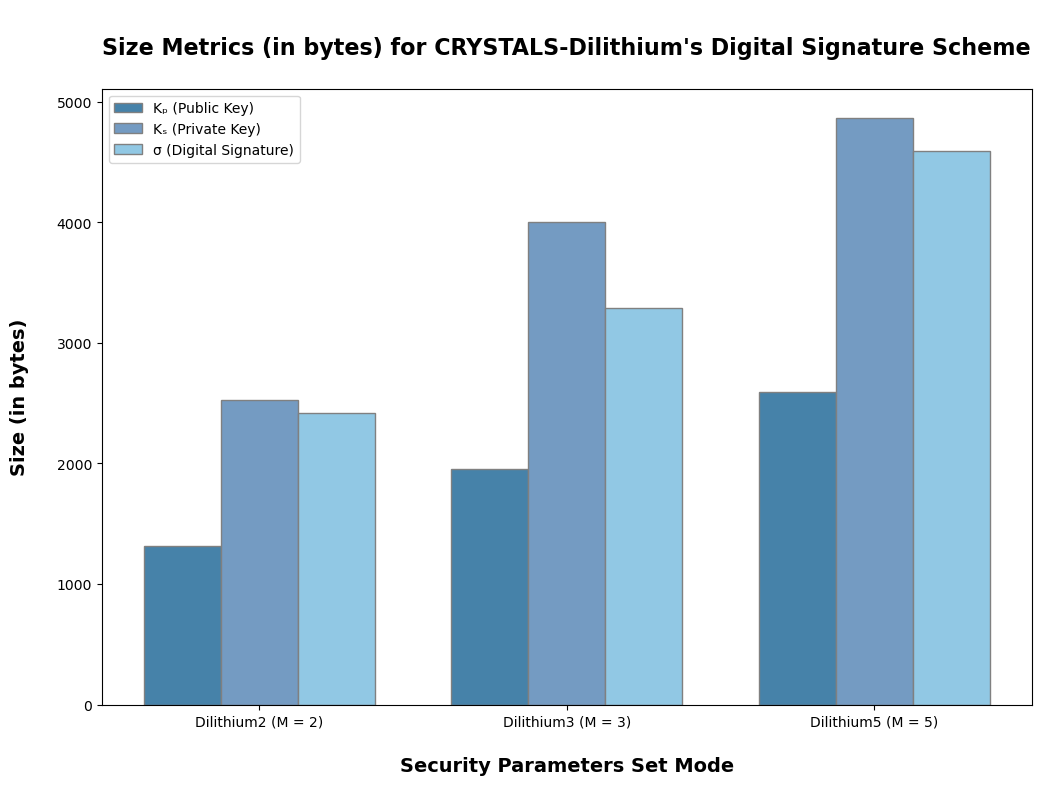

In [5]:
# Import of the NumPy (Numerical Python) library.
import numpy as num_py

# Import of the PyPlot (Python Plotting) module
# from the MatPlotLib library.
import matplotlib.pyplot as py_plot

# Import of the Warnings built-in Python library.
import warnings


# Call of instruction to ignore all warnings launched
# during the execution of this Jupyter Notebook cell.
warnings.filterwarnings("ignore")


# Creation of a Python's nested dictionary for all
# the size metrics of the CRYSTALS-Dilithium's
# Digital Signature Scheme.
#
# NOTE (IMPORTANT):
# - Copy/update the values, in bytes and bits, from the above
#   Jupyter Notebool cell executed with a Java Kernel;
crystals_dilithium_size_metrics = \
    {  "Dilithium2": {"num_pub_key_bytes": 1312,
                      "num_pub_key_bits": 10496,
                      "num_priv_key_bytes": 2528,
                      "num_priv_key_bits": 20224,
                      "num_dig_sign_bytes": 2420,
                      "num_dig_sign_bits": 19360},
       "Dilithium3": {"num_pub_key_bytes": 1952,
                      "num_pub_key_bits": 15616,
                      "num_priv_key_bytes": 4000,
                      "num_priv_key_bits": 32000,
                      "num_dig_sign_bytes": 3293,
                      "num_dig_sign_bits": 26344},
       "Dilithium5": {"num_pub_key_bytes": 2592,
                      "num_pub_key_bits": 20736,
                      "num_priv_key_bytes": 4864,
                      "num_priv_key_bits": 38912,
                      "num_dig_sign_bytes": 4595,
                      "num_dig_sign_bits": 36760} }


# Setting of the width of each bar in the plots.
bar_width = 0.25

# Creation of a figure made of sub-plots generated
# by the PyPlot (Python Plotting) module
# from the MatPlotLib library.
figure = py_plot.subplots( figsize = (12, 8) )

# Setting of the individual data for the size of
# the asymmetric public keys for each Security Parameter Set used by
# the CRYSTALS-Dilithium's Digital Signature Scheme, in terms of bytes.
num_pub_keys_bytes = [ crystals_dilithium_size_metrics["Dilithium2"]["num_pub_key_bytes"],
                       crystals_dilithium_size_metrics["Dilithium3"]["num_pub_key_bytes"],
                       crystals_dilithium_size_metrics["Dilithium5"]["num_pub_key_bytes"] ]

# Setting of the individual data for the size of
# the asymmetric private keys for each Security Parameter Set used by
# the CRYSTALS-Dilithium's Digital Signature Scheme, in terms of bytes.
num_priv_key_bytes = [ crystals_dilithium_size_metrics["Dilithium2"]["num_priv_key_bytes"],
                       crystals_dilithium_size_metrics["Dilithium3"]["num_priv_key_bytes"],
                       crystals_dilithium_size_metrics["Dilithium5"]["num_priv_key_bytes"] ]

# Setting of the individual data for the size of
# the digital signatures for each Security Parameter Set used by
# the CRYSTALS-Dilithium's Digital Signature Scheme, in terms of bytes.
num_dig_sign_bytes = [ crystals_dilithium_size_metrics["Dilithium2"]["num_dig_sign_bytes"],
                       crystals_dilithium_size_metrics["Dilithium3"]["num_dig_sign_bytes"],
                       crystals_dilithium_size_metrics["Dilithium5"]["num_dig_sign_bytes"] ]
 
# Setting of the positions of the several bars on the X-axis.
bar_1 = num_py.arange(3)
bar_2 = [ ( x + bar_width ) for x in bar_1 ]
bar_3 = [ ( x + bar_width ) for x in bar_2 ]
 
# Construction of the bar plots for each Security Parameter Set
# used by the CRYSTALS-Dilithium's Digital Signature Scheme, in terms of bytes.
py_plot.bar( bar_1, num_pub_keys_bytes,
             color = "#4682A9", edgecolor = "grey",
             width = bar_width, label = "Kₚ (Public Key)" )
py_plot.bar( bar_2, num_priv_key_bytes,
             color = "#749BC2", edgecolor = "grey",
             width = bar_width, label = "Kₛ (Private Key)" )
py_plot.bar( bar_3, num_dig_sign_bytes,
             color = "#91C8E4", edgecolor = "grey",
             width = bar_width, label = "σ (Digital Signature)" )

# Addition of the title of the bar plots for each Security Parameter Set
# used by the CRYSTALS-Dilithium's Digital Signature Scheme, in terms of bytes.
py_plot.title( "\nSize Metrics (in bytes) for CRYSTALS-Dilithium's Digital Signature Scheme\n",
               fontweight = "bold", fontsize = 16 )

# Addition of the labels for the X-axis and Y-axis of
# the bar plots for each Security Parameter Set used by
# the CRYSTALS-Kyber's Cryptosystem, in terms of bytes.
py_plot.xlabel( "\nSecurity Parameters Set Mode", fontweight = "bold", fontsize = 14 )
py_plot.ylabel( "Size (in bytes)\n", fontweight = "bold", fontsize = 14 )

# Adding of the X-Ticks to the bar plots for each Security Parameter Set
# used by the CRYSTALS-Dilithium's Digital Signature Scheme, in terms of bytes.
py_plot.xticks( [ param_idx + bar_width for param_idx in range(3) ],
                [ "Dilithium2 (M = 2)", "Dilithium3 (M = 3)", "Dilithium5 (M = 5)" ] )

# Addition of the legend/caption to the bar plots for each Security Parameter Set
# used by the CRYSTALS-Dilithium's Digital Signature Scheme, in terms of bytes.
py_plot.legend()

# Showing of the bar plots for each Security Parameter Set
# used by the CRYSTALS-Dilithium's Digital Signature Scheme, in terms of bytes.
py_plot.show()

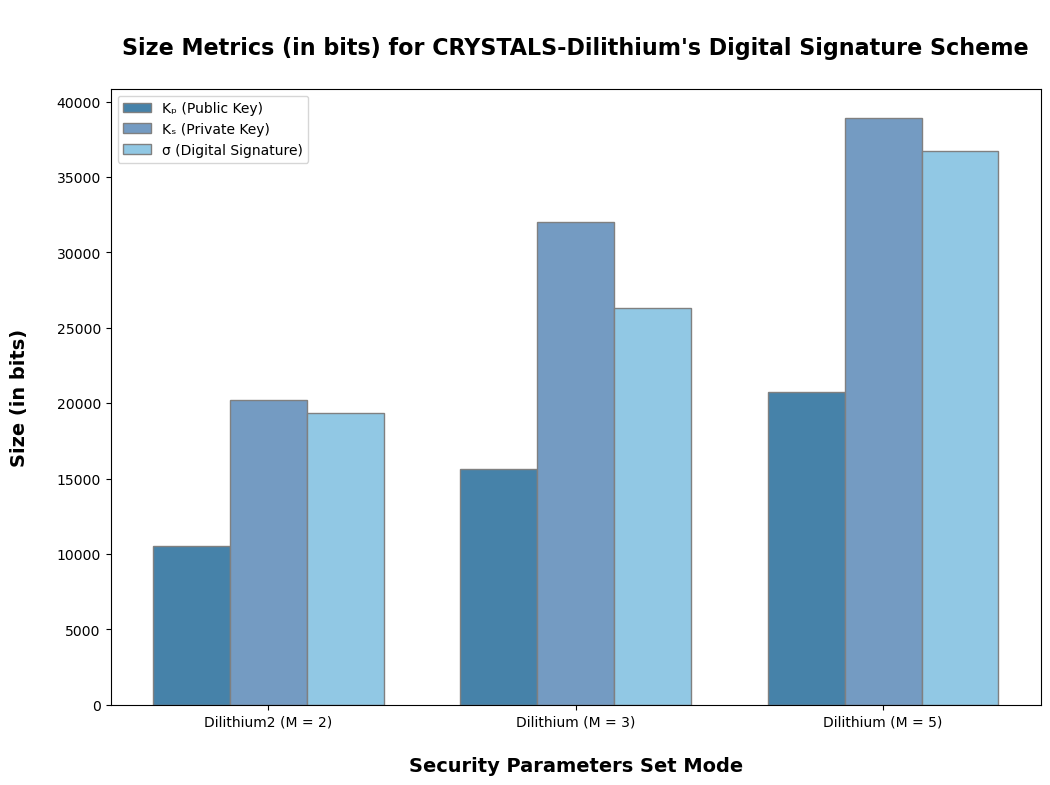

In [6]:
# Import of the NumPy (Numerical Python) library.
import numpy as num_py

# Import of the PyPlot (Python Plotting) module
# from the MatPlotLib library.
import matplotlib.pyplot as py_plot

# Import of the Warnings built-in Python library.
import warnings


# Call of instruction to ignore all warnings launched
# during the execution of this Jupyter Notebook cell.
warnings.filterwarnings("ignore")


# Creation of a Python's nested dictionary for all
# the size metrics of the CRYSTALS-Dilithium's
# Digital Signature Scheme.
#
# NOTE (IMPORTANT):
# - Copy/update the values, in bytes and bits, from the above
#   Jupyter Notebool cell executed with a Java Kernel;
crystals_dilithium_size_metrics = \
    {  "Dilithium2": {"num_pub_key_bytes": 1312,
                      "num_pub_key_bits": 10496,
                      "num_priv_key_bytes": 2528,
                      "num_priv_key_bits": 20224,
                      "num_dig_sign_bytes": 2420,
                      "num_dig_sign_bits": 19360},
       "Dilithium3": {"num_pub_key_bytes": 1952,
                      "num_pub_key_bits": 15616,
                      "num_priv_key_bytes": 4000,
                      "num_priv_key_bits": 32000,
                      "num_dig_sign_bytes": 3293,
                      "num_dig_sign_bits": 26344},
       "Dilithium5": {"num_pub_key_bytes": 2592,
                      "num_pub_key_bits": 20736,
                      "num_priv_key_bytes": 4864,
                      "num_priv_key_bits": 38912,
                      "num_dig_sign_bytes": 4595,
                      "num_dig_sign_bits": 36760} }


# Setting of the width of each bar in the plots.
bar_width = 0.25

# Creation of a figure made of sub-plots generated
# by the PyPlot (Python Plotting) module
# from the MatPlotLib library.
figure = py_plot.subplots( figsize = (12, 8) )

# Setting of the individual data for the size of
# the asymmetric public keys for each Security Parameter Set used by
# the CRYSTALS-Dilithium's Digital Signature Scheme, in terms of bits.
num_pub_keys_bits = [ crystals_dilithium_size_metrics["Dilithium2"]["num_pub_key_bits"],
                      crystals_dilithium_size_metrics["Dilithium3"]["num_pub_key_bits"],
                      crystals_dilithium_size_metrics["Dilithium5"]["num_pub_key_bits"] ]

# Setting of the individual data for the size of
# the asymmetric private keys for each Security Parameter Set used by
# the CRYSTALS-Dilithium's Digital Signature Scheme, in terms of bits.
num_priv_key_bits = [ crystals_dilithium_size_metrics["Dilithium2"]["num_priv_key_bits"],
                      crystals_dilithium_size_metrics["Dilithium3"]["num_priv_key_bits"],
                      crystals_dilithium_size_metrics["Dilithium5"]["num_priv_key_bits"] ]

# Setting of the individual data for the size of
# the digital signatures for each Security Parameter Set used by
# the CRYSTALS-Dilithium's Digital Signature Scheme, in terms of bits.
num_dig_sign_bits = [ crystals_dilithium_size_metrics["Dilithium2"]["num_dig_sign_bits"],
                      crystals_dilithium_size_metrics["Dilithium3"]["num_dig_sign_bits"],
                      crystals_dilithium_size_metrics["Dilithium5"]["num_dig_sign_bits"] ]
 
# Setting of the positions of the several bars on the X-axis.
bar_1 = num_py.arange(3)
bar_2 = [ ( x + bar_width ) for x in bar_1 ]
bar_3 = [ ( x + bar_width ) for x in bar_2 ]
 
# Construction of the bar plots for each Security Parameter Set
# used by the CRYSTALS-Dilithium's Digital Signature Scheme, in terms of bits.
py_plot.bar( bar_1, num_pub_keys_bits,
             color = "#4682A9", edgecolor = "grey",
             width = bar_width, label = "Kₚ (Public Key)" )
py_plot.bar( bar_2, num_priv_key_bits,
             color = "#749BC2", edgecolor = "grey",
             width = bar_width, label = "Kₛ (Private Key)" )
py_plot.bar( bar_3, num_dig_sign_bits,
             color = "#91C8E4", edgecolor = "grey",
             width = bar_width, label = "σ (Digital Signature)" )

# Addition of the title of the bar plots for each Security Parameter Set
# used by the CRYSTALS-Dilithium's Digital Signature Scheme, in terms of bits.
py_plot.title( "\nSize Metrics (in bits) for CRYSTALS-Dilithium's Digital Signature Scheme\n",
               fontweight = "bold", fontsize = 16 )

# Addition of the labels for the X-axis and Y-axis of
# the bar plots for each Security Parameter Set used by
# the CRYSTALS-Kyber's Cryptosystem, in terms of bits.
py_plot.xlabel( "\nSecurity Parameters Set Mode", fontweight = "bold", fontsize = 14 )
py_plot.ylabel( "Size (in bits)\n", fontweight = "bold", fontsize = 14 )

# Adding of the X-Ticks to the bar plots for each Security Parameter Set
# used by the CRYSTALS-Dilithium's Digital Signature Scheme, in terms of bits.
py_plot.xticks( [ param_idx + bar_width for param_idx in range(3) ],
                [ "Dilithium2 (M = 2)", "Dilithium (M = 3)", "Dilithium (M = 5)" ] )

# Addition of the legend/caption to the bar plots for each Security Parameter Set
# used by the CRYSTALS-Dilithium's Digital Signature Scheme, in terms of bits.
py_plot.legend()

# Showing of the bar plots for each Security Parameter Set
# used by the CRYSTALS-Dilithium's Digital Signature Scheme, in terms of bits.
py_plot.show()

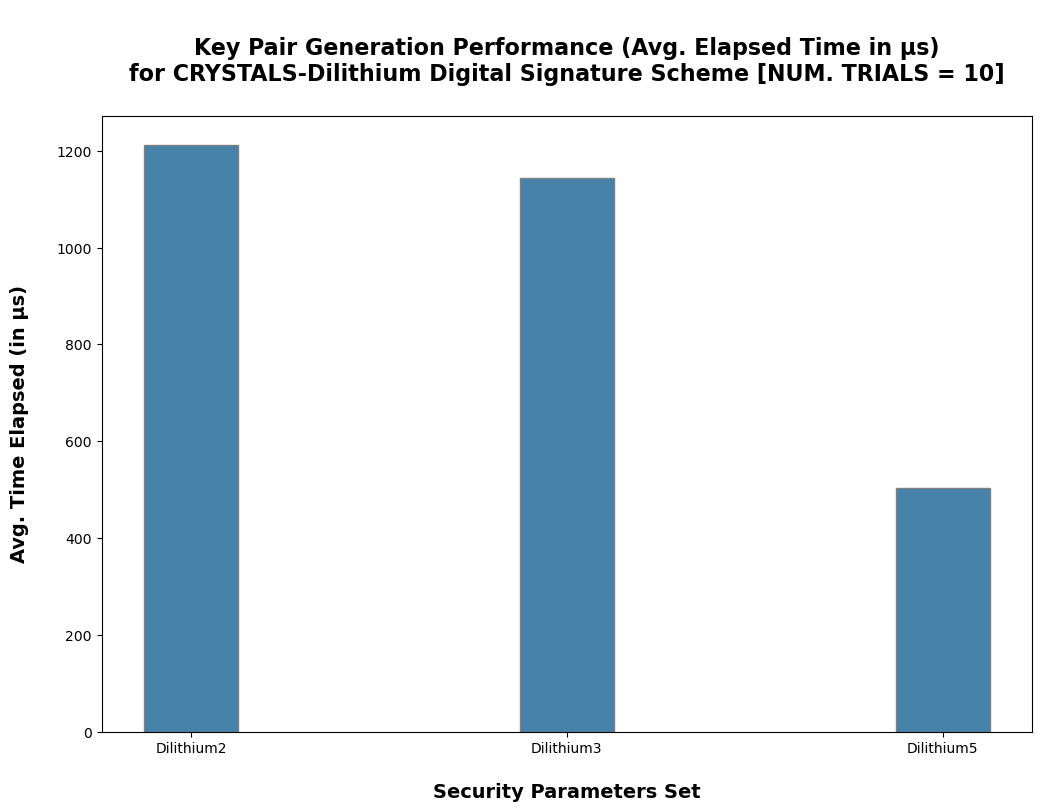

In [7]:
# Import of the NumPy (Numerical Python) library.
import numpy as num_py

# Import of the PyPlot (Python Plotting) module
# from the MatPlotLib library.
import matplotlib.pyplot as py_plot

# Import of the Warnings built-in Python library.
import warnings


# Call of instruction to ignore all warnings launched
# during the execution of this Jupyter Notebook cell.
warnings.filterwarnings("ignore")


# Definition of the number of trials
# used to estimate the average times for all
# the key pair generation performance metrics of
# the CRYSTALS-Dilithium's Digital Signature Scheme.
NUM_TRIALS = 10


# Creation of a Python's nested dictionary for all
# the key pair generation performance metrics of
# the CRYSTALS-Dilithium's Digital Signature Scheme.
#
# NOTE (IMPORTANT):
# - Copy the values, in microseconds (μs), from the above
#   Jupyter Notebool cell executed with a Java Kernel;
crystals_dilithium_key_pair_generation_performance_metrics = \
    {  "Dilithium2": 1211.917,
       "Dilithium3": 1142.841,
       "Dilithium5": 502.913 }


# Setting of the width of each bar in the plots.
bar_width = 0.25

# Creation of a figure made of sub-plots generated
# by the PyPlot (Python Plotting) module
# from the MatPlotLib library.
figure = py_plot.subplots( figsize = (12, 8) )
 
# Construction of the bar plots for
# each Security Parameter Set Mode used by
# the CRYSTALS-Dilithium's Digital Signature Scheme,
# in terms of microseconds (μs).
py_plot.bar( crystals_dilithium_key_pair_generation_performance_metrics.keys(),
             crystals_dilithium_key_pair_generation_performance_metrics.values(),
             color = "#4682A9", edgecolor = "grey",
             width = bar_width )

# Definition of the title of the bar plots
# for each Security Parameter Set Mode used by
# the CRYSTALS-Dilithium's Digital Signature Scheme,
# in terms of microseconds (μs).
plot_title = "\nKey Pair Generation Performance (Avg. Elapsed Time in μs)\n"\
             "for CRYSTALS-Dilithium Digital Signature Scheme [NUM. TRIALS = {num_trials}]\n"\
             .format(num_trials = NUM_TRIALS)

# Addition of the title of the bar plots
# for each Security Parameter Set Mode used by
# the CRYSTALS-Dilithium's Digital Signature Scheme,
# in terms of microseconds (μs).
py_plot.title( plot_title, fontweight = "bold", fontsize = 16 )

# Addition of the labels for the X-axis and Y-axis of
# the bar plots for each Security Parameter Set Mode
# used by the CRYSTALS-Dilithium's Digital Signature Scheme,
# in terms of microseconds (μs).
py_plot.xlabel( "\nSecurity Parameters Set", fontweight = "bold", fontsize = 14 )
py_plot.ylabel( "Avg. Time Elapsed (in μs)\n", fontweight = "bold", fontsize = 14 )

# Showing of the bar plots for each
# Security Parameter Set Mode used by
# the CRYSTALS-Dilithium's Digital Signature Scheme,
# in terms of microseconds (μs).
py_plot.show()

***

### Demonstration for the EUF-CMA Signing/Verifying<br>using the CRYSTALS-Dilithium Digital Signature Scheme